# Exploratory data analysis

<a id='contents'></a>
## Contents

* [Introduction](#introduction)
* [Data](#data)
* [Setup and loading data](#setup_and)
* [Explanation of variables](#explanation)
* [Filtering and train/test split](#filtering)
* [Distribution of values for each variable](#distribution)
* [Relationships/correlations between variables](#relationshipscorrelations)
* [Heatmaps](#heatmaps)
* [Conditional distributions, with plots](#conditional)
* [Animated plots](#animated_plots)
* [Repeat with four-level severity](#repeat_with)

<a id='introduction'></a>
## Introduction
↑↑ [Contents](#contents) ↓ [Data](#data)

We analyse data on traffic accidents based on police reports filed in Quebec (particularly Montreal) between 2011 and 2022. We have a view towards fitting the available data to a model that will enable one to accurately predict the severity level of an accident, based on the features available in the data. Such would be of interest to municipal authorities/town planners (Vision Zero campaigns, emergency service logistics, etc.). 

<a id='data'></a>
## Data
↑↑ [Contents](#contents) ↑ [Introduction](#introduction) ↓ [Setup and loading data](#setup_and)

SOCIÉTÉ DE L'ASSURANCE AUTOMOBILE DU QUÉBEC (SAAQ). Rapports d'accident, [Jeu de données], dans Données Québec, 2017, mis à jour le 18 decembre 2023. https://www.donneesquebec.ca/recherche/dataset/rapports-d-accident.

_Données issues des rapports d’accident remplis par les policiers, incluant notamment le moment, la gravité de l’accident de même que le type des véhicules impliqués._

QUEBEC AUTOMOBILE INSURANCE SOCIETY (SAAQ). Accident reports, [Dataset], in Data Quebec, 2017, updated December 18, 2023. https://www.donneesquebec.ca/recherche/dataset/rapports-d-accident, (accessed March 13, 2024).

_Data from accident reports completed by police officers, including the time, severity of the accident as well as the type of vehicles involved._

<a id='setup_and'></a>
## Setup and loading data
↑↑ [Contents](#contents) ↑ [Data](#data) ↓ [Explanation of variables](#explanation)

In [1]:
from pathlib import Path
import os
import sys

# Determine the project root directory and add it to the Python path
notebook_path = Path(os.getcwd()).resolve()  # Path to the current working directory
project_root = notebook_path.parent          # Parent directory of notebooks, which is the project root

# Add the project root directory to the Python path
sys.path.append(str(project_root))

# The setup module is project_root/scripts/prjct_setup.py
from scripts.setup import *


PROJECT DIRECTORY STRUCTURE

├─ data/
├─ expository/
├─ literature/
├─ notebooks/
├─ scripts/
├─ models/
├─ presentation/
├─ streamlit/


PATHS TO FIRST-LEVEL SUBDIRECTORIES CONVENIENTLY STORED IN 'PATH' DICTIONARY

path['data'] = F:\projects\road-safety\data
path['expository'] = F:\projects\road-safety\expository
path['literature'] = F:\projects\road-safety\literature
path['notebooks'] = F:\projects\road-safety\notebooks
path['scripts'] = F:\projects\road-safety\scripts
path['models'] = F:\projects\road-safety\models
path['presentation'] = F:\projects\road-safety\presentation
path['streamlit'] = F:\projects\road-safety\streamlit


We downloaded csv files containing the data, fixed some formatting, translated column names and values into English, and saved the resulting csv files with filename format ```saaq_yyyy.csv``` and ```saaq_yyyy_fr.csv```, for ```yyyy``` ranging from ````2011```` to ````2022```` inclusive.

The ```primary``` class of our custom ```processing``` module loads combines the data from the ```.csv``` files into a dataframe and performs minimal formatting. We create an instance of this class, called ```saaq```.

In [2]:
# Load csv files into one big dataframe
from processing import primary

data_dir: Path = path["data"]                 # Path to directory containing csv files
years: list = list(range(1999,2024))          # We want all data for years in this list, which does not have to be a subset of the years for which we actually hve data.
filename_format: str = "saaq_yyyy.csv"        # Or: "saaq_yyyy_fr.csv" (French version); "ncdb_yyyy.csv" (Canada-wide dataset---under development).
Print: bool = False                           # If True, print value-count summary of dataframe.

saaq = primary(data_dir=data_dir,
               years=years,
               filename_format=filename_format,
               Print=Print,)


FOR EACH YEAR WE

  1. Read csv into dataframe.
  2. Replace strings 'x' by x if x is a number. May take a minute.
  3. Concatenate resulting dataframe with previous years' dataframe.

2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 
SOURCE DATAFRAME: self.df


We view column names and types of the resulting dataframe (the ```df``` attribute of the instance ```saaq``` of the ```primary``` class).

In [3]:
saaq.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717407 entries, 0 to 1717406
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   YEAR         int64  
 1   ID           object 
 2   MONTH        int64  
 3   HOUR         object 
 4   WKDY_WKND    object 
 5   SEVERITY     object 
 6   NUM_VICTIMS  int64  
 7   NUM_VEH      float64
 8   REGION       object 
 9   SPD_LIM      object 
 10  ACCDN_TYPE   object 
 11  RD_COND      float64
 12  LIGHT        float64
 13  ZONE         float64
 14  PUB_PRIV_RD  float64
 15  ASPECT       object 
 16  LONG_LOC     float64
 17  RD_CONFG     float64
 18  RDWX         object 
 19  WEATHER      float64
 20  LT_TRK       object 
 21  HVY_VEH      object 
 22  MTRCYC       object 
 23  BICYC        object 
 24  PED          object 
dtypes: float64(8), int64(3), object(14)
memory usage: 327.6+ MB


<a id='explanation'></a>
## Explanation of variables
↑↑ [Contents](#contents) ↑ [Setup and loading data](#setup_and) ↓ [Filtering and train/test split](#filtering)

We created a dictionary and a function in the custom module ```saaq_data_dictionary```, allowing us to view each column name, its values, and what they mean (per [_documentation sur les variables_](https://www.donneesquebec.ca/recherche/dataset/rapports-d-accident/resource/86cd3bcb-fe10-4ca5-992e-5bb80e5c534a)). We put the desired column names in a list and pass it to the ```terms``` argument of the ```explain``` function, or we can simply call ```saaq_data_dictionary.explain()``` to cycle through all columns.

In [4]:
import saaq_data_dictionary
saaq_data_dictionary.explain(terms=["WEATHER", "ACCDN_TYPE", "SEVERITY"])

SEVERITY 

Severity of the accident: Indicates the severity of the accident based on the presence and condition of victims 

Fatal or serious : At least one victim died within 30 days following the accident or no death and at least one victim seriously injured (injuries requiring hospitalization, including those for which the person remains under observation in hospital). 

Minor : Only one or more victims lightly injured (injuries not requiring hospitalization or observation of the person, even if they require treatment by a doctor or in a hospital center). 

Material damage only : No victims, and the damage assessment is above the reporting threshold (threshold of $2,000 since March 2010). 

Material damage below the reporting threshold : No victims, and the assessment of damage is less than or equal to the reporting threshold (threshold of $2,000 since March 2010). 



We can also see the explanations in French...

In [5]:
saaq_data_dictionary.explain("FR")

CD_ASPCT_ROUTE 

Aspect de la route sur le lieu de l'accident au moment de l'impact et dans son entourage immédiat en fonction du champ de vision d'un conducteur assis au volant de son véhicule. 

Droit : Chaussée où la direction de la circulation est relativement droite. 

Courbe : Chaussée où la direction de la circulation tourne vers la gauche ou vers la droite. 

===


Enter 'c' to cancel, or anything else to proceed. c


We will now process the data by restricting the region to Montréal. We will also create a new variable called ```TNRY_SEV``` (ternary severity), which combines the two lowest-level accident severities (material damage/material damage below reporting threshold) into one. (For present purposes, we will only be interested in whether an accident involves no injury, minor injuries only, or fatal/serious injuries, and we will not be interested in discerning between the two kinds of accident in which no injuries occur.)

We will also partition the data into training/test sets: the test set will not be touched until models have been finalized. Later, we will futher partition the training set into training/validation sets.

We do this by specifying attributes of the ```processing``` class from our custom ```process``` module. This allows some flexibility with respect to filtering the data and setting up for analysis/modeling.

<a id='filtering'></a>
## Filtering and train/test split
↑↑ [Contents](#contents) ↑ [Explanation of variables](#explanation) ↓ [Distribution of values for each variable](#distribution)

In [6]:
from typing import Type, Union
import pandas as pd

source: Type[primary] = saaq                            # Source data.
restrict_to: Union[list, None] = {"REGION" :            # Remove all records *unless* column k lies in list v, for k : v in restrict_to dictionary.
                                 ["Montréal (06)",],}    
    
remove_if: Union[list, None] = None                     # Remove all records if column k lies in list v, for k : v in remove_if dictionary.    
drop_row_if_missing_value_in: Union[list, None] = None  # We drop all rows for which there is a missing value (i.e. sentinel value, if applicable) in a column from this list.   
                                                        # Should include targets in this list (no point having missing target values). 
                                                        # Also, any column in "stratify_by" below, otherwise the stratified train-test-split will throw an error (TypeError: '<' not supported between instances of 'float' and 'str') if the values are strings.
targets: list = ["TNRY_SEV"]                            # We intend to make predictions for values in each of these columns.
                                                        # Can add 'MULT_VEH', 'VICTIMS', and 'TNRY_SEV' to targets (saaq data): columns will be inserted automatically.
                                                        # Can add 'MULT_VEH', 'VICTIMS' to targets (ncdb data).
non_features: list = ["YEAR"]                           # Can add "ID" etc. here but "ID" and any target will automatically be removed from features 
features: list = [c for c in saaq.df.columns            # These are the features we will want to use to make predictions about the targets.
                    if c not in non_features]            
                  
test_size: float = 0.15                                 # We'll partition what's left of the rows into train/test sets, with this as relative test set size.
                                                        # We'll also split the 'train' set later, either through k-fold cross-validation or, if not, train will be split 90/10 with the 10% share going to validation.
seed: int = 0                                           # Wherever there is randomness (e.g. during train/test split we'll shuffle), we'll use this seed.
stratify: bool = True                                   # If True, we'll perform a stratified train/test split. Also applies to k-fold cross-validation (if applicable).
stratify_by: Union[list, None] = targets                # If stratify is True, we'll stratify train/test split so that proportions are maintained for tuples of values from columns in this list.

In [7]:
from processing import process

mtl_3sev = process(source=source,
              restrict_to=restrict_to,
              remove_if=remove_if,
              drop_row_if_missing_value_in=drop_row_if_missing_value_in,
              targets=targets,
              features=features,
              test_size=test_size,
              seed=seed,
              stratify=stratify,
              stratify_by=stratify_by)

Removing ID from self.features

Removing all records unless:
  REGION in ['Montréal (06)']

Inserting 'TNRY_SEV' column.

Removing REGION from self.features (but not from self.df) as the number of distinct non-null values in self.df['REGION'] is 1.

Removing SEVERITY from self.features (but not from self.df): can't use SEVERITY to predict TNRY_SEV.

Removing NUM_VICTIMS from self.features (but not from self.df): can't use NUM_VICTIMS to predict TNRY_SEV.

Partitioning data into training/test sets: self.df_train/self.df_test.

self.ordinal_features = ['NUM_VEH', 'LIGHT', 'SPD_LIM']

self.ordinal_targets = ['TNRY_SEV']

self.categorical_features = ['MONTH', 'RD_COND', 'RDWX', 'ACCDN_TYPE', 'WKDY_WKND', 'RD_CONFG', 'PUB_PRIV_RD', 'HOUR', 'ZONE', 'HVY_VEH', 'MTRCYC', 'LONG_LOC', 'ASPECT', 'BICYC', 'WEATHER', 'LT_TRK', 'PED']

self.categorical_targets = []


Notice a few things. First, we do not consider ```YEAR``` as a feature: it is hard to imagine how the year of the accident would be useful as a predictor of severity. Are accidents more severe when the year is even? Unlikely. Perhaps the World Cup affects accidents, but we don't think so.

We will note, however, that the frequency of accidents, particularly more severe ones, does appear to be trending downwards over time, no doubt thanks to safer automobiles, efforts such as Vision Zero, and so on. 

Second, as we will see, ```NUM_VICTIMS``` is directly related to ```SEVERITY``` and ```TNRY_SEV```. A victim is by definition a person who is injured in an accident: if the number of victims is at least one, then the severity level is at least minor, and conversely, if the severity level is material damage only, then the number of victims is zero. We wish to predict the severity of an accident, and/or the number of victims in an accident, so we cannot use such variables as features.

Third, we consider ```NUM_VEH``` (number of vehicles), ```SPD_LIM``` (speed limit), and ```LIGHT``` (light conditions) as ordinal variables. The first two are obvious, and ```LIGHT``` ranges from 'day time and sunny' to 'dawn/dusk' to 'night, illuminated path', to 'night, non-illuminated path'. Of course, ```NUM_VICTIMS``` is an ordinal variable, and we consider ```SEVERITY```/```TNRY_SEV``` as ordinal variables as well. The remaining variables are categorical.

Let's have a look at the training set, which is the ```df_train``` attribute of the instance of the ```process``` class we just created.

In [8]:
instance = mtl_3sev
df = instance.df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280879 entries, 536614 to 19868
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         280879 non-null  int64  
 1   ID           280879 non-null  object 
 2   MONTH        280879 non-null  int64  
 3   HOUR         260402 non-null  object 
 4   WKDY_WKND    280879 non-null  object 
 5   SEVERITY     280879 non-null  object 
 6   TNRY_SEV     280879 non-null  int64  
 7   NUM_VICTIMS  280879 non-null  int64  
 8   NUM_VEH      280879 non-null  float64
 9   REGION       280879 non-null  object 
 10  SPD_LIM      195081 non-null  object 
 11  ACCDN_TYPE   269315 non-null  object 
 12  RD_COND      265980 non-null  float64
 13  LIGHT        265492 non-null  float64
 14  ZONE         272276 non-null  float64
 15  PUB_PRIV_RD  272708 non-null  float64
 16  ASPECT       268925 non-null  object 
 17  LONG_LOC     258656 non-null  float64
 18  RD_CONFG     255181 non-n

<a id='distribution'></a>
## Distribution of values for each variable
↑↑ [Contents](#contents) ↑ [Filtering and train/test split](#filtering) ↓ [Relationships/correlations between variables](#relationshipscorrelations)

Let's take a look at the distribution of values in each column. The convenient ```distribution``` function from our custom ```exploration``` module does virtually all we need.

In the cell block below the next one, we'll look at the distribution of severity and number of victims. A key takeaway here is that the data is highly imbalanced: although one serious/fatal injury is one too many, the most severe level of accident is, fortunately, relatively rare. We will likely have to address this class imbalance if we are to train an accurate model.


COLUMNS WITH NULL VALUES



HOUR                 %
12:00-16:00  24.074780
16:00-20:00  22.949384
08:00-12:00  19.519081
20:00-24:00  11.463299
04:00-08:00   8.494049
NaN           7.290328
00:00-04:00   6.209079

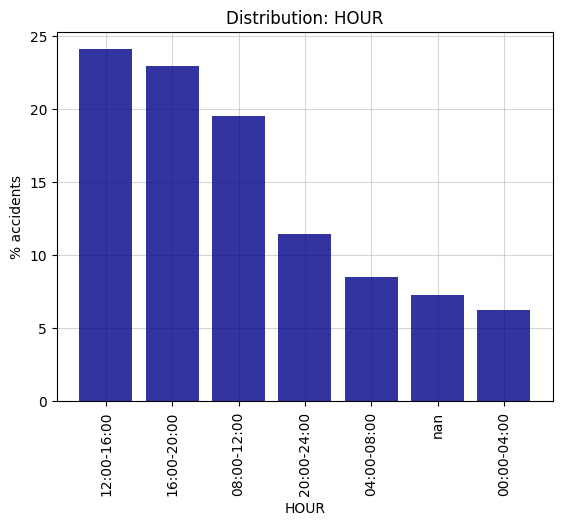

SPD_LIM          %
50       34.811075
NaN      30.546249
<50      17.751772
70       11.067043
100       4.783911
60        0.616280
80        0.329679
90        0.093991

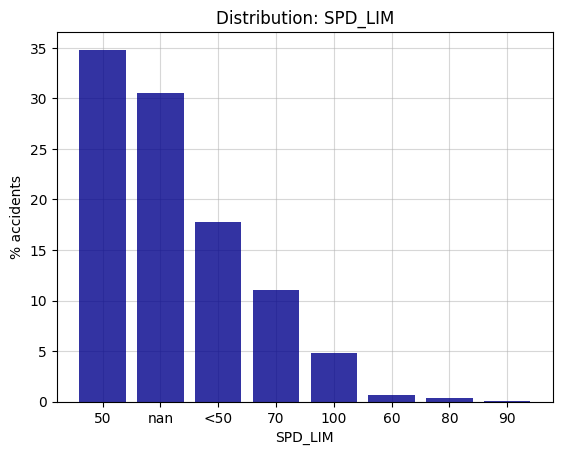

ACCDN_TYPE          %
veh         76.078667
fxd obj      9.085763
ped          4.417561
NaN          4.117075
cyc          2.838589
no coll      2.042873
oth          1.419472

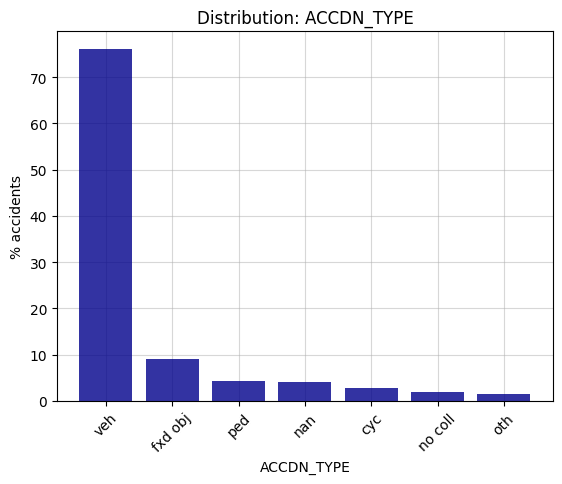

RD_COND              %
Dry          63.296651
Wet          16.702566
Snowy         8.787414
NaN           5.304419
Frozen        2.720388
Slush/sleet   1.492458
Hard snow     0.994734
Other         0.300485
Water acc     0.244589
Sand/gravel   0.113572
Muddy         0.027414
Oily          0.015309

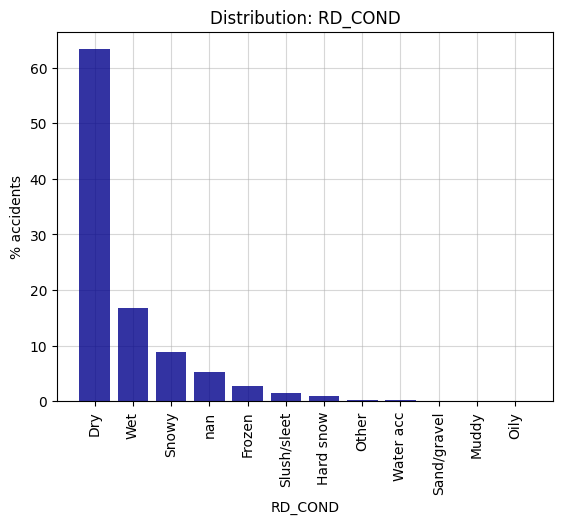

LIGHT               %
Clear day   63.404527
Lit path    25.589311
NaN          5.478160
Dawn/dusk    4.979368
Unlit path   0.548635

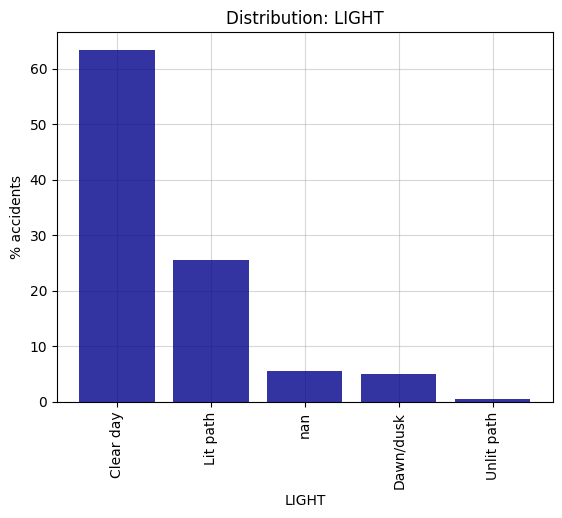

ZONE                         %
Business/commercial  50.688375
Residential          34.416243
Industrial            6.407741
NaN                   3.062885
Rural                 2.232278
School                1.688984
Other                 1.474300
Forest                0.029194

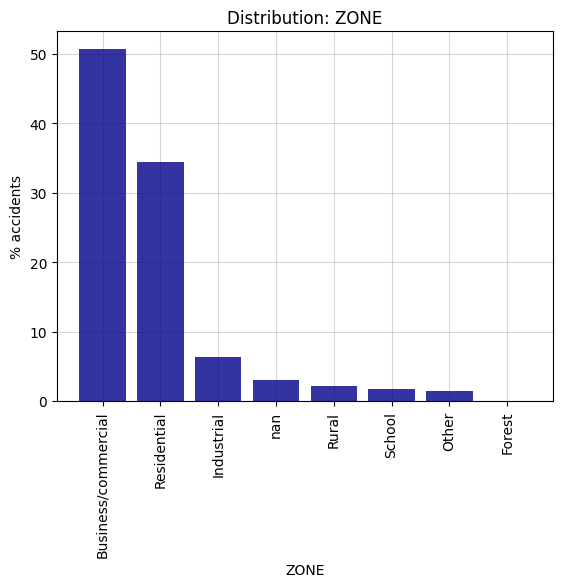

PUB_PRIV_RD          %
Public       85.297228
Private      11.793691
NaN           2.909082

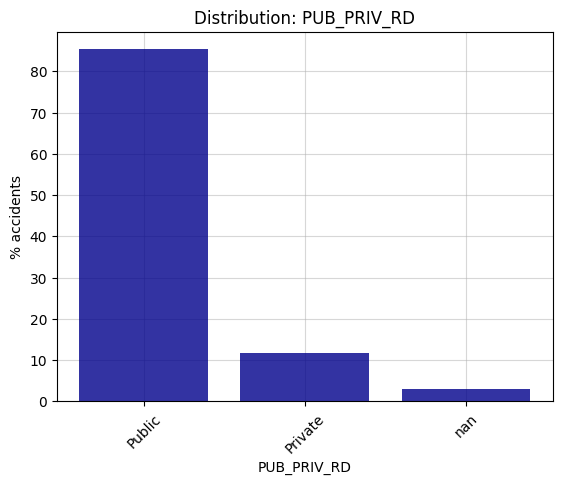

ASPECT            %
Straight  91.638392
NaN        4.255925
Curve      4.105683

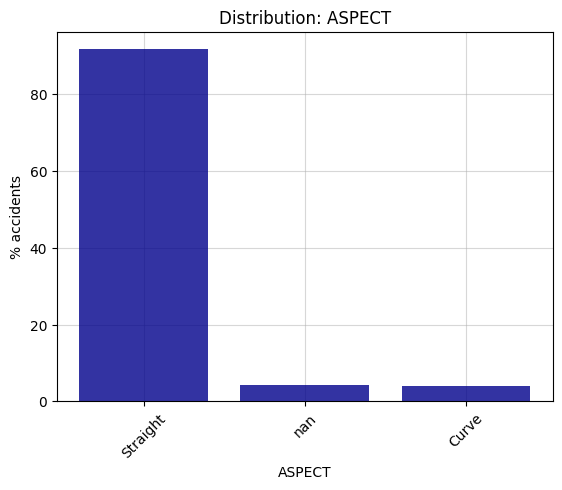

LONG_LOC                       %
Int'n/roundabout       32.102080
Btwn int'ns            24.708860
Near int'n/roundabout  18.170458
Other                   9.561057
NaN                     7.911948
Shop centre             4.714130
Bridge etc.             2.831468

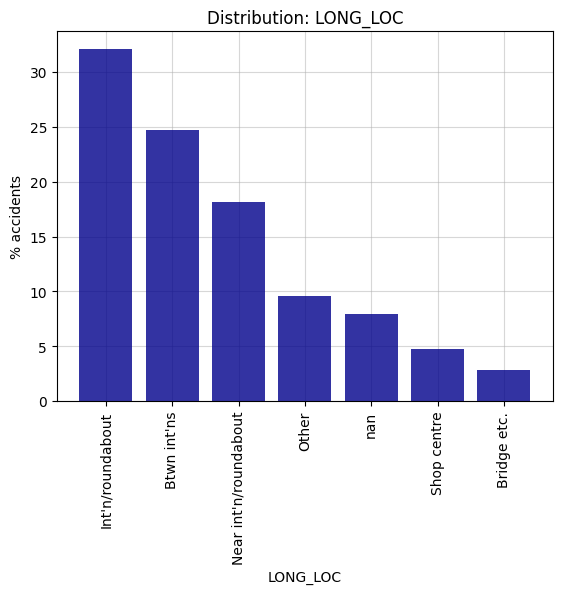

RD_CONFG               %
Two-way        43.309397
One-way        27.421416
Sep by layout  15.166317
NaN             9.149135
Other           4.953735

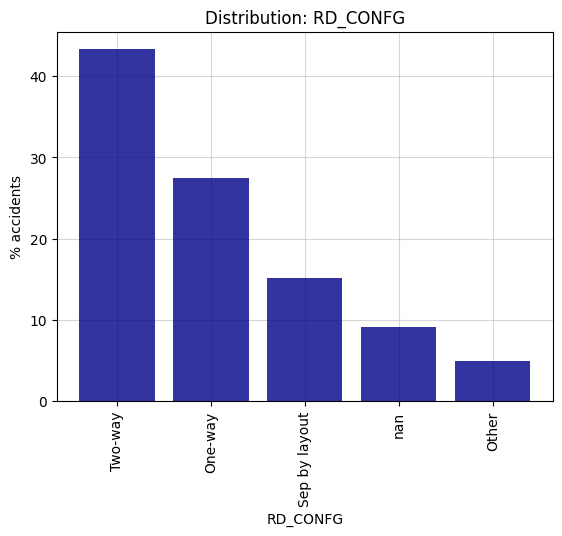

RDWX          %
NaN   96.491728
Y      3.508272

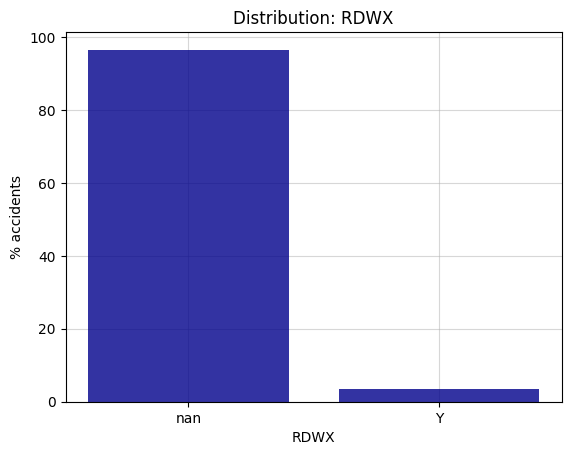

WEATHER                         %
Clear                   63.736698
Overcast                15.495284
Rain/drizzle             7.094514
NaN                      5.674686
Snow/hail                5.387729
Blowing snow/snowstorm   0.844136
Downpour                 0.608091
Other                    0.486686
Black ice                0.326475
Strong wind              0.189049
Fog/haze                 0.156651

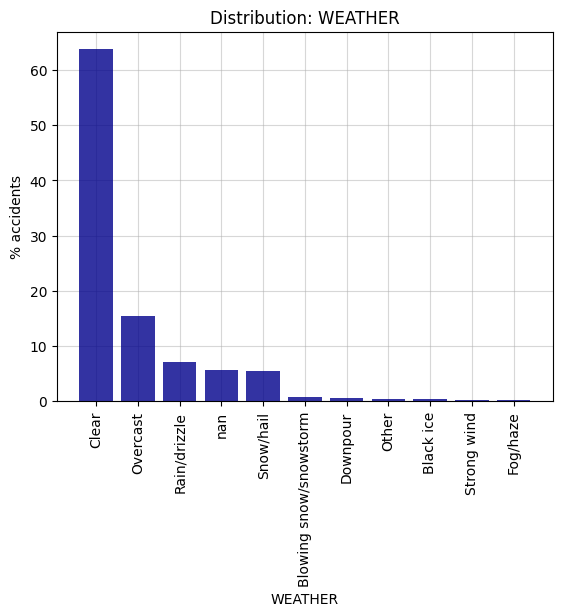


COLUMNS WITH NO NULL VALUES



YEAR          %
2011  12.209884
2012  11.140028
2013  11.073452
2017   8.344518
2018   8.207805
2016   8.164726
2015   8.121291
2014   8.029792
2019   7.543462
2022   6.252514
2021   5.659376
2020   5.253152

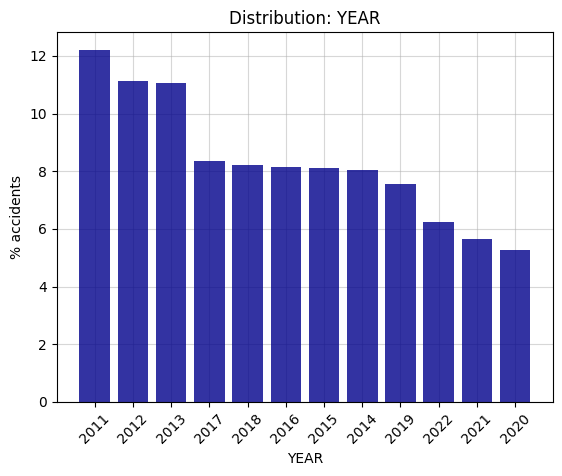

MONTH         %
Jan    9.521538
Feb    8.860755
Oct    8.694135
Dec    8.538908
Nov    8.493693
Jun    8.491557
Sep    8.475892
May    8.107050
Aug    8.100641
Jul    8.013059
Mar    7.842523
Apr    6.860249

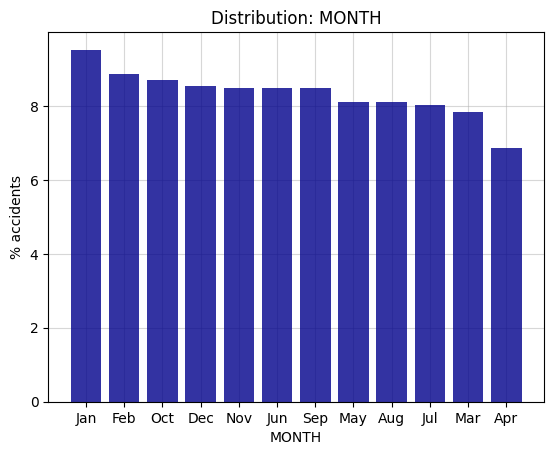

WKDY_WKND          %
WKDY       76.498065
WKND       23.501935

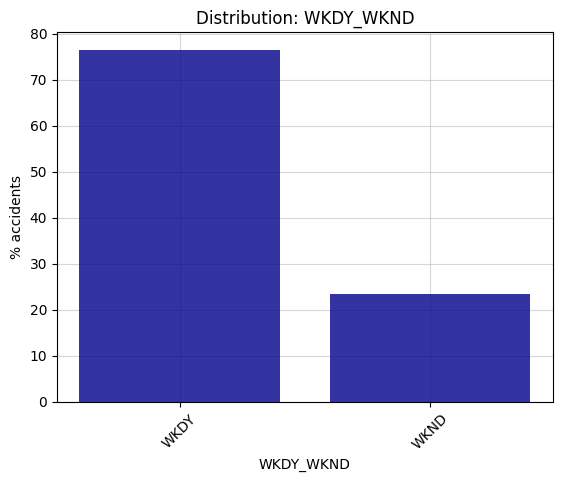

SEVERITY               %
Mat            43.529776
Mat < 2000     36.265794
Minor          19.343205
Fatal/serious   0.861225

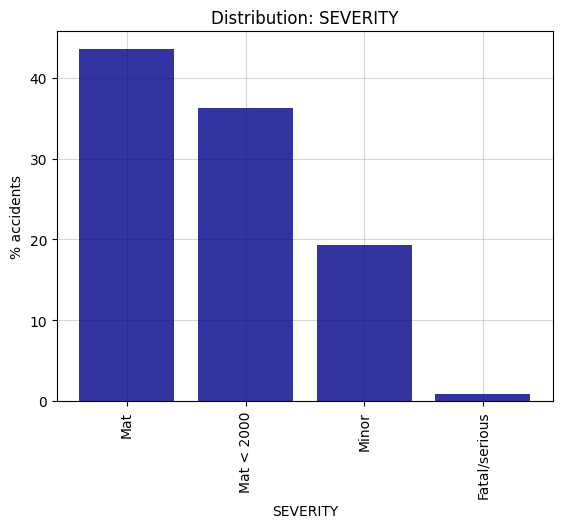

TNRY_SEV               %
Mat            79.795570
Minor          19.343205
Fatal/serious   0.861225

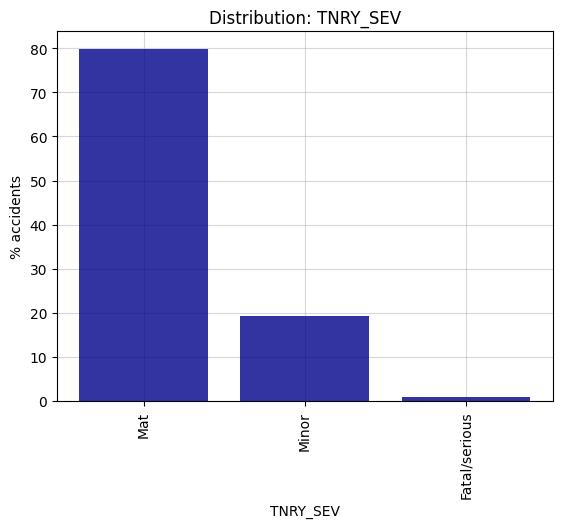

NUM_VICTIMS          %
0            79.795570
1            16.534166
2             2.761687
3+            0.908576

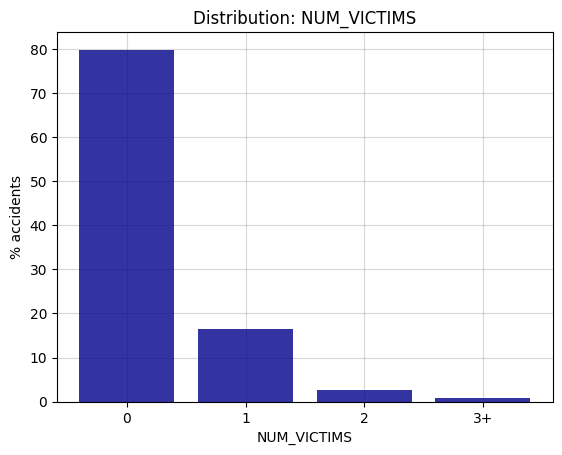

NUM_VEH          %
2        74.295693
1        16.323755
3+        9.380552

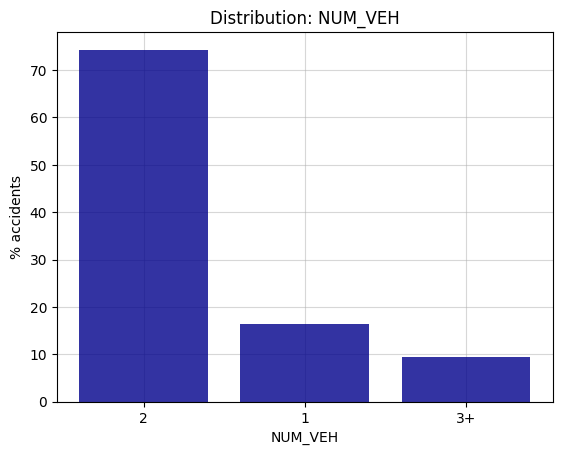

LT_TRK          %
Y       93.316695
N        6.683305

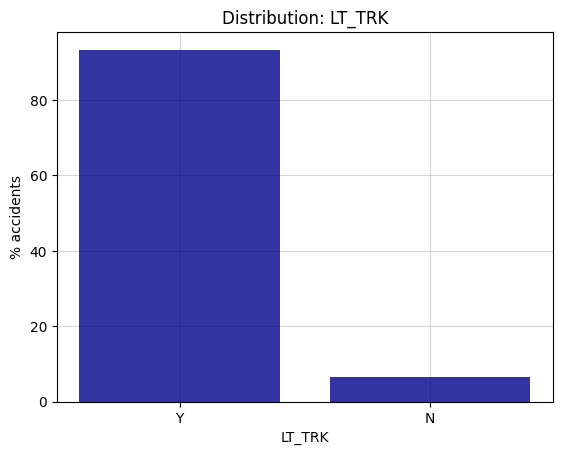

HVY_VEH          %
N        84.490475
Y        15.509525

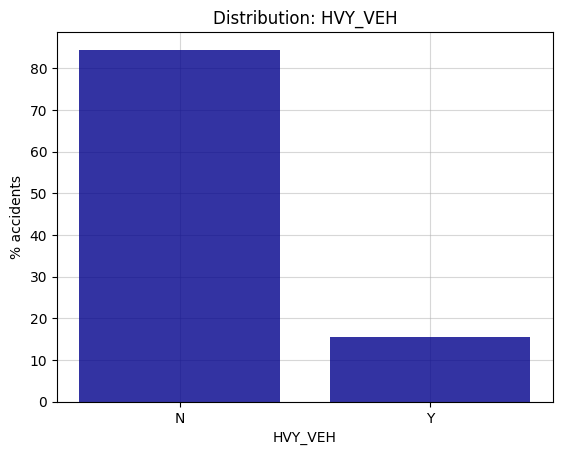

MTRCYC          %
N       98.214178
Y        1.785822

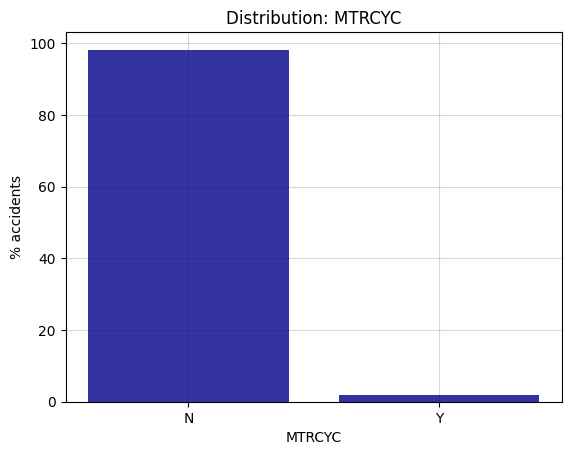

BICYC          %
N      96.896172
Y       3.103828

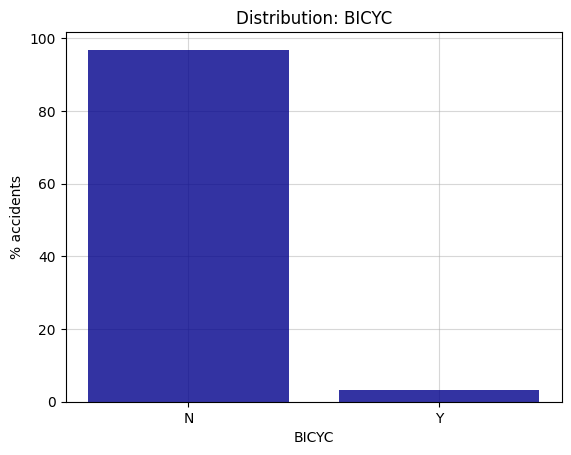

PED          %
N    96.027115
Y     3.972885

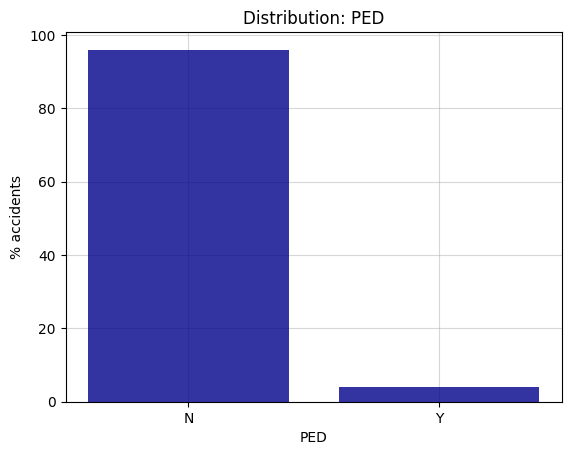

In [9]:
from exploration import distribution
from utils import get_variable_name

instance = mtl_3sev
df = instance.df_train

columns = [c for c in df if c not in ["ID"] + list(instance.restrict_to.keys())]
columns_with_nulls = df.columns[df.isnull().any()].tolist()
columns_without_nulls = [c for c in columns if c not in columns_with_nulls]

print_header("Columns with null values")

for col in columns_with_nulls:
    distribution.table(df, col);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", col]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, col, save_as=filepath)
    
print_header("Columns with no null values")

for col in columns_without_nulls:
    distribution.table(df, col);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", col]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, col, save_as=filepath)

TNRY_SEV               %
Mat            79.795570
Minor          19.343205
Fatal/serious   0.861225

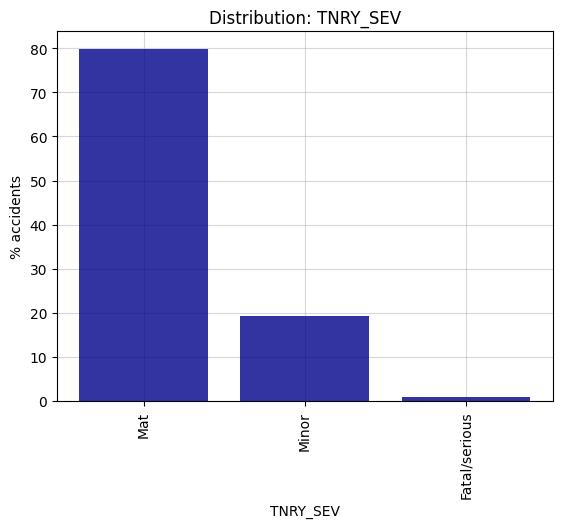

(TNRY_SEV, NUM_VICTIMS)          %
(Mat, 0)                 79.795570
(Minor, 1)               15.864483
(Minor, 2)                2.634586
(Minor, 3+)               0.844136
(Fatal/serious, 1)        0.669683
(Fatal/serious, 2)        0.127101
(Fatal/serious, 3+)       0.064441

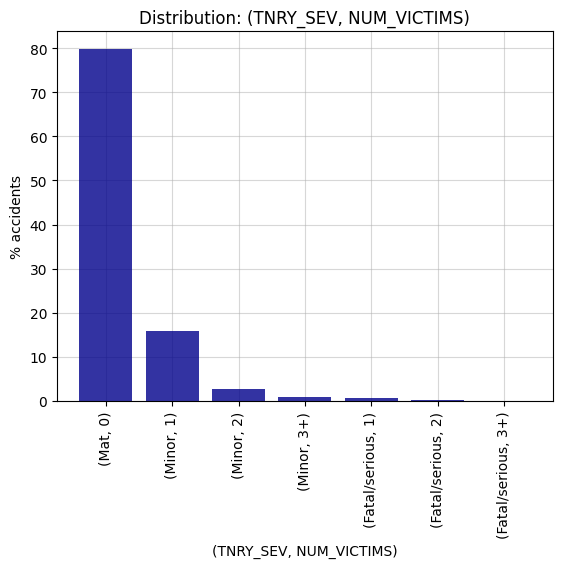

In [10]:
instance = mtl_3sev
df = instance.df_train

for target in instance.targets:
    distribution.table(df, target);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", target]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, target, save_as=filepath)

distribution.tuple_table(df, instance.targets + ["NUM_VICTIMS"]);
filename = "_".join([get_variable_name(instance), "EDA", "bar", "SEVERITY_NUM_VICTIMS"]) + ".png"
filepath = path["expository"].joinpath(filename)
distribution.tuple_plot(df, instance.targets + ["NUM_VICTIMS"], save_as=filepath)

<a id='relationshipscorrelations'></a>
## Relationships/correlations between variables
↑↑ [Contents](#contents) ↑ [Distribution of values for each variable](#distribution) ↓ [Heatmaps](#heatmaps)

As noted already in the case of ```NUM_VICTIMS``` and ```SEVERITY```/```TNRY_SEV```, certain variables may be closely (even logically) related. As another example, notice that we have the binary categorical variables ```PED``` and ```BICYC```, which indicate whether or not a pedestrian/cyclist is involved in the accident, while at the same time, ```ACCDN_TYPE``` includes ```pedestrian``` and ```cyclist``` as categories. It turns out _not_ to be the case that ```PED``` is ```Y``` implies ```ACCDN_TYPE``` is ```pedestrian```, nor vice-versa, and likewise ```BICYC = Y``` does (is) not imply (implied by) ```ACCDN_TYPE = cyclist```, but these statements are 'almost' true. (```ACCDN_TYPE``` refers to 'the nature of the accident and the **first physical event (impact)**', so, for instance, a pedestrian might be involved in an accident, but not as the first 'physical event'.)

On the other hand, notice that, if a pedestrian _is_ inolved in an accident, it can only be as a victim/injured person. Therefore, if ```PED``` is ```Y```, then ```NUM_VICTIMS``` is at least one, and ```SEVERITY```/```TNRY_SEV``` is at least ```minor```. 

Other examples of related variables include ```ZONE``` and ```SPD_LIM```: for instance, in school zones, the speed limit is less than 50 km/h. This could conceivably change depending on the time of day and month of year (after school hours and during summer vacation, etc.). Thus, there are potentially quite complex inter-relationships between subsets of variables.

As these feature variables are categorical, we cannot directly measure 'correlations' between them and the target(s), but we can do the following.

In [11]:
from variables import class_codes
from saaq_data_dictionary import shorthand

instance = mtl_3sev
df = instance.df_train

variable_pairs = zip(["TNRY_SEV",
                       "PED", 
                       "BICYC", 
                       "PED",
                       "BICYC",
                       "NUM_VEH",
                        "ZONE"],
                     ["NUM_VICTIMS",
                      "NUM_VICTIMS", 
                      "NUM_VICTIMS", 
                      "ACCDN_TYPE", 
                      "ACCDN_TYPE", 
                      "ACCDN_TYPE",
                      "SPD_LIM"])

for v1, v2 in variable_pairs:
    crosstab = pd.crosstab(df[v1], df[v2], dropna=False, margins=False)
    if v1 == "TNRY_SEV":
        order = class_codes["TNRY_SEV"].keys()
        crosstab = crosstab.loc[order]
    try:        
        crosstab.index = crosstab.index.map(shorthand[v1])
    except:
        pass
    try:
        crosstab.columns = crosstab.columns.map(shorthand[v2])
    except:
        pass
    display(crosstab)

NUM_VICTIMS         0      1     2    3+
TNRY_SEV                                
Mat            224129      0     0     0
Minor               0  44560  7400  2371
Fatal/serious       0   1881   357   181

NUM_VICTIMS       0      1     2    3+
PED                                   
N            224129  35895  7236  2460
Y                 0  10546   521    92

NUM_VICTIMS       0      1     2    3+
BICYC                                 
N            222047  39934  7642  2538
Y              2082   6507   115    14

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh    NaN
PED                                                           
N           7968    25455     5702  3970   1840  213245  11540
Y              5       65       36    17  10568     444     24

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh    NaN
BICYC                                                         
N            173    25495     5642  3968  12400  212981  11502
Y           7800       25       96    19      8     708     62

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh   NaN
NUM_VEH                                                      
1             43    23111     4528  2687  11904    2180  1397
2           7725     2164      944  1157    472  186532  9687
3+           205      245      266   143     32   24977   480

SPD_LIM                 50   60     70   80   90   100    <50    NaN
ZONE                                                                
School                1081    5    101    3    3    37   1899   1615
Residential          34127  127    214   33   47   176  31685  30259
Business/commercial  52388  703  23810  478  107  8557  13476  42854
Industrial            6593  831   4062  139   22  2070   1054   3227
Rural                  811   12   2361  249   79  2353     70    335
Forest                  27    0      1    0    0     8     19     27
Other                 1129   25    271   16    3   101    733   1863
NaN                   1621   28    265    8    3   135    925   5618

For the ordinal variables, we can look at correlations. There are no notable correlations, except for the obvious strong correlation (already noted) between number of victims and severity.

In [12]:
from variables import saaq_variable_types

instance = mtl_3sev
df = instance.df_train

ordinal_variables = [col for col in df.columns if saaq_variable_types[col] == "ordinal" and col != "SEVERITY"]

df_ordinal = df[ordinal_variables].copy()
for col in df_ordinal:
    df_ordinal[col] = df_ordinal[col].map(class_codes[col])

display(df_ordinal.corr())

TNRY_SEV  NUM_VICTIMS   NUM_VEH   SPD_LIM     LIGHT
TNRY_SEV     1.000000     0.887070 -0.100828 -0.027904  0.003126
NUM_VICTIMS  0.887070     1.000000 -0.028290 -0.007420  0.002943
NUM_VEH     -0.100828    -0.028290  1.000000  0.009109  0.078725
SPD_LIM     -0.027904    -0.007420  0.009109  1.000000 -0.006547
LIGHT        0.003126     0.002943  0.078725 -0.006547  1.000000

One might suspect a strong positive relationship between severity and whether or not an accident involves a pedestrian, cyclist, motorcyclist, etc. Let's take a look and see.

In [13]:
instance = mtl_3sev
df = instance.df_train

more_variable_pairs = [["TNRY_SEV", v] for v in ["ACCDN_TYPE",
                                                 "PED", 
                                                 "BICYC", 
                                                 "MTRCYC", 
                                                 "LT_TRK", 
                                                 "HVY_VEH",]]

for v1, v2 in more_variable_pairs:
    crosstab = pd.crosstab(df[v1], df[v2], 
                           dropna=False, margins=False, 
                           normalize="columns").mul(100).round(2)
    if v1 == "TNRY_SEV":
        order = class_codes["TNRY_SEV"].keys()
        crosstab = crosstab.loc[order]
        crosstab.index = crosstab.index.map(shorthand[v1])
    try:
        crosstab.columns = crosstab.columns.map(shorthand[v2])
    except:
        pass    
    display(crosstab)

ACCDN_TYPE       cyc  fxd obj  no coll    oth    ped    veh    NaN
TNRY_SEV                                                          
Mat            23.48    83.25    59.27  94.33  14.58  84.63  96.87
Minor          73.01    15.68    38.81   5.29  77.60  15.02   2.99
Fatal/serious   3.51     1.07     1.92   0.38   7.82   0.35   0.14

PED                N      Y
TNRY_SEV                   
Mat            83.10   0.00
Minor          16.39  90.73
Fatal/serious   0.51   9.27

BICYC              N      Y
TNRY_SEV                   
Mat            81.59  23.88
Minor          17.64  72.55
Fatal/serious   0.77   3.57

MTRCYC             N      Y
TNRY_SEV                   
Mat            80.50  40.83
Minor          18.71  54.15
Fatal/serious   0.79   5.02

LT_TRK             N      Y
TNRY_SEV                   
Mat            73.18  80.27
Minor          24.60  18.97
Fatal/serious   2.23   0.76

HVY_VEH            N      Y
TNRY_SEV                   
Mat            78.58  86.44
Minor          20.56  12.69
Fatal/serious   0.86   0.87

<a id='heatmaps'></a>
## Heatmaps
↑↑ [Contents](#contents) ↑ [Relationships/correlations between variables](#relationshipscorrelations) ↓ [Conditional distributions, with plots](#conditional)

For something visual, we can plot heatmaps...

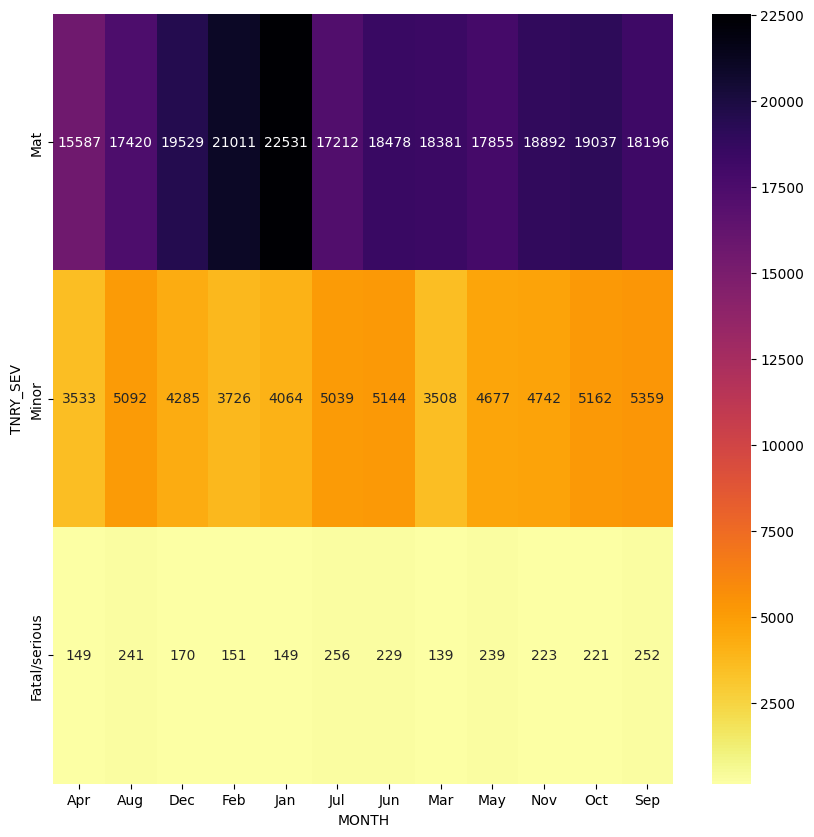

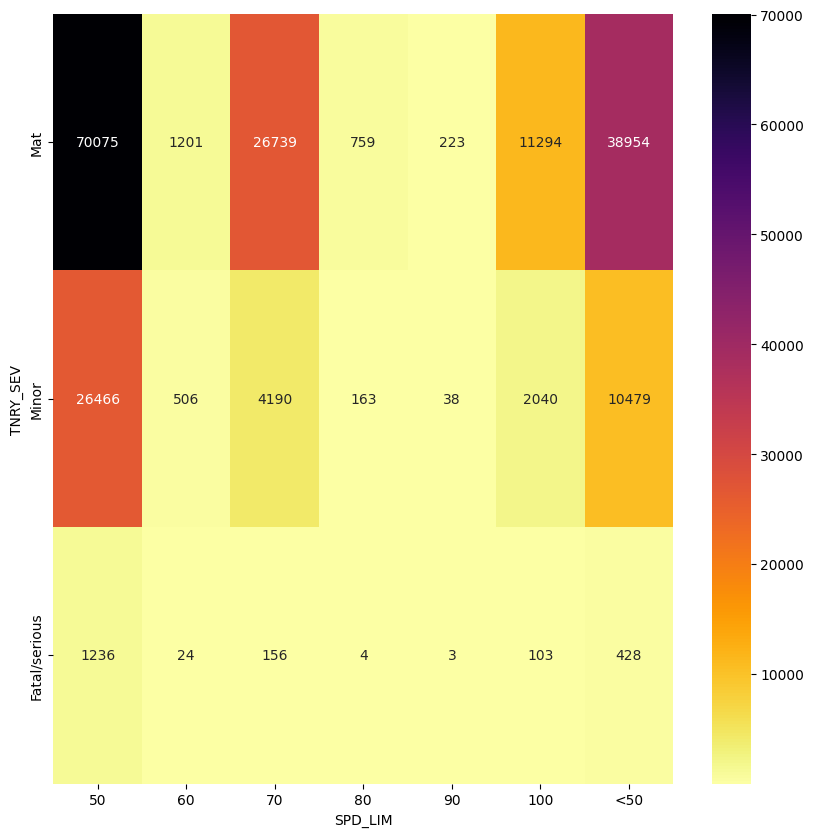

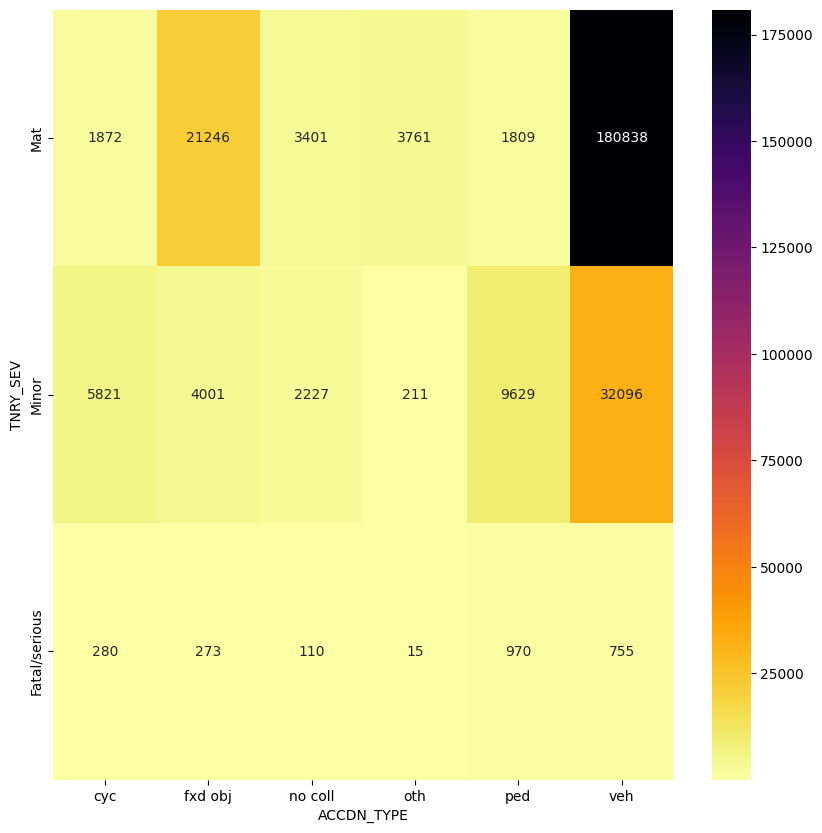

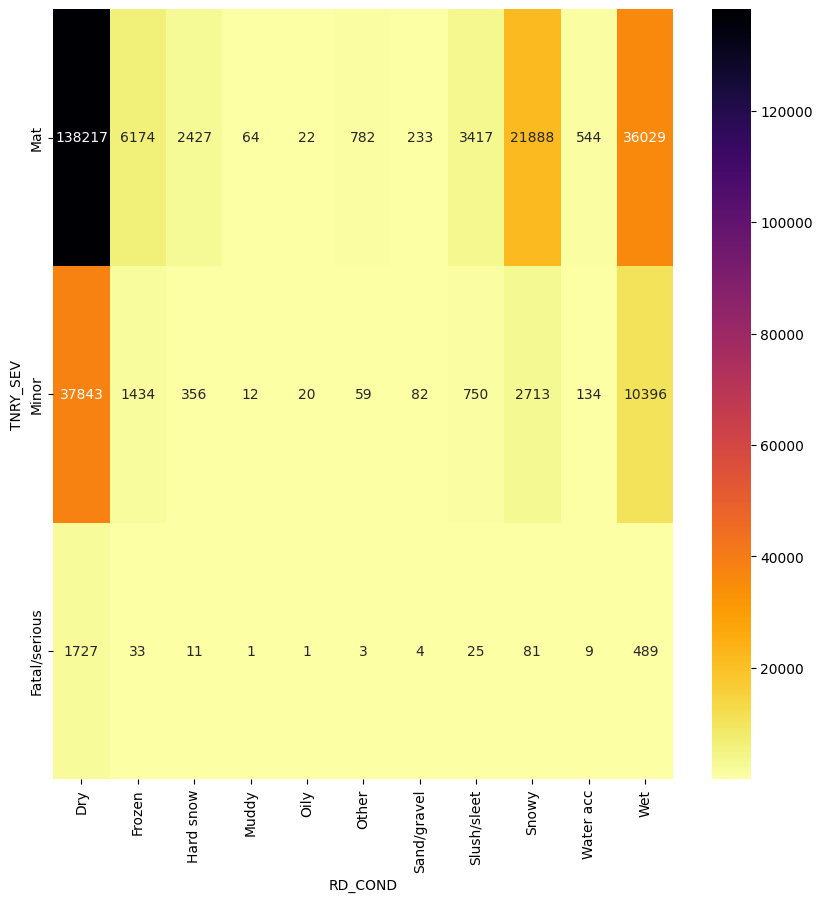

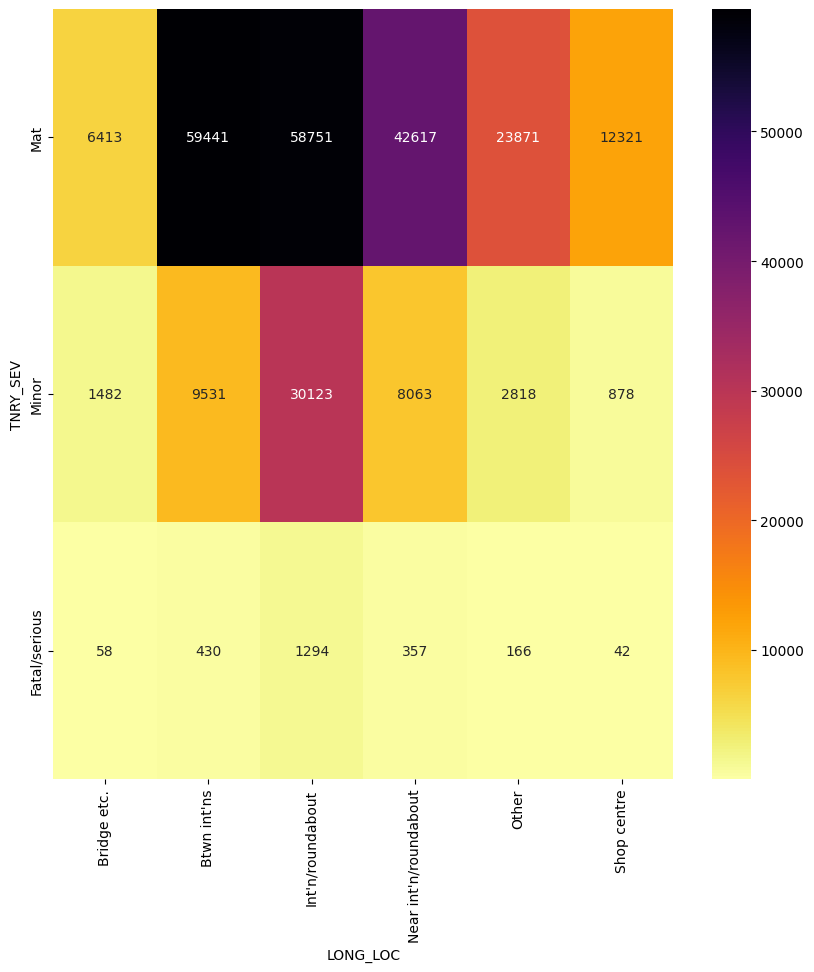

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

instance = mtl_3sev
df = instance.df_train.copy()

for col in df.columns:
    try:
        df[col] = df[col].map(shorthand[col])
    except:
        pass

columns = [c for c in df.columns if c not in instance.targets + ["SEVERITY"]]
columns.remove("ID")

# i columns[i]
# 0 'YEAR'
# 1 'MONTH'
# 2 'HOUR'
# 3 'WKDY_WKND'
# 4 'NUM_VICTIMS'
# 5 'NUM_VEH'
# 6 'REGION'
# 7 'SPD_LIM'
# 8 'ACCDN_TYPE'
# 9 'RD_COND'
# 10 'LIGHT'
# 11 'ZONE'
# 12 'PUB_PRIV_RD'
# 13 'ASPECT'
# 14 'LONG_LOC'
# 15 'RD_CONFG'
# 16 'RDWX'
# 17 'WEATHER'
# 18 'LT_TRK'
# 19 'HVY_VEH'
# 20 'MTRCYC'
# 21 'BICYC'
# 22 'PED'

for A in instance.targets:
    for idx in [1,7,8,9,14]:
        B = columns[idx]  
        AxB = pd.crosstab(df[A], df[B], dropna=True, margins=False)
        try:
            order = shorthand[A].values()
            AxB = AxB.loc[order]
        except:
            pass
        plt.figure(figsize=(10, 10))
        sns.heatmap(AxB, cmap='inferno_r', annot=True, fmt='d')
        filename = "_".join([get_variable_name(instance), "EDA", "heatmap", f"{A}", "by", f"{B}"]) + ".png"                
        filepath = path["expository"].joinpath(filename)
        plt.savefig(filepath)       

In [15]:
# Save on memory...
plt.close('all)')

<a id='conditional'></a>
## Conditional distributions, with plots
↑↑ [Contents](#contents) ↑ [Heatmaps](#heatmaps) ↓ [Animated plots](#animated_plots)

We can look at the probability distribution of the severity level of an accident _given_ a value of a patricular variable. We use our ```custom_crosstab``` and ```crosstab_plot``` (from our custom ```exploration``` module) to investigate and visualize these distributions. 

TNRY_SEV BY YEAR: Prob(TNRY_SEV | YEAR = column heading)


YEAR                      2011             2012             2013  \
Mat            28684 (↓83.64%)  26079 (↓83.35%)   26094 (↓83.9%)   
Minor           5335 (↓15.56%)   4951 (↓15.82%)   4777 (↓15.36%)   
Fatal/serious      276 (↓0.8%)     260 (↓0.83%)     232 (↓0.75%)   
All            34295 (↓100.0%)  31290 (↓100.0%)  31103 (↓100.0%)   

YEAR                      2014             2015             2016  \
Mat            17661 (↓78.31%)  17791 (↓77.99%)  17780 (↓77.53%)   
Minor           4653 (↓20.63%)    4790 (↓21.0%)   4956 (↓21.61%)   
Fatal/serious     240 (↓1.06%)     230 (↓1.01%)     197 (↓0.86%)   
All            22554 (↓100.0%)  22811 (↓100.0%)  22933 (↓100.0%)   

YEAR                      2017             2018             2019  \
Mat            18427 (↓78.62%)  18273 (↓79.26%)  16589 (↓78.29%)   
Minor           4819 (↓20.56%)    4587 (↓19.9%)    4449 (↓21.0%)   
Fatal/serious     192 (↓0.82%)     194 (↓0.84%)     150 (↓0.71%)   
All            23438 (↓100.0%)  23054 (↓100.0%)  21188 (↓100.0%)   

YEAR                      2020             2021             2022  \
Mat            11630 (↓78.82%)  11878 (↓74.72%)  13243 (↓75.41%)   
Minor           2970 (↓20.13%)   3888 (↓24.46%)   4156 (↓23.66%)   
Fatal/serious     155 (↓1.05%)     130 (↓0.82%)     163 (↓0.93%)   
All            14755 (↓100.0%)  15896 (↓100.0%)  17562 (↓100.0%)   

YEAR                        All  
Mat             224129 (↓79.8%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

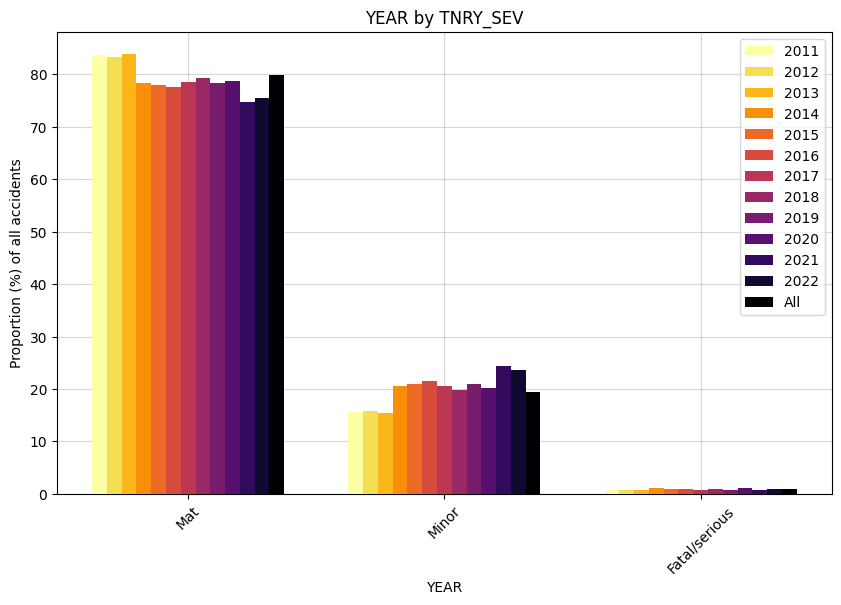

TNRY_SEV BY MONTH: Prob(TNRY_SEV | MONTH = column heading)


MONTH                      Apr              Aug              Dec  \
Mat            15587 (↓80.89%)  17420 (↓76.56%)  19529 (↓81.43%)   
Minor           3533 (↓18.34%)   5092 (↓22.38%)   4285 (↓17.87%)   
Fatal/serious     149 (↓0.77%)     241 (↓1.06%)     170 (↓0.71%)   
All            19269 (↓100.0%)  22753 (↓100.0%)  23984 (↓100.0%)   

MONTH                      Feb              Jan              Jul  \
Mat            21011 (↓84.42%)  22531 (↓84.25%)  17212 (↓76.47%)   
Minor           3726 (↓14.97%)    4064 (↓15.2%)   5039 (↓22.39%)   
Fatal/serious     151 (↓0.61%)     149 (↓0.56%)     256 (↓1.14%)   
All            24888 (↓100.0%)  26744 (↓100.0%)  22507 (↓100.0%)   

MONTH                      Jun              Mar              May  \
Mat            18478 (↓77.47%)  18381 (↓83.44%)  17855 (↓78.41%)   
Minor           5144 (↓21.57%)   3508 (↓15.93%)   4677 (↓20.54%)   
Fatal/serious     229 (↓0.96%)     139 (↓0.63%)     239 (↓1.05%)   
All            23851 (↓100.0%)  22028 (↓100.0%)  22771 (↓100.0%)   

MONTH                      Nov              Oct              Sep  \
Mat            18892 (↓79.19%)  19037 (↓77.96%)  18196 (↓76.43%)   
Minor           4742 (↓19.88%)   5162 (↓21.14%)   5359 (↓22.51%)   
Fatal/serious     223 (↓0.93%)      221 (↓0.9%)     252 (↓1.06%)   
All            23857 (↓100.0%)  24420 (↓100.0%)  23807 (↓100.0%)   

MONTH                       All  
Mat             224129 (↓79.8%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

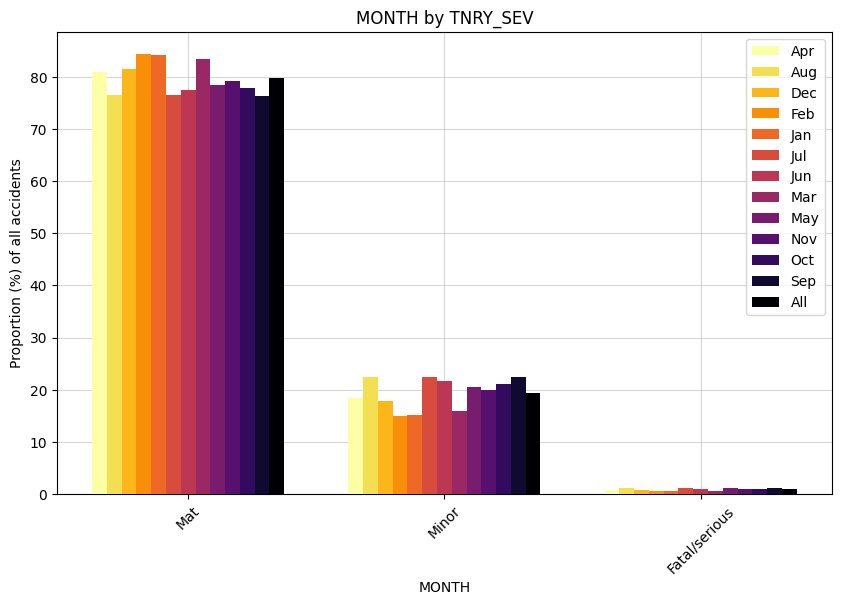

TNRY_SEV BY HOUR: Prob(TNRY_SEV | HOUR = column heading)


HOUR               00:00-04:00      04:00-08:00      08:00-12:00  \
Mat            14224 (↓81.56%)   18657 (↓78.2%)  43921 (↓80.11%)   
Minor            2913 (↓16.7%)   4937 (↓20.69%)  10538 (↓19.22%)   
Fatal/serious     303 (↓1.74%)     264 (↓1.11%)     366 (↓0.67%)   
All            17440 (↓100.0%)  23858 (↓100.0%)  54825 (↓100.0%)   

HOUR               12:00-16:00      16:00-20:00      20:00-24:00  \
Mat            53007 (↓78.39%)  49243 (↓76.39%)  25365 (↓78.78%)   
Minor          14105 (↓20.86%)   14695 (↓22.8%)   6425 (↓19.95%)   
Fatal/serious     509 (↓0.75%)     522 (↓0.81%)     408 (↓1.27%)   
All            67621 (↓100.0%)  64460 (↓100.0%)  32198 (↓100.0%)   

HOUR                        All  
Mat             204417 (↓78.5%)  
Minor           53613 (↓20.59%)  
Fatal/serious     2372 (↓0.91%)  
All            260402 (↓100.0%)

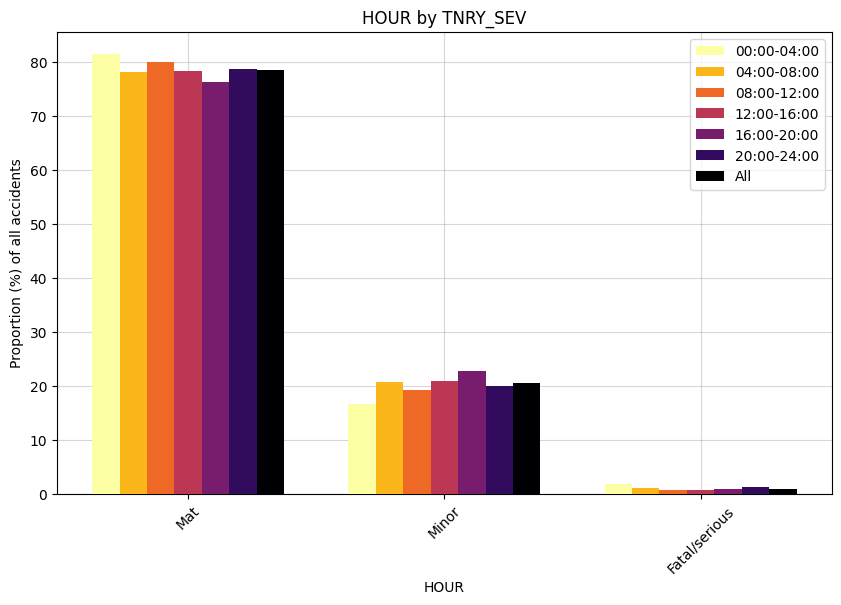

TNRY_SEV BY WKDY_WKND: Prob(TNRY_SEV | WKDY_WKND = column heading)


WKDY_WKND                  WKDY             WKND               All
Mat            171300 (↓79.72%)  52829 (↓80.03%)   224129 (↓79.8%)
Minor           41824 (↓19.47%)  12507 (↓18.95%)   54331 (↓19.34%)
Fatal/serious     1743 (↓0.81%)     676 (↓1.02%)     2419 (↓0.86%)
All            214867 (↓100.0%)  66012 (↓100.0%)  280879 (↓100.0%)

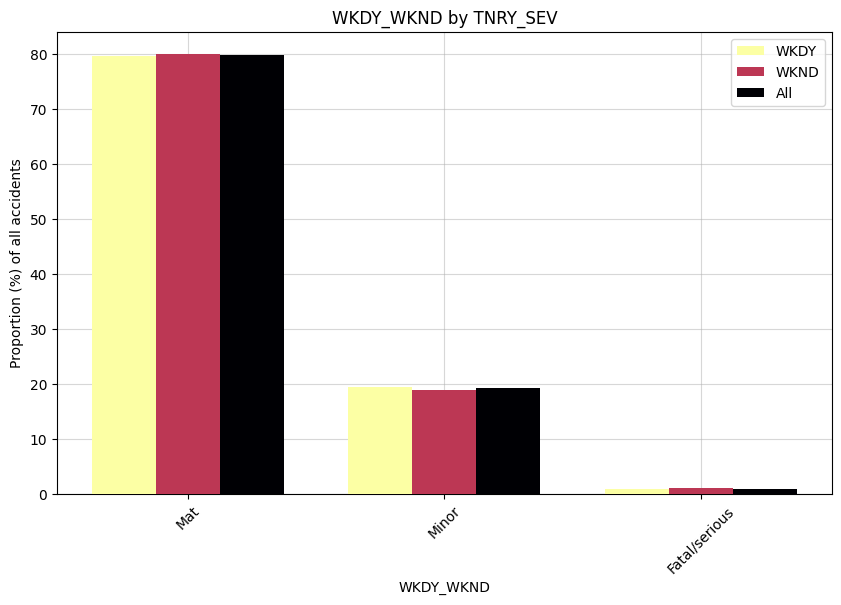

TNRY_SEV BY SEVERITY: Prob(TNRY_SEV | SEVERITY = column heading)


SEVERITY        Fatal/serious               Mat        Mat < 2000  \
Mat                 0 (↓0.0%)  122266 (↓100.0%)  101863 (↓100.0%)   
Minor               0 (↓0.0%)         0 (↓0.0%)         0 (↓0.0%)   
Fatal/serious  2419 (↓100.0%)         0 (↓0.0%)         0 (↓0.0%)   
All            2419 (↓100.0%)  122266 (↓100.0%)  101863 (↓100.0%)   

SEVERITY                 Minor               All  
Mat                  0 (↓0.0%)   224129 (↓79.8%)  
Minor          54331 (↓100.0%)   54331 (↓19.34%)  
Fatal/serious        0 (↓0.0%)     2419 (↓0.86%)  
All            54331 (↓100.0%)  280879 (↓100.0%)

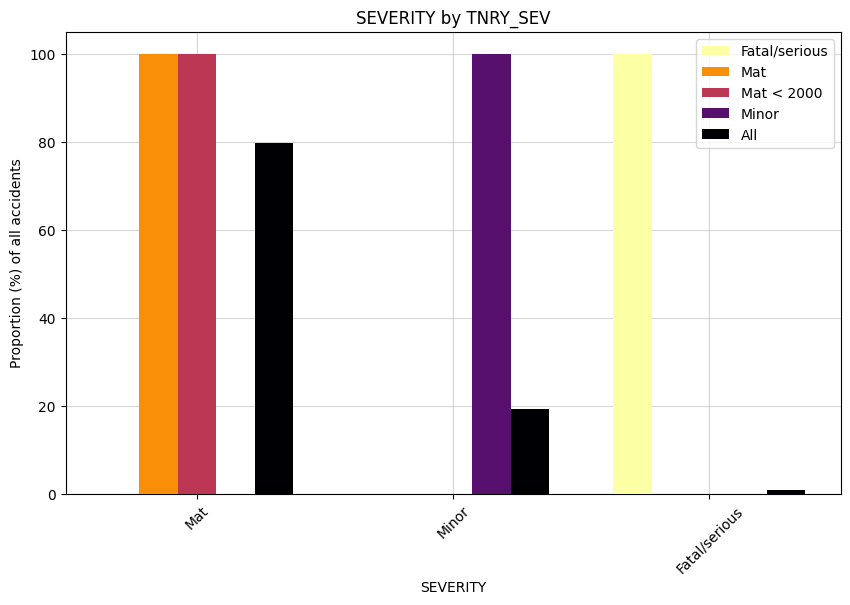

TNRY_SEV BY NUM_VICTIMS: Prob(TNRY_SEV | NUM_VICTIMS = column heading)


NUM_VICTIMS                   0                1               2  \
Mat            224129 (↓100.0%)        0 (↓0.0%)       0 (↓0.0%)   
Minor                 0 (↓0.0%)  44560 (↓95.95%)   7400 (↓95.4%)   
Fatal/serious         0 (↓0.0%)    1881 (↓4.05%)     357 (↓4.6%)   
All            224129 (↓100.0%)  46441 (↓100.0%)  7757 (↓100.0%)   

NUM_VICTIMS                3+               All  
Mat                 0 (↓0.0%)   224129 (↓79.8%)  
Minor          2371 (↓92.91%)   54331 (↓19.34%)  
Fatal/serious    181 (↓7.09%)     2419 (↓0.86%)  
All            2552 (↓100.0%)  280879 (↓100.0%)

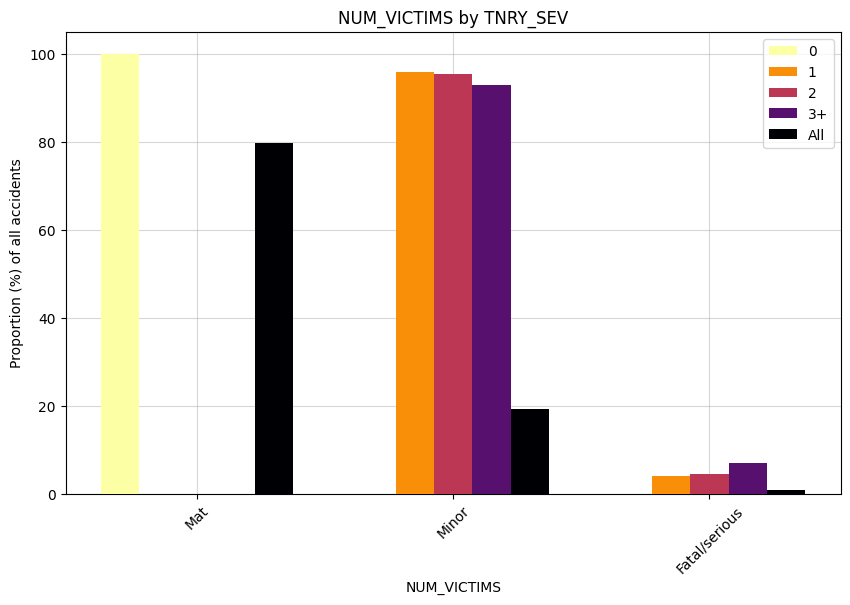

TNRY_SEV BY NUM_VEH: Prob(TNRY_SEV | NUM_VEH = column heading)


NUM_VEH                      1                 2               3+  \
Mat            29227 (↓63.74%)  176009 (↓84.34%)  18893 (↓71.71%)   
Minor          15350 (↓33.48%)   31766 (↓15.22%)   7215 (↓27.38%)   
Fatal/serious    1273 (↓2.78%)      906 (↓0.43%)     240 (↓0.91%)   
All            45850 (↓100.0%)  208681 (↓100.0%)  26348 (↓100.0%)   

NUM_VEH                     All  
Mat             224129 (↓79.8%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

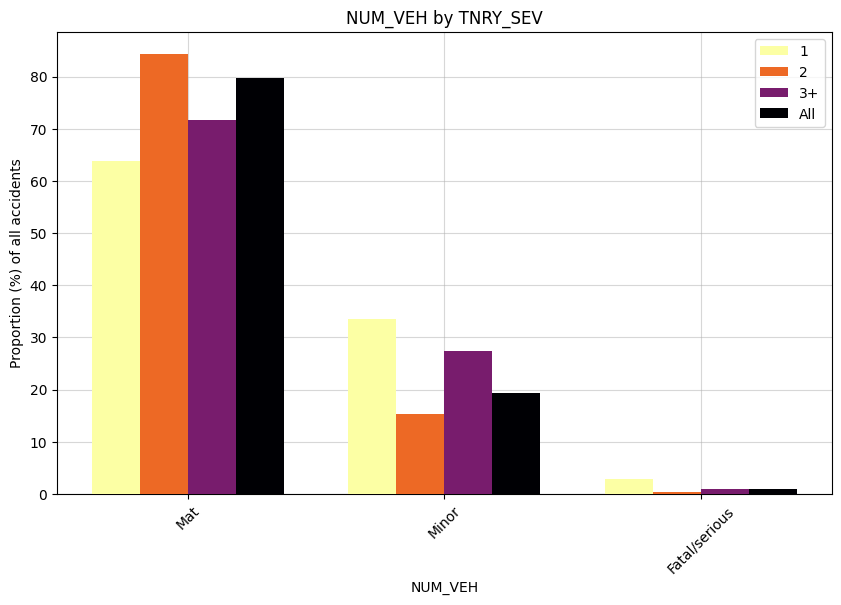

TNRY_SEV BY REGION: Prob(TNRY_SEV | REGION = column heading)


REGION                 Montréal               All
Mat             224129 (↓79.8%)   224129 (↓79.8%)
Minor           54331 (↓19.34%)   54331 (↓19.34%)
Fatal/serious     2419 (↓0.86%)     2419 (↓0.86%)
All            280879 (↓100.0%)  280879 (↓100.0%)

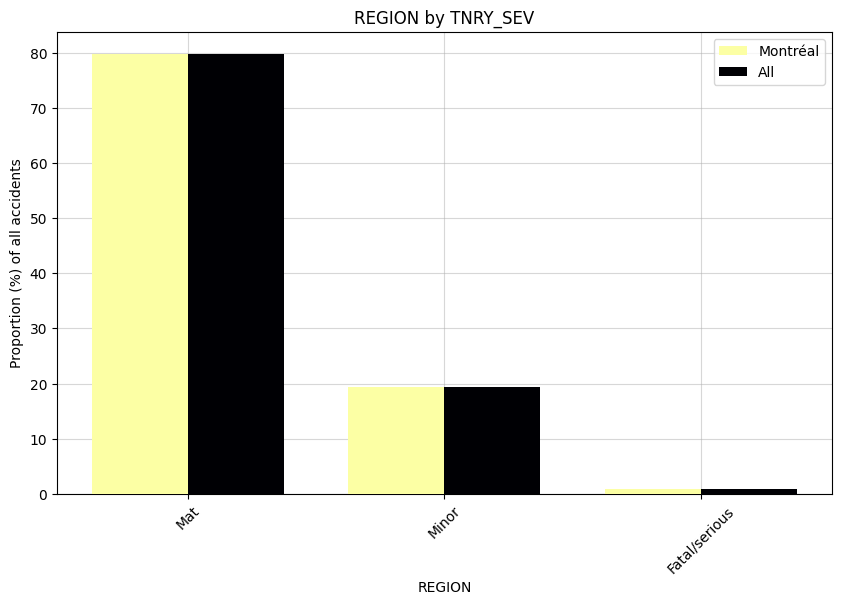

TNRY_SEV BY SPD_LIM: Prob(TNRY_SEV | SPD_LIM = column heading)


SPD_LIM                     50              60               70  \
Mat            70075 (↓71.67%)  1201 (↓69.38%)  26739 (↓86.02%)   
Minor          26466 (↓27.07%)   506 (↓29.23%)   4190 (↓13.48%)   
Fatal/serious    1236 (↓1.26%)     24 (↓1.39%)      156 (↓0.5%)   
All            97777 (↓100.0%)  1731 (↓100.0%)  31085 (↓100.0%)   

SPD_LIM                   80             90              100              <50  \
Mat            759 (↓81.97%)  223 (↓84.47%)  11294 (↓84.05%)  38954 (↓78.13%)   
Minor           163 (↓17.6%)   38 (↓14.39%)   2040 (↓15.18%)  10479 (↓21.02%)   
Fatal/serious     4 (↓0.43%)     3 (↓1.14%)     103 (↓0.77%)     428 (↓0.86%)   
All            926 (↓100.0%)  264 (↓100.0%)  13437 (↓100.0%)  49861 (↓100.0%)   

SPD_LIM                     All  
Mat             149245 (↓76.5%)  
Minor           43882 (↓22.49%)  
Fatal/serious      1954 (↓1.0%)  
All            195081 (↓100.0%)

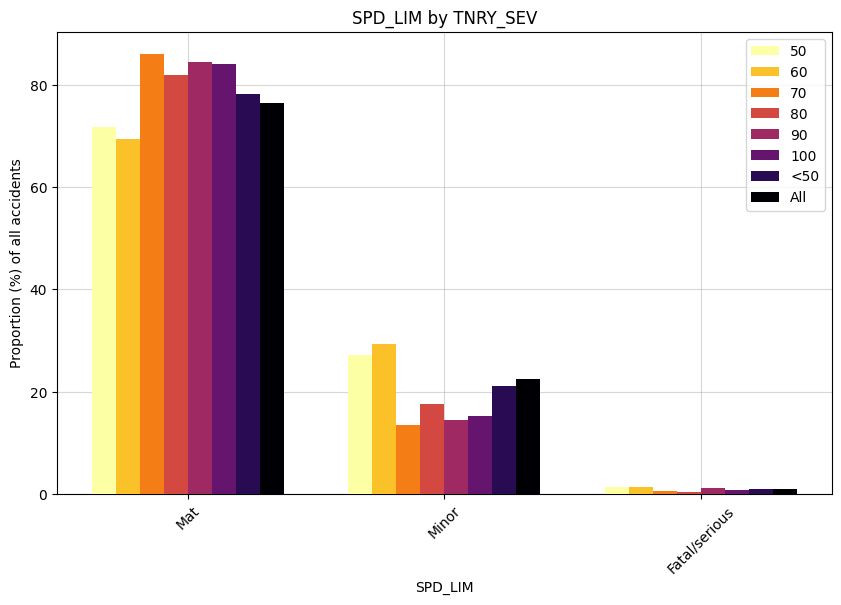

TNRY_SEV BY ACCDN_TYPE: Prob(TNRY_SEV | ACCDN_TYPE = column heading)


ACCDN_TYPE                cyc          fxd obj         no coll  \
Mat            1872 (↓23.48%)  21246 (↓83.25%)  3401 (↓59.27%)   
Minor          5821 (↓73.01%)   4001 (↓15.68%)  2227 (↓38.81%)   
Fatal/serious    280 (↓3.51%)     273 (↓1.07%)    110 (↓1.92%)   
All            7973 (↓100.0%)  25520 (↓100.0%)  5738 (↓100.0%)   

ACCDN_TYPE                oth              ped               veh  \
Mat            3761 (↓94.33%)   1809 (↓14.58%)  180838 (↓84.63%)   
Minor            211 (↓5.29%)    9629 (↓77.6%)   32096 (↓15.02%)   
Fatal/serious     15 (↓0.38%)     970 (↓7.82%)      755 (↓0.35%)   
All            3987 (↓100.0%)  12408 (↓100.0%)  213689 (↓100.0%)   

ACCDN_TYPE                  All  
Mat            212927 (↓79.06%)  
Minor           53985 (↓20.05%)  
Fatal/serious     2403 (↓0.89%)  
All            269315 (↓100.0%)

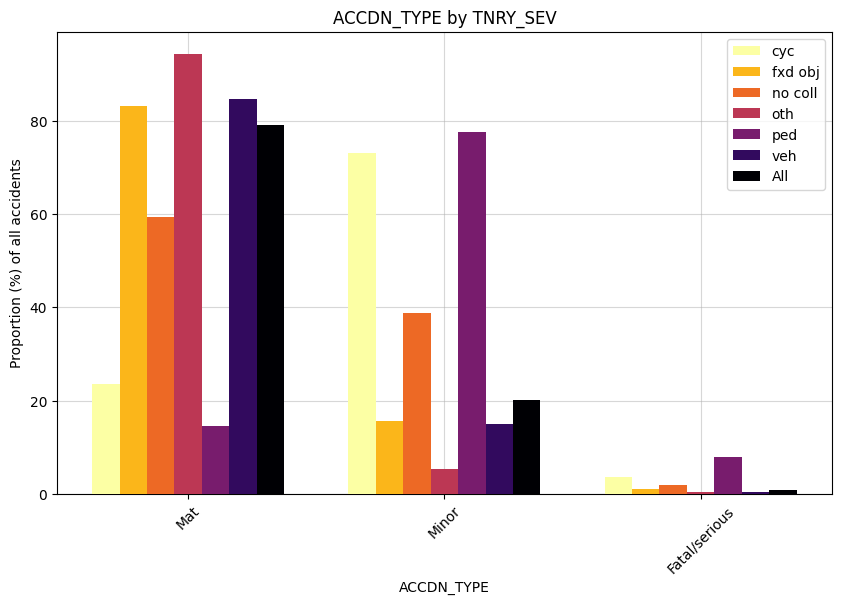

TNRY_SEV BY RD_COND: Prob(TNRY_SEV | RD_COND = column heading)


RD_COND                     Dry          Frozen       Hard snow         Muddy  \
Mat            138217 (↓77.74%)   6174 (↓80.8%)  2427 (↓86.86%)  64 (↓83.12%)   
Minor           37843 (↓21.29%)  1434 (↓18.77%)   356 (↓12.74%)  12 (↓15.58%)   
Fatal/serious     1727 (↓0.97%)     33 (↓0.43%)     11 (↓0.39%)     1 (↓1.3%)   
All            177787 (↓100.0%)  7641 (↓100.0%)  2794 (↓100.0%)  77 (↓100.0%)   

RD_COND                Oily          Other    Sand/gravel     Slush/sleet  \
Mat            22 (↓51.16%)  782 (↓92.65%)  233 (↓73.04%)  3417 (↓81.51%)   
Minor          20 (↓46.51%)    59 (↓6.99%)   82 (↓25.71%)   750 (↓17.89%)   
Fatal/serious    1 (↓2.33%)     3 (↓0.36%)     4 (↓1.25%)      25 (↓0.6%)   
All            43 (↓100.0%)  844 (↓100.0%)  319 (↓100.0%)  4192 (↓100.0%)   

RD_COND                  Snowy      Water acc              Wet  \
Mat            21888 (↓88.68%)  544 (↓79.18%)   36029 (↓76.8%)   
Minor           2713 (↓10.99%)  134 (↓19.51%)  10396 (↓22.16%)   
Fatal/serious      81 (↓0.33%)     9 (↓1.31%)     489 (↓1.04%)   
All            24682 (↓100.0%)  687 (↓100.0%)  46914 (↓100.0%)   

RD_COND                     All  
Mat            209797 (↓78.88%)  
Minor           53799 (↓20.23%)  
Fatal/serious      2384 (↓0.9%)  
All            265980 (↓100.0%)

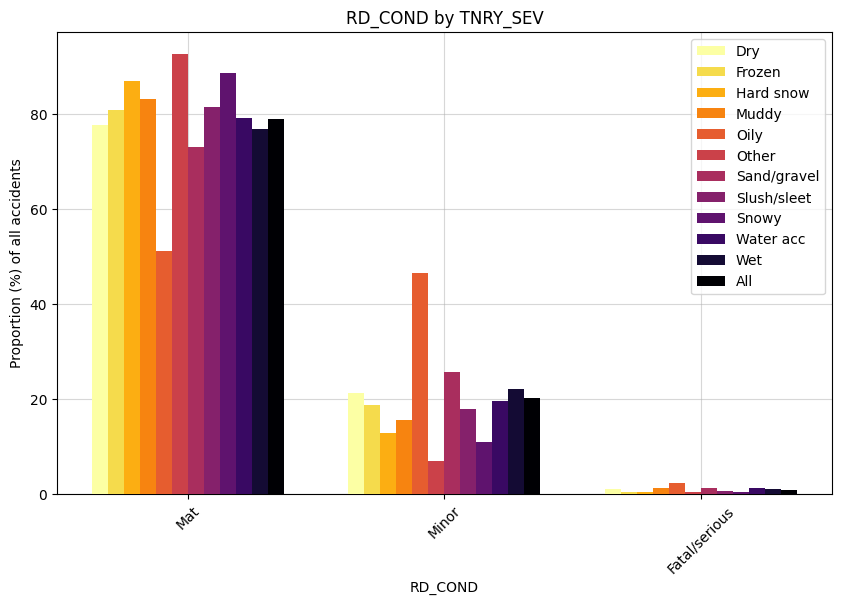

TNRY_SEV BY LIGHT: Prob(TNRY_SEV | LIGHT = column heading)


LIGHT                 Clear day        Dawn/dusk         Lit path  \
Mat            139819 (↓78.51%)  11182 (↓79.95%)  56933 (↓79.21%)   
Minor           36965 (↓20.76%)   2681 (↓19.17%)   14014 (↓19.5%)   
Fatal/serious     1306 (↓0.73%)     123 (↓0.88%)     928 (↓1.29%)   
All            178090 (↓100.0%)  13986 (↓100.0%)  71875 (↓100.0%)   

LIGHT              Unlit path               All  
Mat            1280 (↓83.06%)   209214 (↓78.8%)  
Minor           227 (↓14.73%)    53887 (↓20.3%)  
Fatal/serious     34 (↓2.21%)      2391 (↓0.9%)  
All            1541 (↓100.0%)  265492 (↓100.0%)

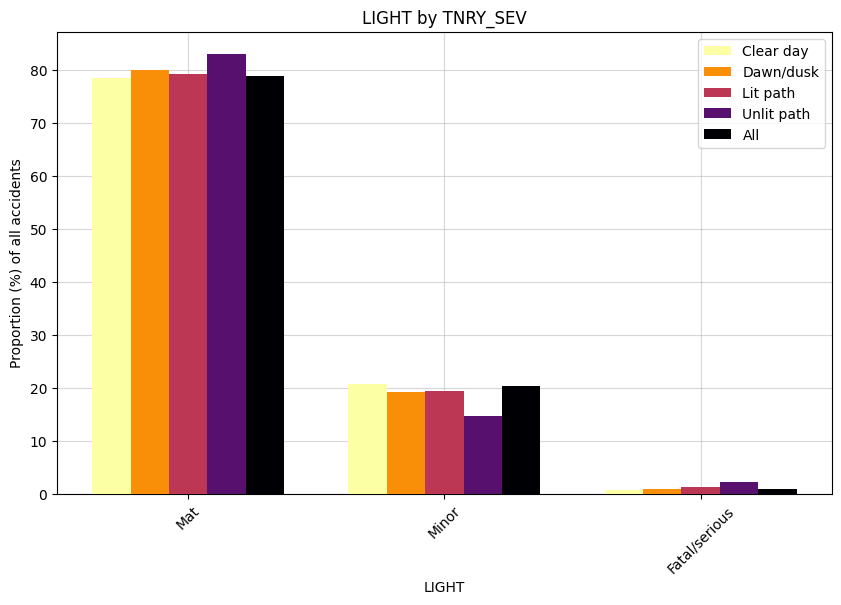

TNRY_SEV BY ZONE: Prob(TNRY_SEV | ZONE = column heading)


ZONE          Business/commercial        Forest       Industrial  \
Mat              113444 (↓79.68%)  66 (↓80.49%)  14374 (↓79.86%)   
Minor             27733 (↓19.48%)  15 (↓18.29%)   3446 (↓19.15%)   
Fatal/serious       1196 (↓0.84%)    1 (↓1.22%)     178 (↓0.99%)   
All              142373 (↓100.0%)  82 (↓100.0%)  17998 (↓100.0%)   

ZONE                    Other      Residential           Rural  \
Mat            3310 (↓79.93%)  76167 (↓78.79%)   5242 (↓83.6%)   
Minor           768 (↓18.55%)  19644 (↓20.32%)   977 (↓15.58%)   
Fatal/serious     63 (↓1.52%)     857 (↓0.89%)     51 (↓0.81%)   
All            4141 (↓100.0%)  96668 (↓100.0%)  6270 (↓100.0%)   

ZONE                   School               All  
Mat            3557 (↓74.98%)  216160 (↓79.39%)  
Minor          1144 (↓24.11%)   53727 (↓19.73%)  
Fatal/serious     43 (↓0.91%)     2389 (↓0.88%)  
All            4744 (↓100.0%)  272276 (↓100.0%)

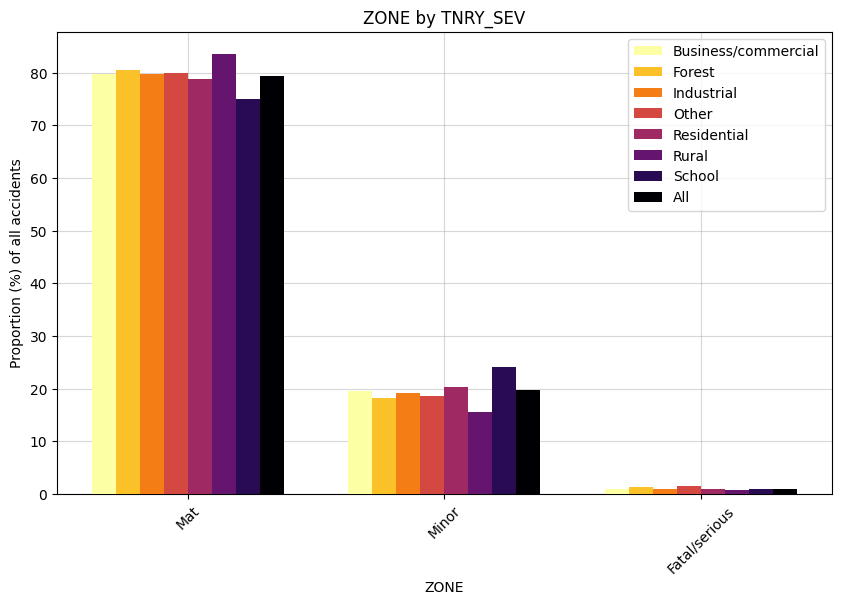

TNRY_SEV BY PUB_PRIV_RD: Prob(TNRY_SEV | PUB_PRIV_RD = column heading)


PUB_PRIV_RD            Private            Public               All
Mat            31092 (↓93.86%)  185459 (↓77.41%)  216551 (↓79.41%)
Minor            1917 (↓5.79%)   51851 (↓21.64%)   53768 (↓19.72%)
Fatal/serious     117 (↓0.35%)     2272 (↓0.95%)     2389 (↓0.88%)
All            33126 (↓100.0%)  239582 (↓100.0%)  272708 (↓100.0%)

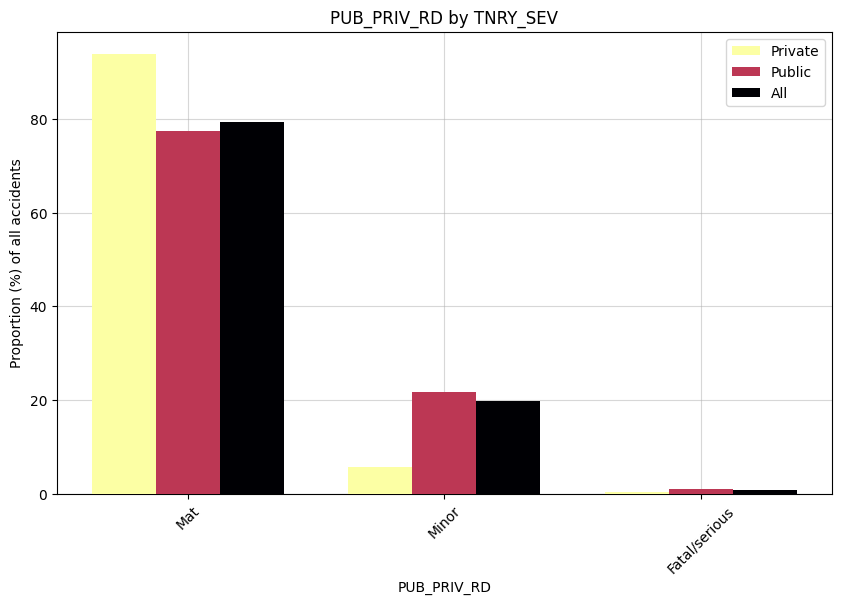

TNRY_SEV BY ASPECT: Prob(TNRY_SEV | ASPECT = column heading)


ASPECT                   Curve          Straight               All
Mat             9309 (↓80.72%)  203382 (↓79.02%)  212691 (↓79.09%)
Minor           2073 (↓17.98%)   51771 (↓20.11%)   53844 (↓20.02%)
Fatal/serious      150 (↓1.3%)     2240 (↓0.87%)     2390 (↓0.89%)
All            11532 (↓100.0%)  257393 (↓100.0%)  268925 (↓100.0%)

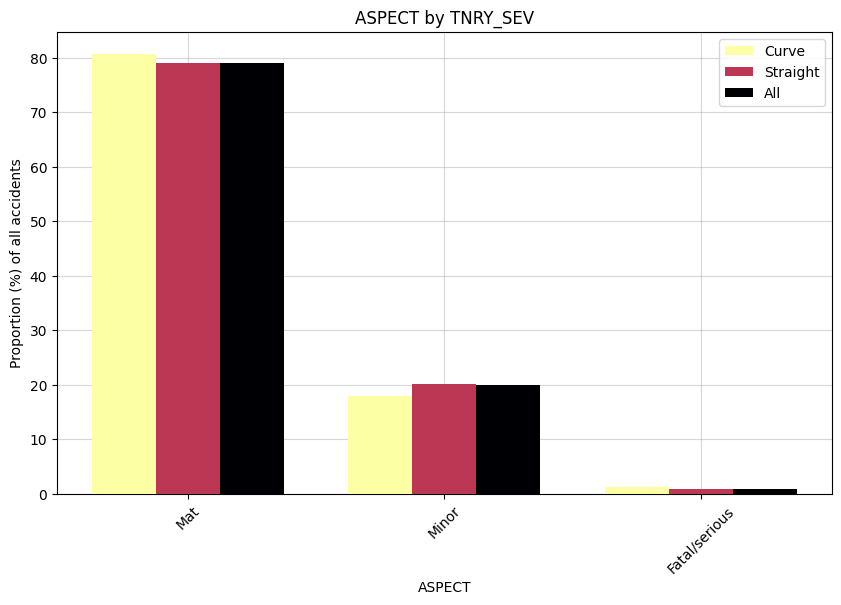

TNRY_SEV BY LONG_LOC: Prob(TNRY_SEV | LONG_LOC = column heading)


LONG_LOC          Bridge etc.      Btwn int'ns Int'n/roundabout  \
Mat            6413 (↓80.64%)  59441 (↓85.65%)  58751 (↓65.16%)   
Minor          1482 (↓18.63%)   9531 (↓13.73%)  30123 (↓33.41%)   
Fatal/serious     58 (↓0.73%)     430 (↓0.62%)    1294 (↓1.44%)   
All            7953 (↓100.0%)  69402 (↓100.0%)  90168 (↓100.0%)   

LONG_LOC      Near int'n/roundabout            Other      Shop centre  \
Mat                  42617 (↓83.5%)  23871 (↓88.89%)  12321 (↓93.05%)   
Minor                 8063 (↓15.8%)   2818 (↓10.49%)     878 (↓6.63%)   
Fatal/serious           357 (↓0.7%)     166 (↓0.62%)      42 (↓0.32%)   
All                 51037 (↓100.0%)  26855 (↓100.0%)  13241 (↓100.0%)   

LONG_LOC                    All  
Mat            203414 (↓78.64%)  
Minor           52895 (↓20.45%)  
Fatal/serious     2347 (↓0.91%)  
All            258656 (↓100.0%)

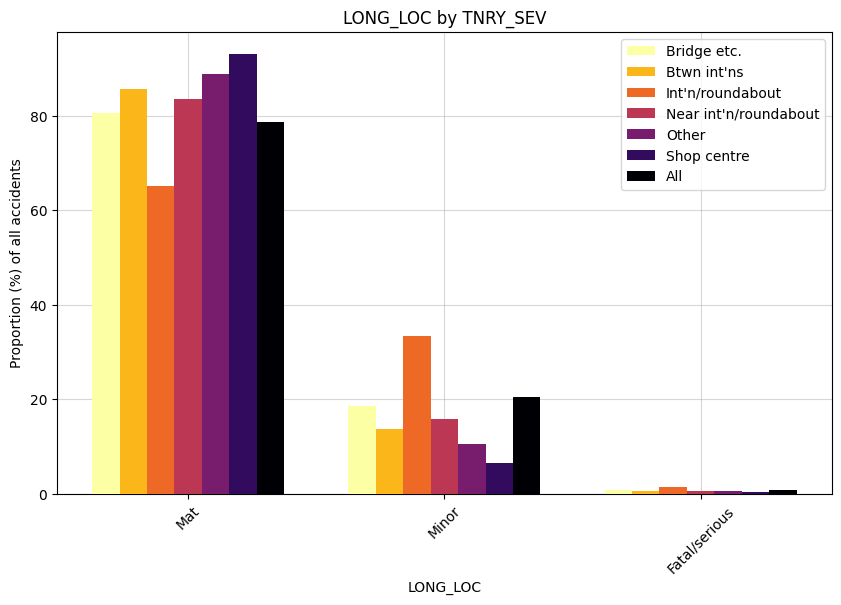

TNRY_SEV BY RD_CONFG: Prob(TNRY_SEV | RD_CONFG = column heading)


RD_CONFG               One-way            Other    Sep by layout  \
Mat            64785 (↓84.11%)  12784 (↓91.88%)  33625 (↓78.93%)   
Minor          11756 (↓15.26%)     1058 (↓7.6%)   8581 (↓20.14%)   
Fatal/serious     480 (↓0.62%)      72 (↓0.52%)     393 (↓0.92%)   
All            77021 (↓100.0%)  13914 (↓100.0%)  42599 (↓100.0%)   

RD_CONFG                Two-way               All  
Mat             88646 (↓72.87%)  199840 (↓78.31%)  
Minor           31599 (↓25.98%)   52994 (↓20.77%)  
Fatal/serious     1402 (↓1.15%)     2347 (↓0.92%)  
All            121647 (↓100.0%)  255181 (↓100.0%)

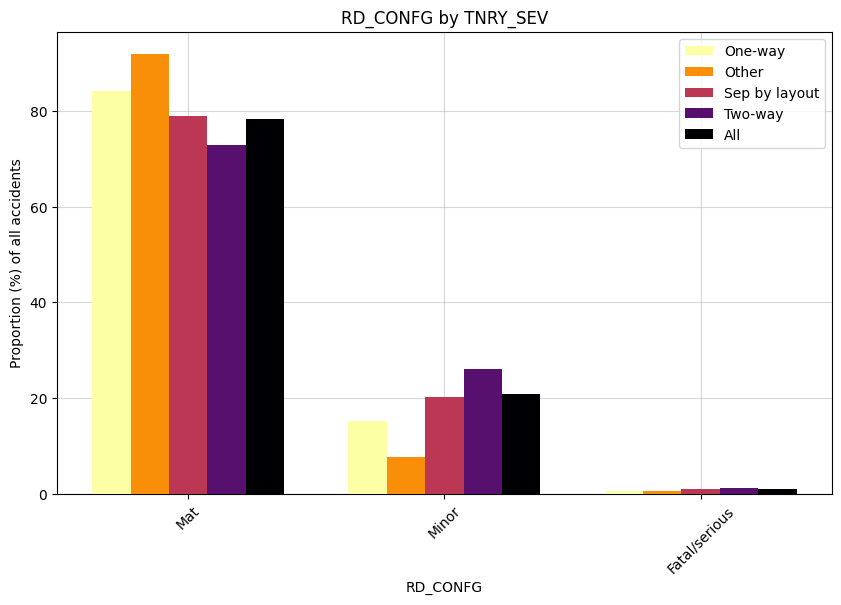

TNRY_SEV BY RDWX: Prob(TNRY_SEV | RDWX = column heading)


RDWX                        Y             All
Mat             7824 (↓79.4%)   7824 (↓79.4%)
Minor          1939 (↓19.68%)  1939 (↓19.68%)
Fatal/serious     91 (↓0.92%)     91 (↓0.92%)
All            9854 (↓100.0%)  9854 (↓100.0%)

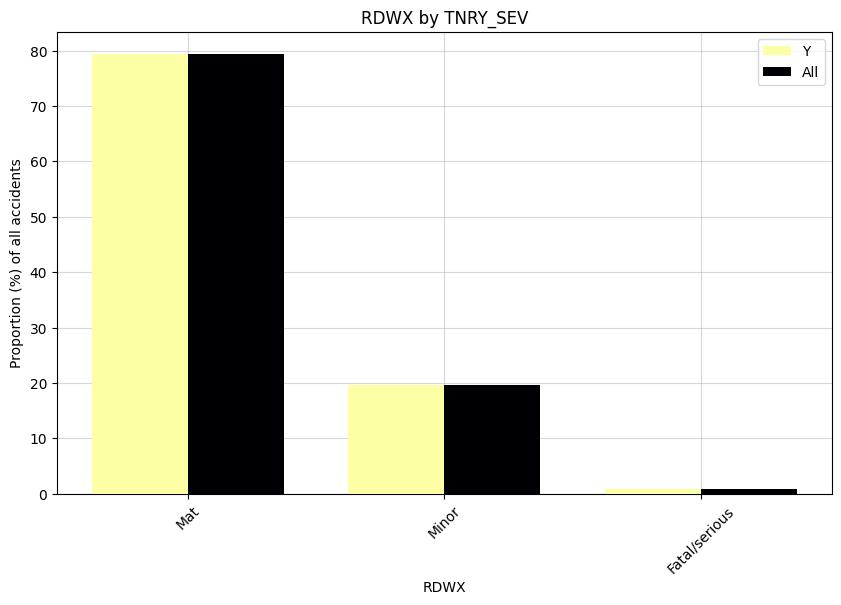

TNRY_SEV BY WEATHER: Prob(TNRY_SEV | WEATHER = column heading)


WEATHER            Black ice Blowing snow/snowstorm             Clear  \
Mat            774 (↓84.41%)         2024 (↓85.36%)  139980 (↓78.19%)   
Minor          140 (↓15.27%)           332 (↓14.0%)   37369 (↓20.87%)   
Fatal/serious     3 (↓0.33%)            15 (↓0.63%)     1674 (↓0.94%)   
All            917 (↓100.0%)         2371 (↓100.0%)  179023 (↓100.0%)   

WEATHER              Downpour       Fog/haze           Other         Overcast  \
Mat             1182 (↓69.2%)  355 (↓80.68%)  1292 (↓94.51%)  34927 (↓80.25%)   
Minor           498 (↓29.16%)   83 (↓18.86%)     72 (↓5.27%)   8231 (↓18.91%)   
Fatal/serious     28 (↓1.64%)     2 (↓0.45%)      3 (↓0.22%)     365 (↓0.84%)   
All            1708 (↓100.0%)  440 (↓100.0%)  1367 (↓100.0%)  43523 (↓100.0%)   

WEATHER           Rain/drizzle        Snow/hail    Strong wind  \
Mat            14912 (↓74.83%)   12923 (↓85.4%)  427 (↓80.41%)   
Minor           4793 (↓24.05%)   2148 (↓14.19%)   95 (↓17.89%)   
Fatal/serious     222 (↓1.11%)      62 (↓0.41%)     9 (↓1.69%)   
All            19927 (↓100.0%)  15133 (↓100.0%)  531 (↓100.0%)   

WEATHER                     All  
Mat            208796 (↓78.81%)  
Minor           53761 (↓20.29%)  
Fatal/serious      2383 (↓0.9%)  
All            264940 (↓100.0%)

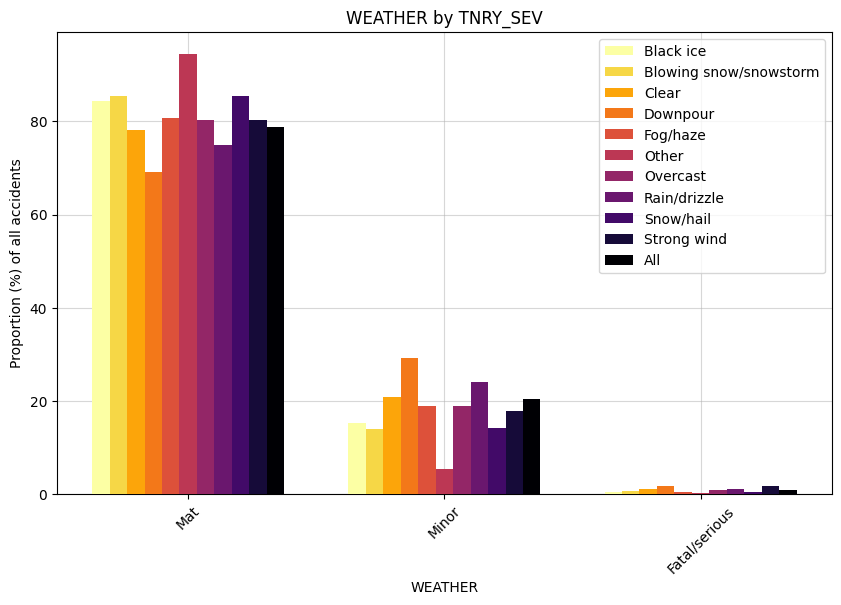

TNRY_SEV BY LT_TRK: Prob(TNRY_SEV | LT_TRK = column heading)


LT_TRK                       N                 Y               All
Mat            13737 (↓73.18%)  210392 (↓80.27%)   224129 (↓79.8%)
Minor            4617 (↓24.6%)   49714 (↓18.97%)   54331 (↓19.34%)
Fatal/serious     418 (↓2.23%)     2001 (↓0.76%)     2419 (↓0.86%)
All            18772 (↓100.0%)  262107 (↓100.0%)  280879 (↓100.0%)

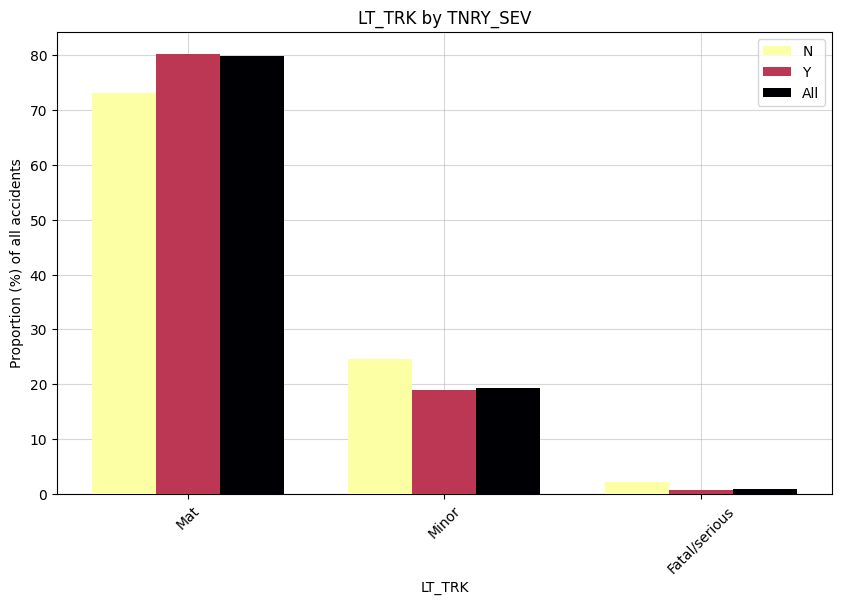

TNRY_SEV BY HVY_VEH: Prob(TNRY_SEV | HVY_VEH = column heading)


HVY_VEH                       N                Y               All
Mat            186473 (↓78.58%)  37656 (↓86.44%)   224129 (↓79.8%)
Minor           48802 (↓20.56%)   5529 (↓12.69%)   54331 (↓19.34%)
Fatal/serious     2041 (↓0.86%)     378 (↓0.87%)     2419 (↓0.86%)
All            237316 (↓100.0%)  43563 (↓100.0%)  280879 (↓100.0%)

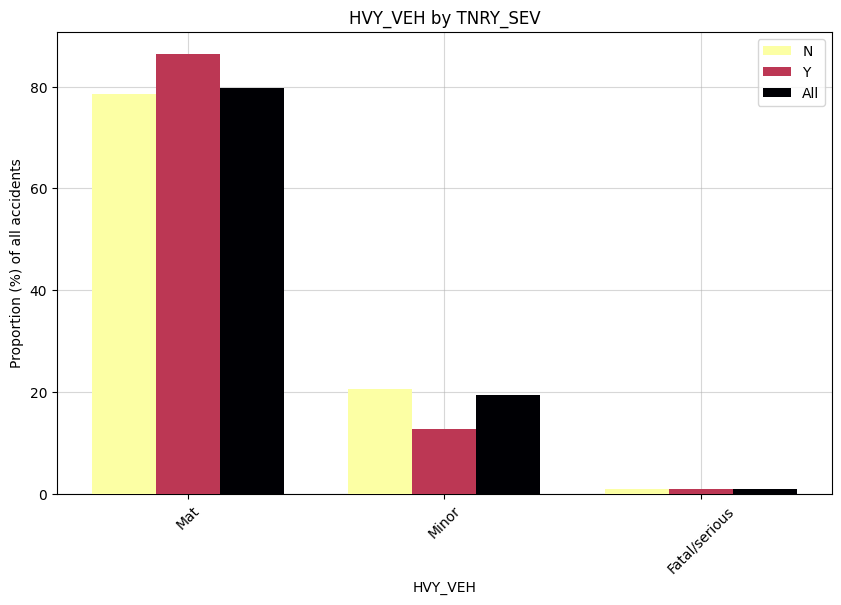

TNRY_SEV BY MTRCYC: Prob(TNRY_SEV | MTRCYC = column heading)


MTRCYC                        N               Y               All
Mat             222081 (↓80.5%)  2048 (↓40.83%)   224129 (↓79.8%)
Minor           51615 (↓18.71%)  2716 (↓54.15%)   54331 (↓19.34%)
Fatal/serious     2167 (↓0.79%)    252 (↓5.02%)     2419 (↓0.86%)
All            275863 (↓100.0%)  5016 (↓100.0%)  280879 (↓100.0%)

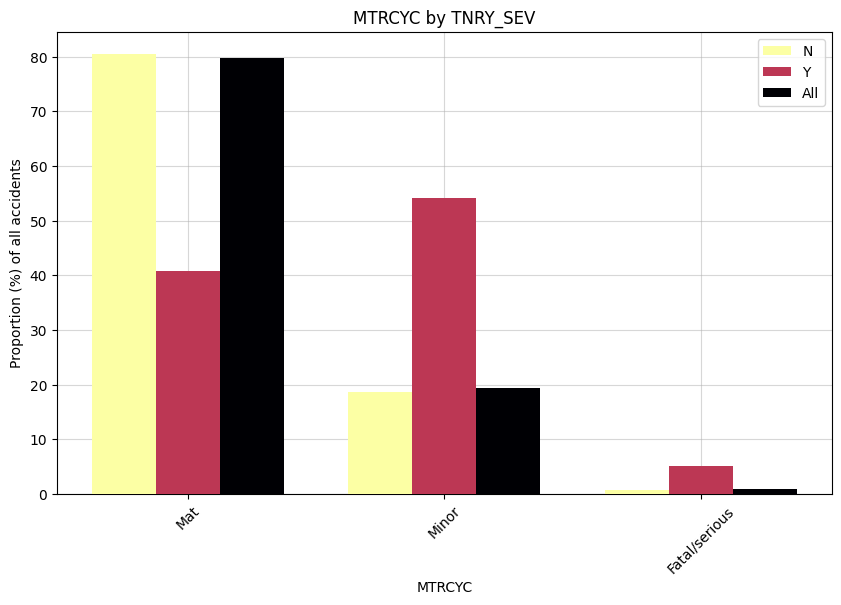

TNRY_SEV BY BICYC: Prob(TNRY_SEV | BICYC = column heading)


BICYC                         N               Y               All
Mat            222047 (↓81.59%)  2082 (↓23.88%)   224129 (↓79.8%)
Minor           48006 (↓17.64%)  6325 (↓72.55%)   54331 (↓19.34%)
Fatal/serious     2108 (↓0.77%)    311 (↓3.57%)     2419 (↓0.86%)
All            272161 (↓100.0%)  8718 (↓100.0%)  280879 (↓100.0%)

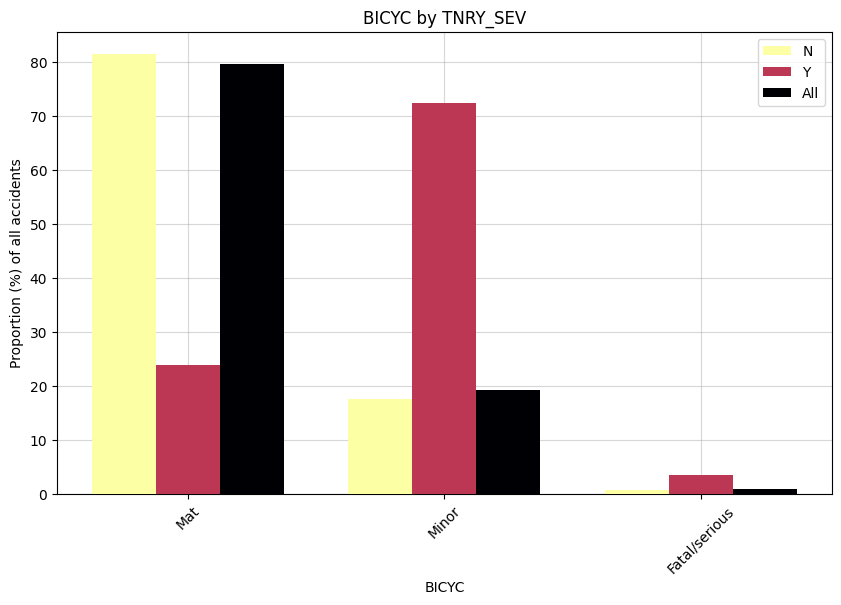

TNRY_SEV BY PED: Prob(TNRY_SEV | PED = column heading)


PED                           N                Y               All
Mat             224129 (↓83.1%)        0 (↓0.0%)   224129 (↓79.8%)
Minor           44206 (↓16.39%)  10125 (↓90.73%)   54331 (↓19.34%)
Fatal/serious     1385 (↓0.51%)    1034 (↓9.27%)     2419 (↓0.86%)
All            269720 (↓100.0%)  11159 (↓100.0%)  280879 (↓100.0%)

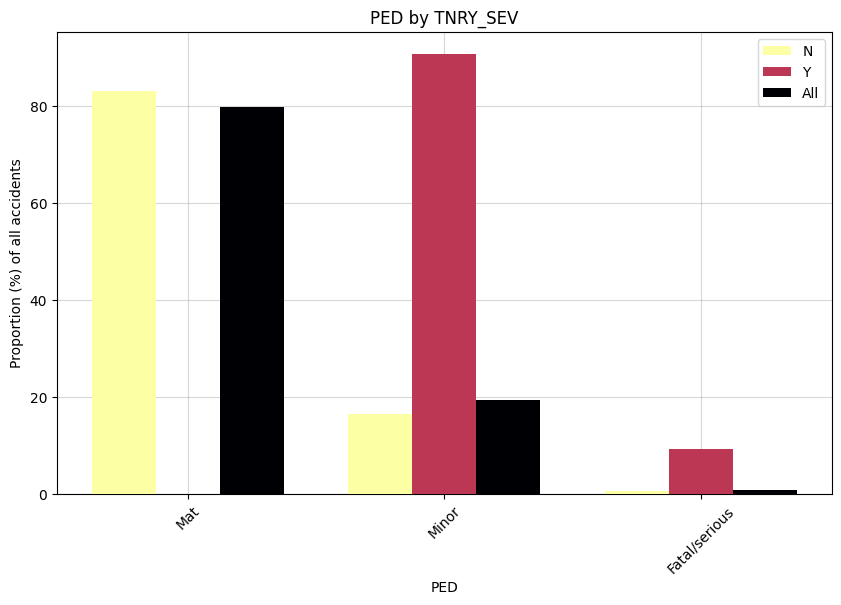

In [16]:
from saaq_data_dictionary import shorthand
from exploration import custom_crosstab, crosstab_plot

instance = mtl_3sev
df = instance.df_train.copy()

for col in df.columns:
    try:
        df[col] = df[col].map(shorthand[col])
    except:
        pass

columns = [c for c in df.columns if c not in instance.targets]
columns.remove("ID")

for A in instance.targets:
    for B in columns:
        print(f"{A} by {B}:".upper(), f"Prob({A} | {B} = column heading)")
        _, AxB1, AxB2, _, _ = custom_crosstab(df[A], df[B])  
        try:
            order = list(shorthand[A].values())
            AxB1 = AxB1.loc[order]
            order = order + ['All']
            AxB2 = AxB2.loc[order]
        except:
            pass
        display(AxB2)
        filename = "_".join([get_variable_name(instance), "EDA", "bar", f"{A}", "by", f"{B}"]) + ".png"                
        filepath = path["expository"].joinpath(filename)
        crosstab_plot(AxB1,ylabel=f"Proportion (%) of all accidents",save_as=filepath)

In [17]:
# Save memory...
plt.close('all')

<a id='animated_plots'></a>
## Animated plots
↑↑ [Contents](#contents) ↑ [Conditional distributions, with plots](#conditional) ↓ [Repeat with four-level severity](#repeat_with)

We can even show these distributions in an animated sequence, rather than in a single, static plot. For this, we call our ```crosstab_animation``` function from the ```exploration``` module.

SPD_LIM                     50              60               70  \
Mat            70075 (↓71.67%)  1201 (↓69.38%)  26739 (↓86.02%)   
Minor          26466 (↓27.07%)   506 (↓29.23%)   4190 (↓13.48%)   
Fatal/serious    1236 (↓1.26%)     24 (↓1.39%)      156 (↓0.5%)   
All            97777 (↓100.0%)  1731 (↓100.0%)  31085 (↓100.0%)   

SPD_LIM                   80             90              100              <50  \
Mat            759 (↓81.97%)  223 (↓84.47%)  11294 (↓84.05%)  38954 (↓78.13%)   
Minor           163 (↓17.6%)   38 (↓14.39%)   2040 (↓15.18%)  10479 (↓21.02%)   
Fatal/serious     4 (↓0.43%)     3 (↓1.14%)     103 (↓0.77%)     428 (↓0.86%)   
All            926 (↓100.0%)  264 (↓100.0%)  13437 (↓100.0%)  49861 (↓100.0%)   

SPD_LIM                     All  
Mat             149245 (↓76.5%)  
Minor           43882 (↓22.49%)  
Fatal/serious      1954 (↓1.0%)  
All            195081 (↓100.0%)

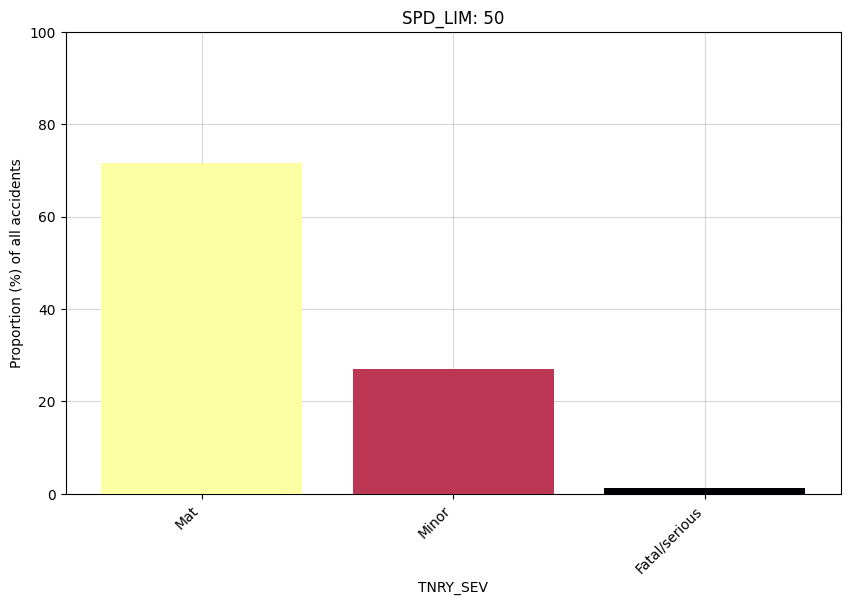

In [18]:
from saaq_data_dictionary import shorthand
from exploration import custom_crosstab, crosstab_animation
from IPython.display import HTML

instance = mtl_3sev
df = instance.df_train.copy()

A = "TNRY_SEV"
BB = ["MONTH", "ACCDN_TYPE", "WEATHER", "RD_CONFG", "RD_COND", "LONG_LOC", "ASPECT", "SPD_LIM"]
B = BB[7]

try:
    df[A] = df[A].map(shorthand[A])
except:
    pass

try:
    df[B] = df[B].map(shorthand[B])
except:
    pass

filename = filename = "_".join([get_variable_name(instance), "EDA", "crosstab", f"{A}", "by", f"{B}"]) + ".txt"
filepath = path["expository"].joinpath(filename)
AxB = custom_crosstab(df[A], df[B], save_as=None)[1]
AxB2 = custom_crosstab(df[A], df[B])[2]

try:
    order = list(shorthand[A].values())
    AxB = AxB.loc[order]
    order2 = order + ['All']
    AxB2 = AxB2.loc[order2]
except:
    pass

display(AxB2)

filename = filename = "_".join([get_variable_name(instance), "EDA", "bar", "anim", f"{A}", "by", f"{B}"]) + ".gif"
filepath = path["expository"].joinpath(filename)
anim = crosstab_animation(AxB, "Proportion (%) of all accidents", save_as=filepath)
HTML(anim.to_jshtml())

Below are some such animations: they may not display on GitHub.

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_ACCDN_TYPE.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_MONTH.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_RD_CONFG.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_RD_COND.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_LONG_LOC.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_ASPECT.gif)

![Alt Text](../expository/mtl_3sev_EDA_bar_anim_TNRY_SEV_by_SPD_LIM.gif)

<a id='repeat_with'></a>
## Repeat with four-level severity
↑↑ [Contents](#contents) ↑ [Animated plots](#animated_plots)

Supposing we wish to explore a different subset of the source data, and/or the same subset in different ways. It is simply a matter of creating a new instance of the ```process``` class. Below, we repeat everything we've just done, but for the all-case (four-level) severity. We can re-use our code cells with virtually no changes...

In [19]:
from typing import Type, Union
import pandas as pd

source: Type[primary] = saaq                            # Source data.
restrict_to: Union[list, None] = {"REGION" :            # Remove all records *unless* column k lies in list v, for k : v in restrict_to dictionary.
                                 ["Montréal (06)",],}    
    
remove_if: Union[list, None] = None                     # Remove all records if column k lies in list v, for k : v in remove_if dictionary.    
drop_row_if_missing_value_in: Union[list, None] = None  # We drop all rows for which there is a missing value (i.e. sentinel value, if applicable) in a column from this list.   
                                                        # Should include targets in this list (no point having missing target values). 
                                                        # Also, any column in "stratify_by" below, otherwise the stratified train-test-split will throw an error (TypeError: '<' not supported between instances of 'float' and 'str') if the values are strings.
targets: list = ["SEVERITY"]                            # We intend to make predictions for values in each of these columns.
                                                        # Can add 'MULT_VEH', 'VICTIMS', and 'TNRY_SEV' to targets (saaq data): columns will be inserted automatically.
                                                        # Can add 'MULT_VEH', 'VICTIMS' to targets (ncdb data).
non_features: list = ["YEAR"]                           # Can add "ID" etc. here but "ID" and any target will automatically be removed from features 
features: list = [c for c in saaq.df.columns            # These are the features we will want to use to make predictions about the targets.
                    if c not in non_features]            
                  
test_size: float = 0.15                                 # We'll partition what's left of the rows into train/test sets, with this as relative test set size.
                                                        # We'll also split the 'train' set later, either through k-fold cross-validation or, if not, train will be split 90/10 with the 10% share going to validation.
seed: int = 0                                           # Wherever there is randomness (e.g. during train/test split we'll shuffle), we'll use this seed.
stratify: bool = True                                   # If True, we'll perform a stratified train/test split. Also applies to k-fold cross-validation (if applicable).
stratify_by: Union[list, None] = targets                # If stratify is True, we'll stratify train/test split so that proportions are maintained for tuples of values from columns in this list.

In [20]:
from processing import process

mtl_sev = process(source=source,
              restrict_to=restrict_to,
              remove_if=remove_if,
              drop_row_if_missing_value_in=drop_row_if_missing_value_in,
              targets=targets,
              features=features,
              test_size=test_size,
              seed=seed,
              stratify=stratify,
              stratify_by=stratify_by)

Removing ID from self.features
Removing SEVERITY (it's a target) from self.features

Removing all records unless:
  REGION in ['Montréal (06)']

Removing REGION from self.features (but not from self.df) as the number of distinct non-null values in self.df['REGION'] is 1.

Removing NUM_VICTIMS from self.features (but not from self.df): can't use NUM_VICTIMS to predict SEVERITY.

Partitioning data into training/test sets: self.df_train/self.df_test.

self.ordinal_features = ['NUM_VEH', 'LIGHT', 'SPD_LIM']

self.ordinal_targets = ['SEVERITY']

self.categorical_features = ['MONTH', 'RD_COND', 'RDWX', 'ACCDN_TYPE', 'WKDY_WKND', 'RD_CONFG', 'PUB_PRIV_RD', 'HOUR', 'ZONE', 'HVY_VEH', 'MTRCYC', 'LONG_LOC', 'ASPECT', 'BICYC', 'WEATHER', 'LT_TRK', 'PED']

self.categorical_targets = []


In [21]:
instance = mtl_sev
df = instance.df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280879 entries, 543076 to 183289
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         280879 non-null  int64  
 1   ID           280879 non-null  object 
 2   MONTH        280879 non-null  int64  
 3   HOUR         260311 non-null  object 
 4   WKDY_WKND    280879 non-null  object 
 5   SEVERITY     280879 non-null  object 
 6   NUM_VICTIMS  280879 non-null  int64  
 7   NUM_VEH      280879 non-null  float64
 8   REGION       280879 non-null  object 
 9   SPD_LIM      195246 non-null  object 
 10  ACCDN_TYPE   269312 non-null  object 
 11  RD_COND      265951 non-null  float64
 12  LIGHT        265479 non-null  float64
 13  ZONE         272269 non-null  float64
 14  PUB_PRIV_RD  272701 non-null  float64
 15  ASPECT       268897 non-null  object 
 16  LONG_LOC     258743 non-null  float64
 17  RD_CONFG     255302 non-null  float64
 18  RDWX         9853 non-nu


COLUMNS WITH NULL VALUES



HOUR                 %
12:00-16:00  24.047366
16:00-20:00  22.919478
08:00-12:00  19.566433
20:00-24:00  11.447990
04:00-08:00   8.464499
NaN           7.322726
00:00-04:00   6.231509

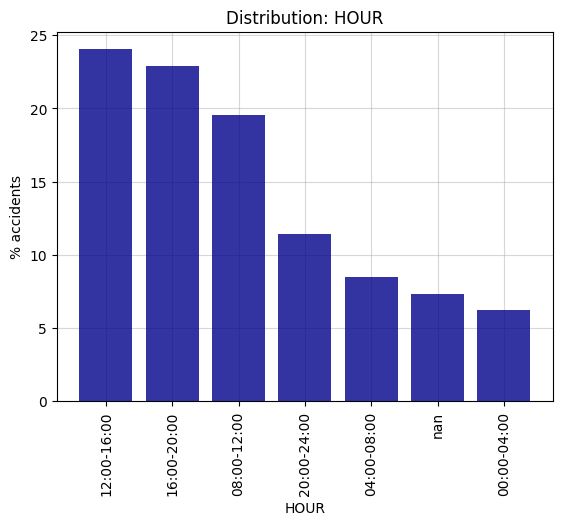

SPD_LIM          %
50       34.794698
NaN      30.487505
<50      17.832946
70       11.072383
100       4.772874
60        0.608803
80        0.338580
90        0.092211

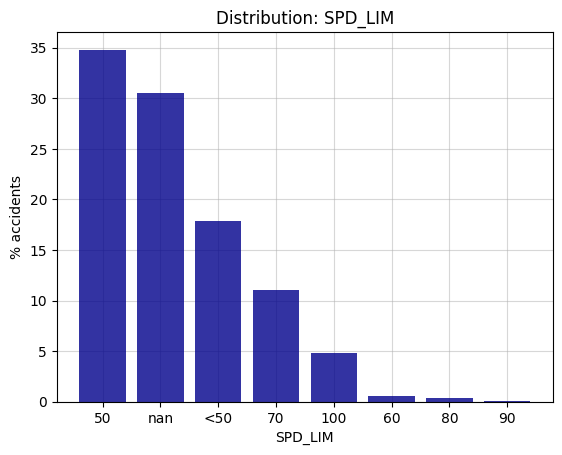

ACCDN_TYPE          %
veh         76.103945
fxd obj      9.110685
ped          4.383738
NaN          4.118143
cyc          2.834317
no coll      2.022579
oth          1.426593

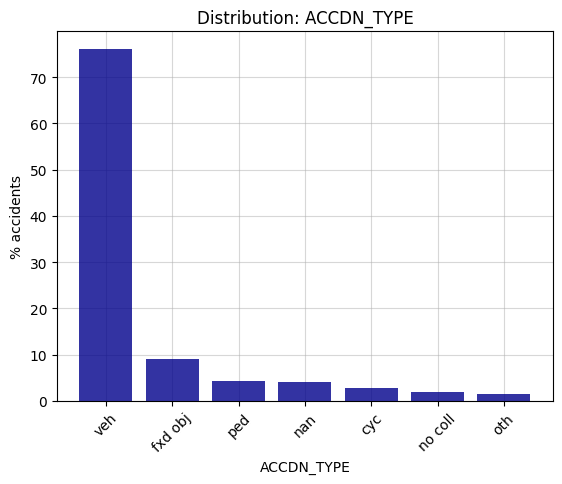

RD_COND              %
Dry          63.237907
Wet          16.747069
Snowy         8.789194
NaN           5.314744
Frozen        2.692619
Slush/sleet   1.504206
Hard snow     0.998651
Other         0.306538
Water acc     0.245657
Sand/gravel   0.118912
Muddy         0.029194
Oily          0.015309

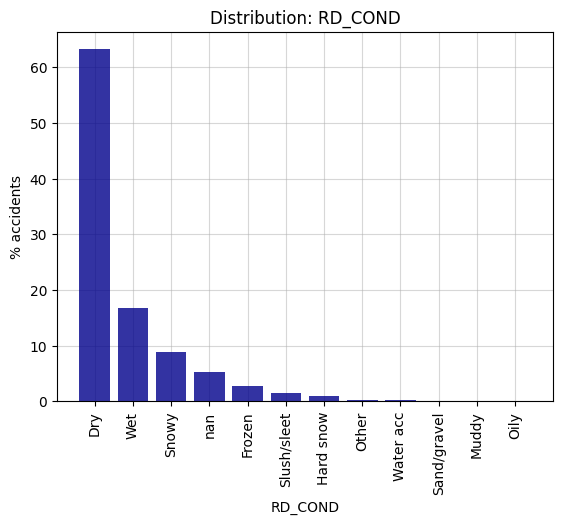

LIGHT               %
Clear day   63.389217
Lit path    25.661584
NaN          5.482788
Dawn/dusk    4.915284
Unlit path   0.551127

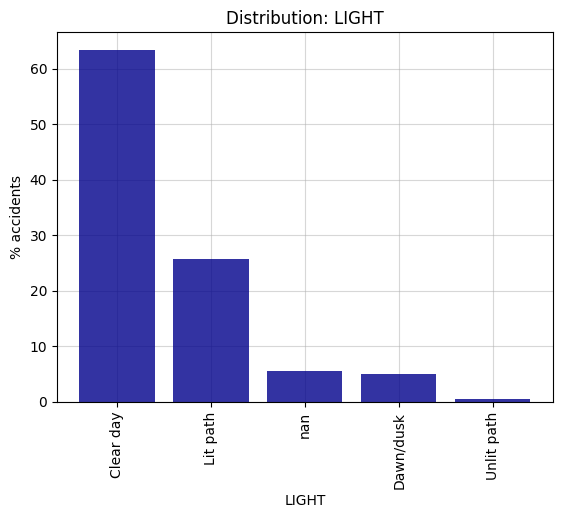

ZONE                         %
Business/commercial  50.727537
Residential          34.387405
Industrial            6.405961
NaN                   3.065377
Rural                 2.226938
School                1.692544
Other                 1.463264
Forest                0.030974

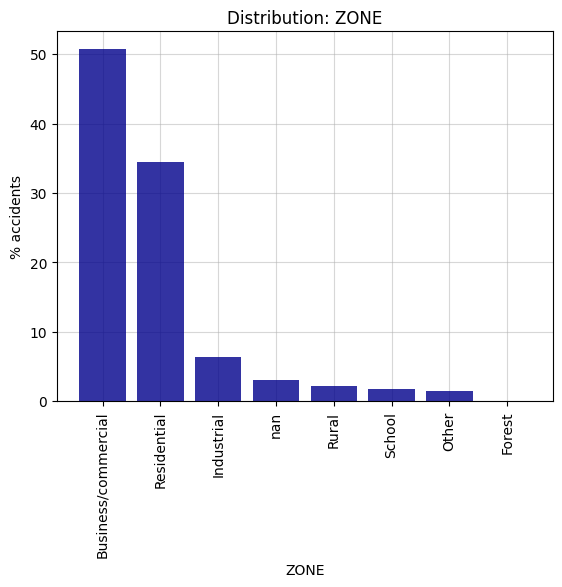

PUB_PRIV_RD          %
Public       85.321081
Private      11.767345
NaN           2.911574

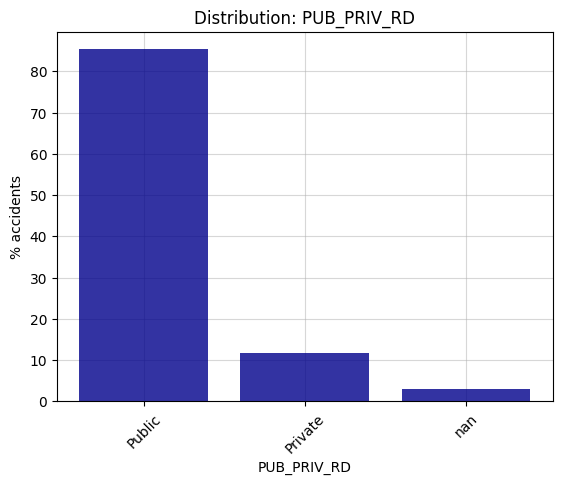

ASPECT            %
Straight  91.614895
NaN        4.265894
Curve      4.119211

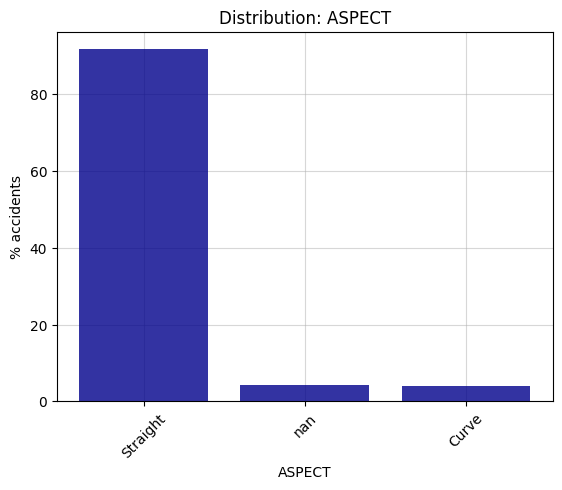

LONG_LOC                       %
Int'n/roundabout       32.183609
Btwn int'ns            24.714913
Near int'n/roundabout  18.152656
Other                   9.573517
NaN                     7.880974
Shop centre             4.666778
Bridge etc.             2.827552

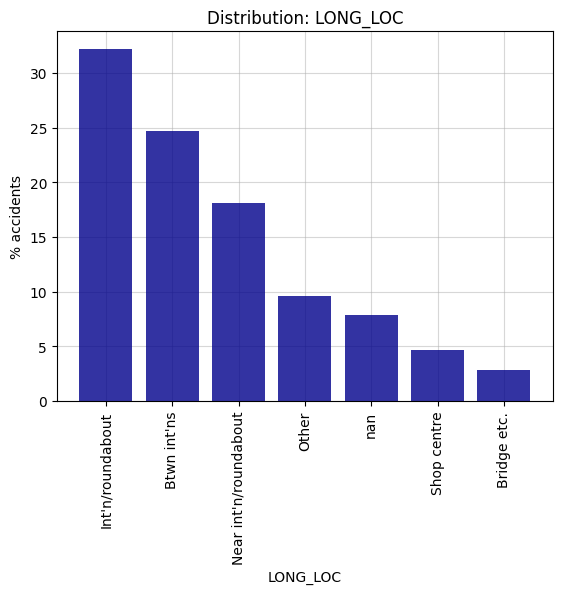

RD_CONFG               %
Two-way        43.338235
One-way        27.465919
Sep by layout  15.147092
NaN             9.106056
Other           4.942698

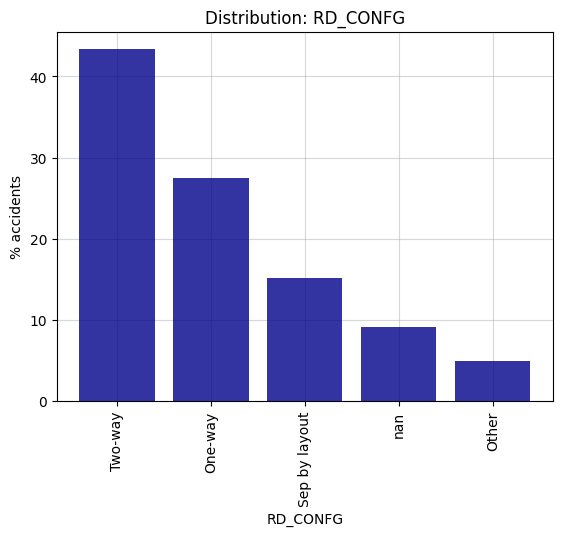

RDWX          %
NaN   96.492084
Y      3.507916

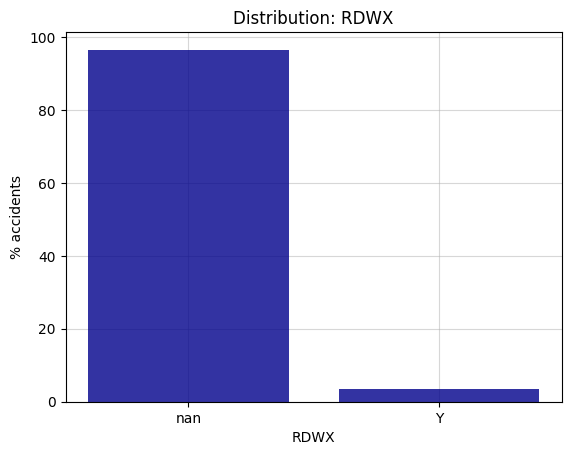

WEATHER                         %
Clear                   63.751651
Overcast                15.513086
Rain/drizzle             7.092022
NaN                      5.672193
Snow/hail                5.354619
Blowing snow/snowstorm   0.845916
Downpour                 0.617704
Other                    0.484906
Black ice                0.330035
Strong wind              0.185845
Fog/haze                 0.152023

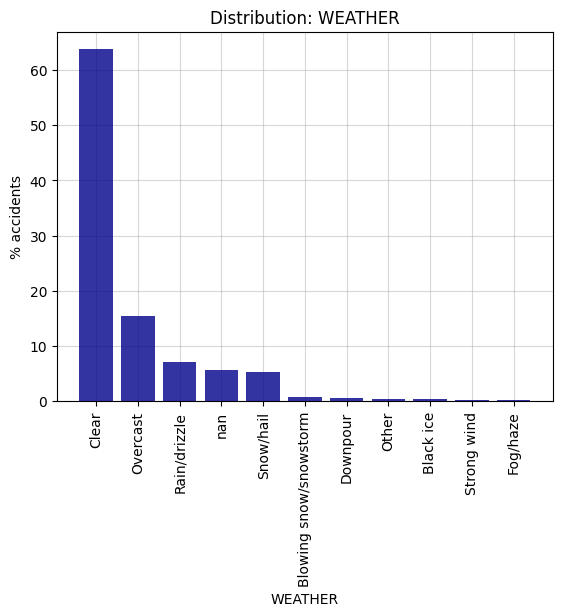


COLUMNS WITH NO NULL VALUES



YEAR          %
2011  12.244062
2012  11.141452
2013  11.125075
2017   8.335974
2016   8.189291
2018   8.180035
2015   8.104201
2014   8.008075
2019   7.552362
2022   6.224744
2021   5.681806
2020   5.212921

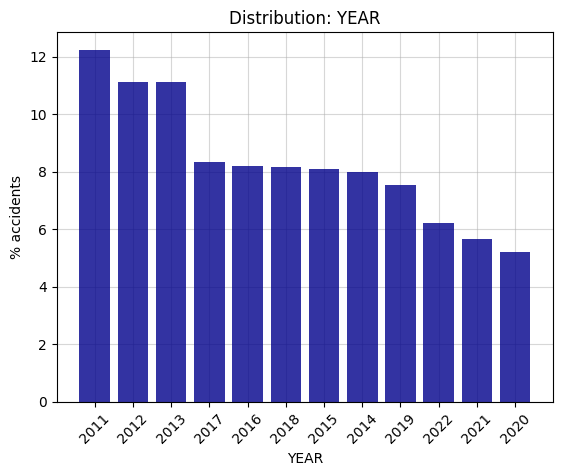

MONTH         %
Jan    9.528302
Feb    8.850786
Oct    8.684166
Dec    8.526803
Nov    8.522531
Jun    8.511138
Sep    8.473400
May    8.100641
Aug    8.068243
Jul    8.014127
Mar    7.860680
Apr    6.859181

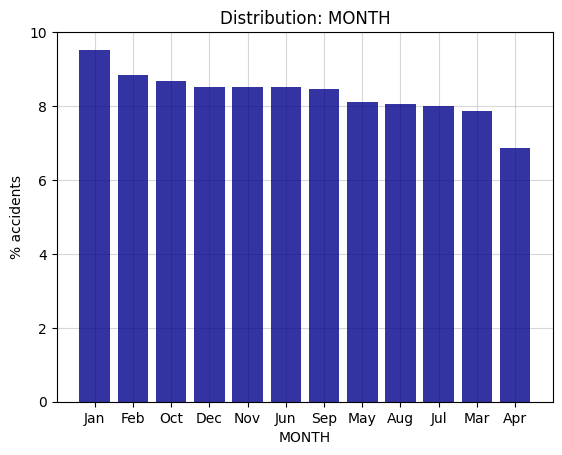

WKDY_WKND         %
WKDY       76.46175
WKND       23.53825

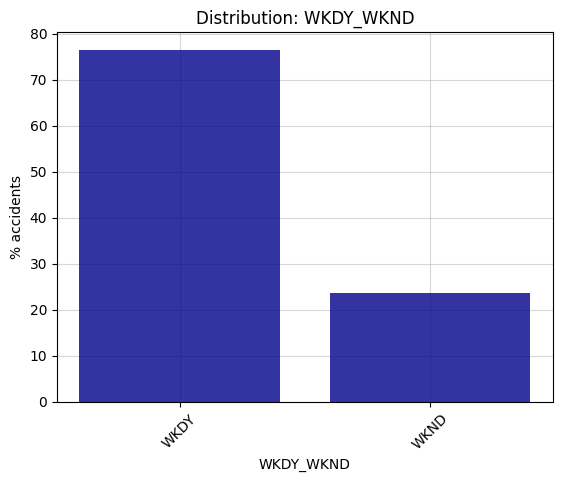

SEVERITY               %
Mat            43.538321
Mat < 2000     36.257250
Minor          19.343205
Fatal/serious   0.861225

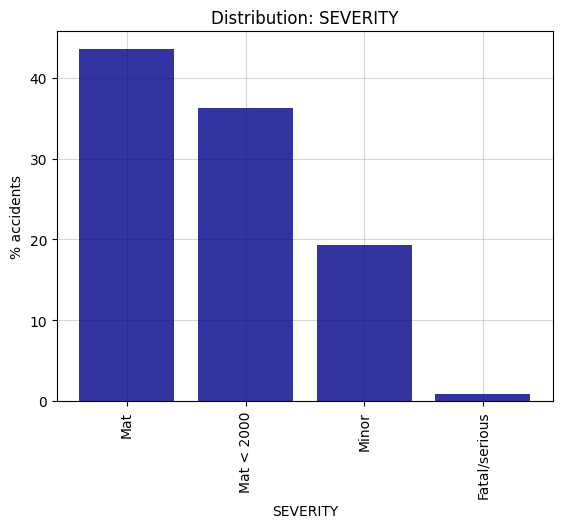

NUM_VICTIMS          %
0            79.795570
1            16.517077
2             2.770944
3+            0.916409

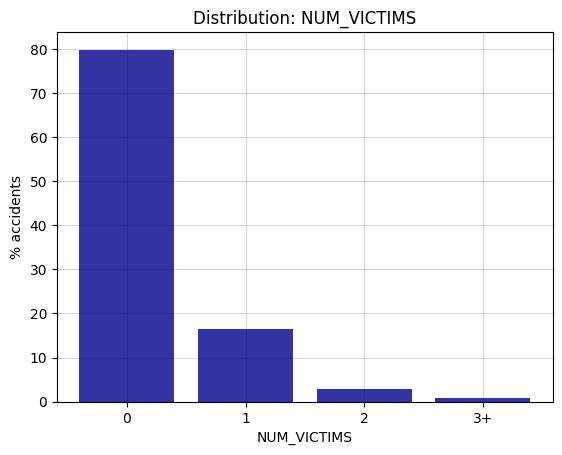

NUM_VEH          %
2        74.291777
1        16.316635
3+        9.391589

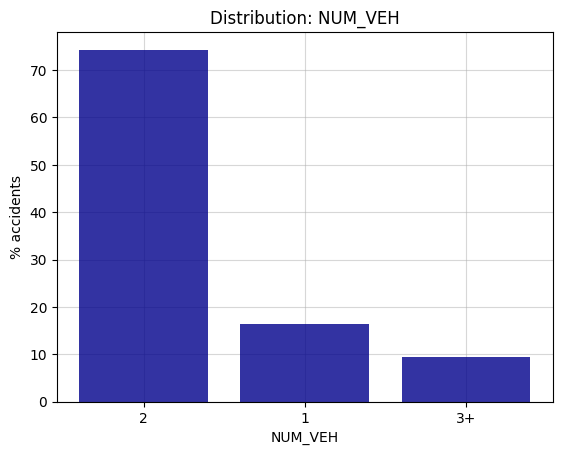

LT_TRK          %
Y       93.312779
N        6.687221

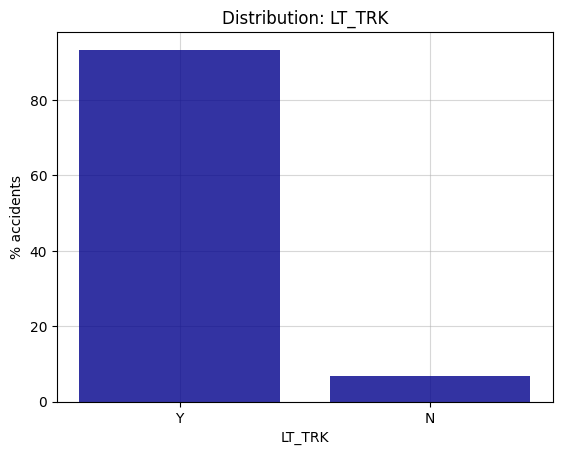

HVY_VEH          %
N        84.504716
Y        15.495284

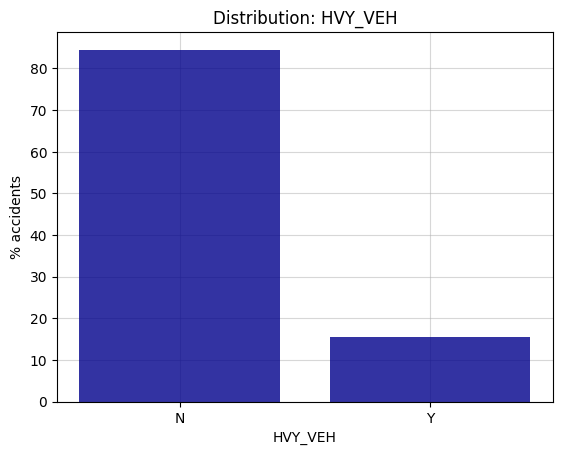

MTRCYC          %
N       98.221654
Y        1.778346

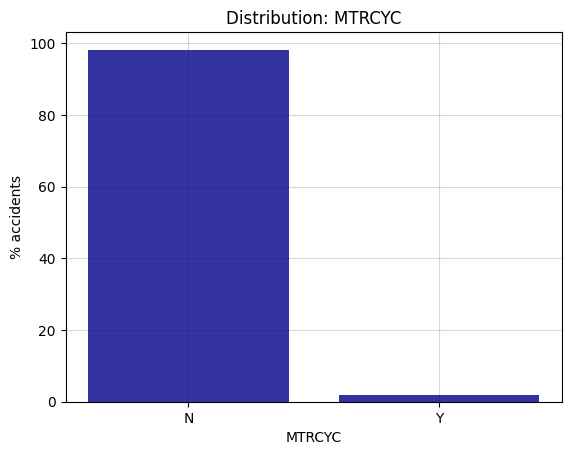

BICYC          %
N      96.889408
Y       3.110592

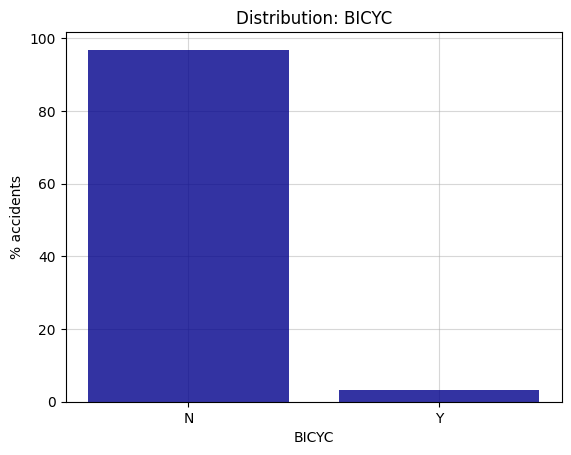

PED          %
N    96.041356
Y     3.958644

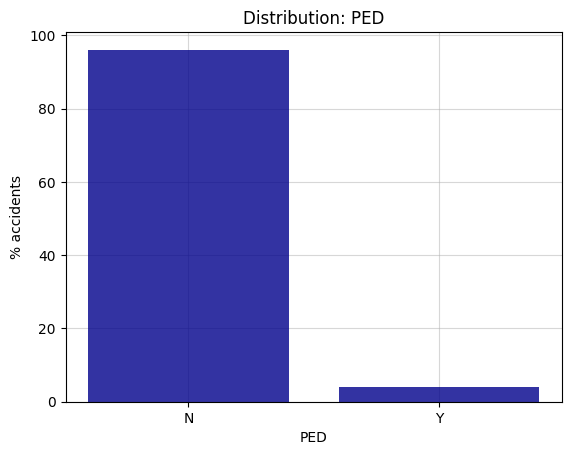

In [23]:
from exploration import distribution
from utils import get_variable_name

instance = mtl_sev
df = instance.df_train

columns = [c for c in df if c not in ["ID"] + list(instance.restrict_to.keys())]
columns_with_nulls = df.columns[df.isnull().any()].tolist()
columns_without_nulls = [c for c in columns if c not in columns_with_nulls]

print_header("Columns with null values")

for col in columns_with_nulls:
    distribution.table(df, col);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", col]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, col, save_as=filepath)
    
print_header("Columns with no null values")

for col in columns_without_nulls:
    distribution.table(df, col);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", col]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, col, save_as=filepath)

SEVERITY               %
Mat            43.538321
Mat < 2000     36.257250
Minor          19.343205
Fatal/serious   0.861225

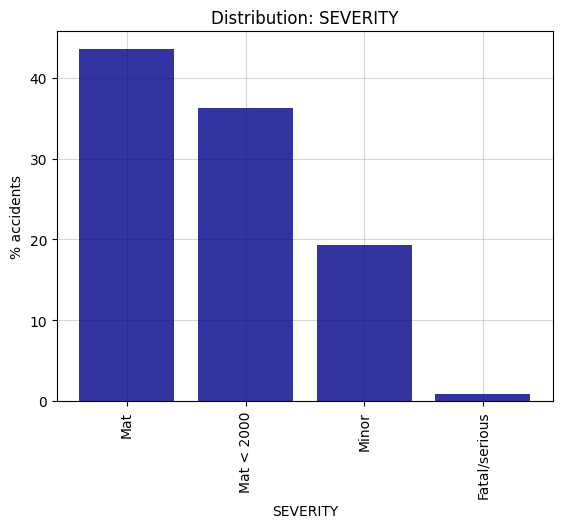

(SEVERITY, NUM_VICTIMS)          %
(Mat, 0)                 43.538321
(Mat < 2000, 0)          36.257250
(Minor, 1)               15.853090
(Minor, 2)                2.641351
(Minor, 3+)               0.848764
(Fatal/serious, 1)        0.663987
(Fatal/serious, 2)        0.129593
(Fatal/serious, 3+)       0.067645

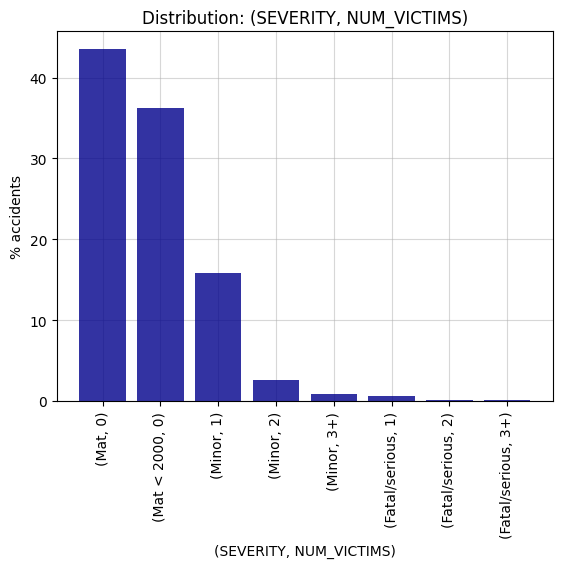

In [24]:
instance = mtl_sev
df = instance.df_train

for target in instance.targets:
    distribution.table(df, target);
    filename = "_".join([get_variable_name(instance), "EDA", "bar", target]) + ".png"
    filepath = path["expository"].joinpath(filename)
    distribution.plot(df, target, save_as=filepath)

distribution.tuple_table(df, instance.targets + ["NUM_VICTIMS"]);
filename = "_".join([get_variable_name(instance), "EDA", "bar", "SEVERITY_NUM_VICTIMS"]) + ".png"
filepath = path["expository"].joinpath(filename)
distribution.tuple_plot(df, instance.targets + ["NUM_VICTIMS"], save_as=filepath)

In [25]:
from variables import class_codes
from saaq_data_dictionary import shorthand

instance = mtl_sev
df = instance.df_train

variable_pairs = zip(["SEVERITY",
                       "PED", 
                       "BICYC", 
                       "PED",
                       "BICYC",
                       "NUM_VEH"],
                     ["NUM_VICTIMS",
                      "NUM_VICTIMS", 
                      "NUM_VICTIMS", 
                      "ACCDN_TYPE", 
                      "ACCDN_TYPE", 
                      "ACCDN_TYPE"])

for v1, v2 in variable_pairs:
    crosstab = pd.crosstab(df[v1], df[v2], dropna=False, margins=False)
    if v1 == "SEVERITY":
        order = class_codes["SEVERITY"].keys()
        crosstab = crosstab.loc[order]
    try:        
        crosstab.index = crosstab.index.map(shorthand[v1])
    except:
        pass
    try:
        crosstab.columns = crosstab.columns.map(shorthand[v2])
    except:
        pass
    display(crosstab)

NUM_VICTIMS         0      1     2    3+
SEVERITY                                
Mat < 2000     101839      0     0     0
Mat            122290      0     0     0
Minor               0  44528  7419  2384
Fatal/serious       0   1865   364   190

NUM_VICTIMS       0      1     2    3+
PED                                   
N            224129  35905  7249  2477
Y                 0  10488   534    97

NUM_VICTIMS       0      1     2    3+
BICYC                                 
N            222036  39870  7676  2560
Y              2093   6523   107    14

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh    NaN
PED                                                           
N           7955    25528     5648  3991   1784  213310  11544
Y              6       62       33    16  10529     450     23

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh    NaN
BICYC                                                         
N            155    25568     5586  3991  12305  213037  11500
Y           7806       22       95    16      8     723     67

ACCDN_TYPE   cyc  fxd obj  no coll   oth    ped     veh   NaN
NUM_VEH                                                      
1             41    23192     4491  2690  11810    2210  1396
2           7728     2156      926  1163    471  186547  9679
3+           192      242      264   154     32   25003   492

In [26]:
from variables import saaq_variable_types

instance = mtl_sev
df = instance.df_train

ordinal_variables = [col for col in df.columns if saaq_variable_types[col] == "ordinal"]

# print("Ordinal variables:", ", ".join(ordinal_variables))

df_ordinal = df[ordinal_variables].copy()
for col in df_ordinal:
    df_ordinal[col] = df_ordinal[col].map(class_codes[col])

display(df_ordinal.corr())

SEVERITY  NUM_VICTIMS   NUM_VEH   SPD_LIM     LIGHT
SEVERITY     1.000000     0.723654 -0.034036  0.073940 -0.033274
NUM_VICTIMS  0.723654     1.000000 -0.028884 -0.007636  0.002880
NUM_VEH     -0.034036    -0.028884  1.000000  0.010902  0.079634
SPD_LIM      0.073940    -0.007636  0.010902  1.000000 -0.006902
LIGHT       -0.033274     0.002880  0.079634 -0.006902  1.000000

In [27]:
instance = mtl_sev
df = instance.df_train

more_variable_pairs = [["SEVERITY", v] for v in ["ACCDN_TYPE",
                                                 "PED", 
                                                 "BICYC", 
                                                 "MTRCYC", 
                                                 "LT_TRK", 
                                                 "HVY_VEH",]]

for v1, v2 in more_variable_pairs:
    crosstab = pd.crosstab(df[v1], df[v2], 
                           dropna=False, margins=False, 
                           normalize="columns").mul(100).round(2)
    if v1 == "SEVERITY":
        order = class_codes["SEVERITY"].keys()
        crosstab = crosstab.loc[order]
        crosstab.index = crosstab.index.map(shorthand[v1])
    try:
        crosstab.columns = crosstab.columns.map(shorthand[v2])
    except:
        pass    
    display(crosstab)

ACCDN_TYPE       cyc  fxd obj  no coll    oth    ped    veh    NaN
SEVERITY                                                          
Mat < 2000     20.64    25.06    21.09  48.24  13.85  38.50  57.51
Mat             2.56    58.16    37.79  46.04   0.39  46.13  39.40
Minor          73.29    15.69    39.17   5.34  77.74  15.03   2.99
Fatal/serious   3.50     1.09     1.95   0.37   8.02   0.34   0.10

PED                N      Y
SEVERITY                   
Mat < 2000     37.75   0.00
Mat            45.33   0.00
Minor          16.41  90.55
Fatal/serious   0.51   9.45

BICYC              N      Y
SEVERITY                   
Mat < 2000     36.75  21.06
Mat            44.84   2.90
Minor          17.64  72.52
Fatal/serious   0.78   3.53

MTRCYC             N      Y
SEVERITY                   
Mat < 2000     36.44  26.25
Mat            44.06  14.71
Minor          18.71  54.15
Fatal/serious   0.79   4.88

LT_TRK             N      Y
SEVERITY                   
Mat < 2000     41.80  35.86
Mat            31.29  44.42
Minor          24.70  18.96
Fatal/serious   2.21   0.76

HVY_VEH            N      Y
SEVERITY                   
Mat < 2000     36.90  32.78
Mat            41.71  53.53
Minor          20.54  12.82
Fatal/serious   0.86   0.87

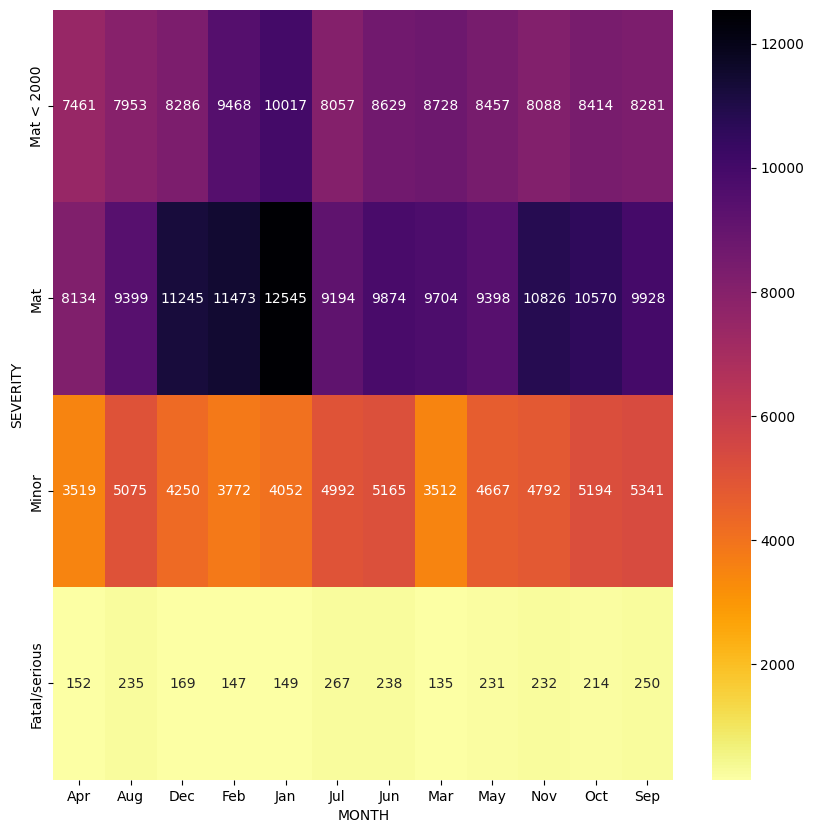

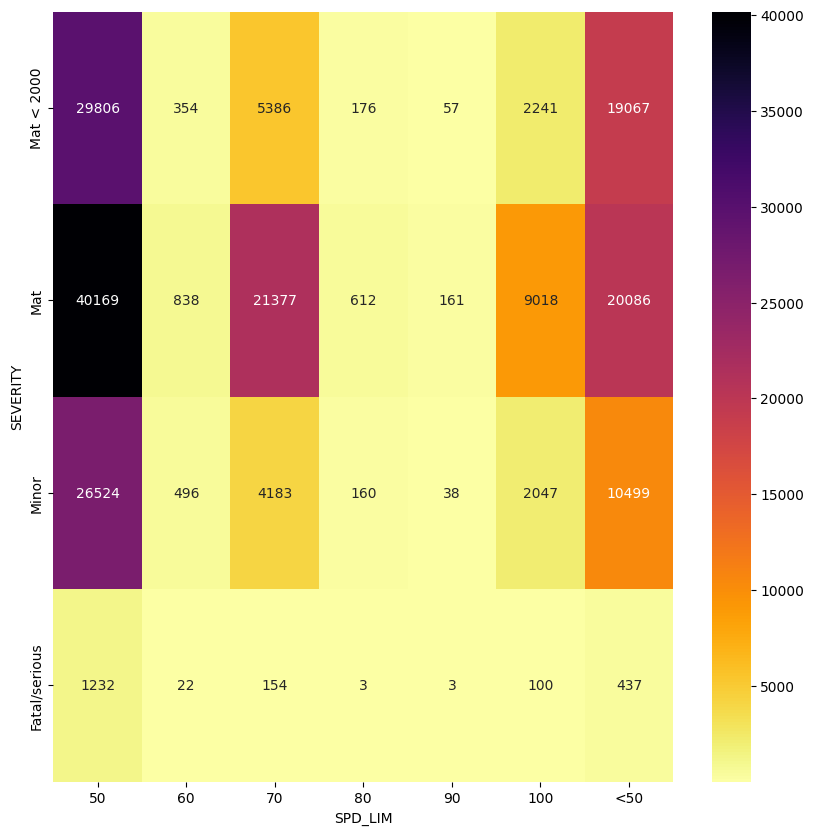

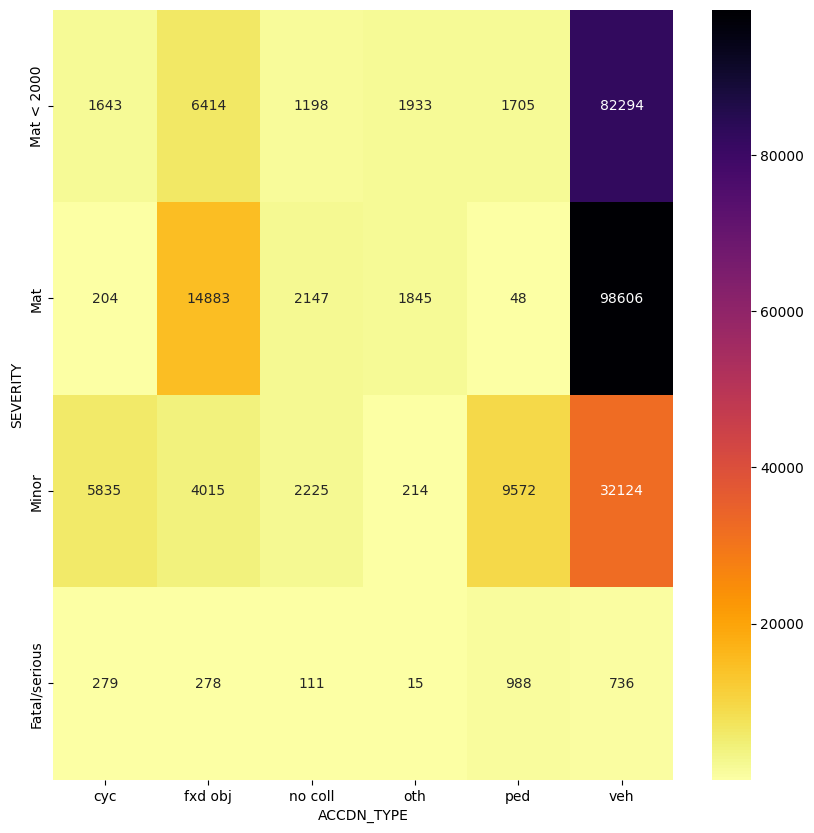

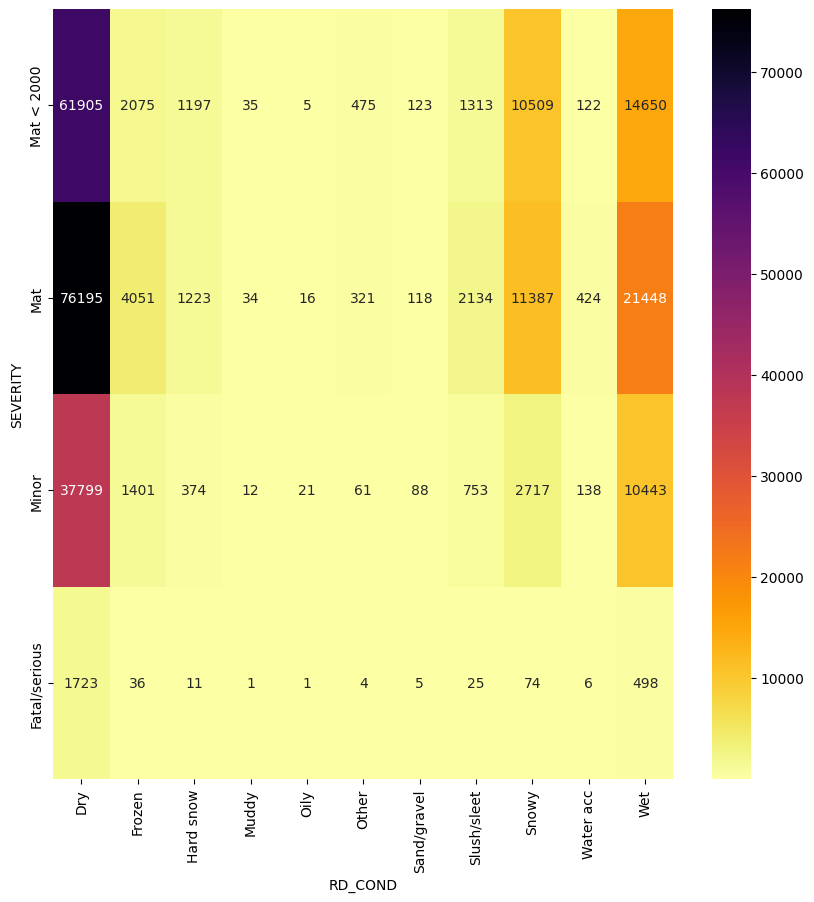

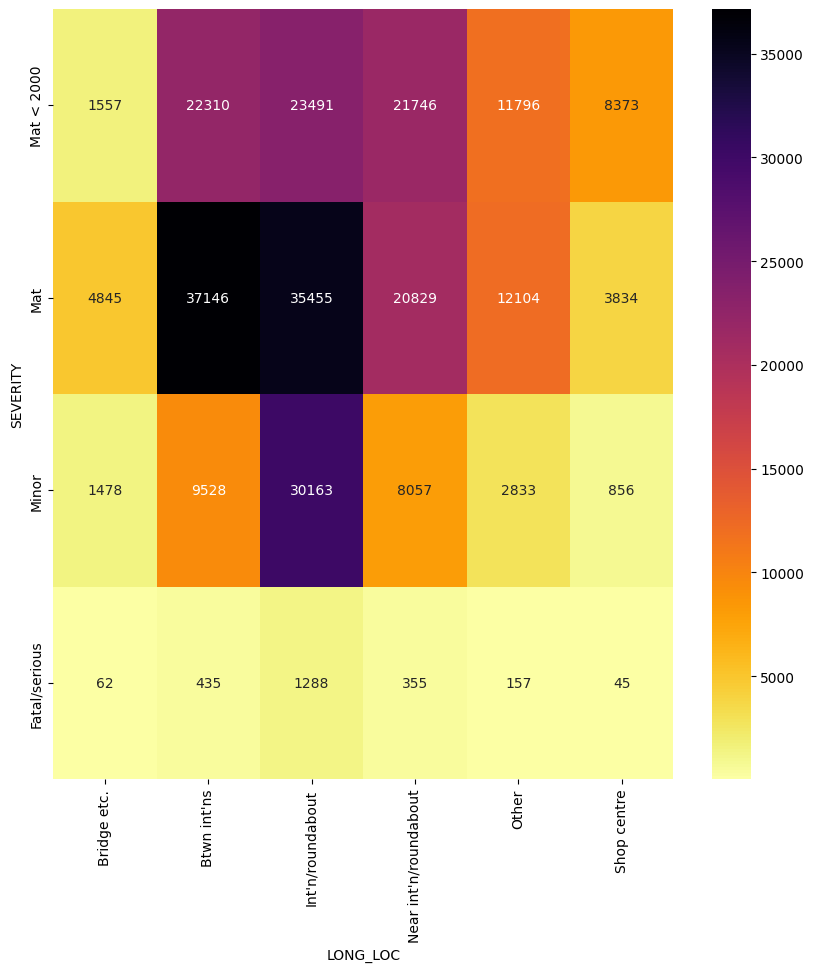

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

instance = mtl_sev
df = instance.df_train.copy()

for col in df.columns:
    try:
        df[col] = df[col].map(shorthand[col])
    except:
        pass

columns = [c for c in df.columns if c not in instance.targets]
columns.remove("ID")

# i columns[i]
# 0 'YEAR'
# 1 'MONTH'
# 2 'HOUR'
# 3 'WKDY_WKND'
# 4 'NUM_VICTIMS'
# 5 'NUM_VEH'
# 6 'REGION'
# 7 'SPD_LIM'
# 8 'ACCDN_TYPE'
# 9 'RD_COND'
# 10 'LIGHT'
# 11 'ZONE'
# 12 'PUB_PRIV_RD'
# 13 'ASPECT'
# 14 'LONG_LOC'
# 15 'RD_CONFG'
# 16 'RDWX'
# 17 'WEATHER'
# 18 'LT_TRK'
# 19 'HVY_VEH'
# 20 'MTRCYC'
# 21 'BICYC'
# 22 'PED'

for A in instance.targets:
    for idx in [1,7,8,9,14]:
        B = columns[idx]  
        AxB = pd.crosstab(df[A], df[B], dropna=True, margins=False)
        try:
            order = shorthand[A].values()
            AxB = AxB.loc[order]
        except:
            pass
        plt.figure(figsize=(10, 10))
        sns.heatmap(AxB, cmap='inferno_r', annot=True, fmt='d')
        filename = "_".join([get_variable_name(instance), "EDA", "heatmap", f"{A}", "by", f"{B}"]) + ".png"                
        filepath = path["expository"].joinpath(filename)
        plt.savefig(filepath)       

In [29]:
plt.close('all') 

SEVERITY BY YEAR: Prob(SEVERITY | YEAR = column heading)


YEAR                      2011             2012             2013  \
Mat < 2000     15006 (↓43.63%)  14139 (↓45.18%)  14227 (↓45.53%)   
Mat             13755 (↓40.0%)  11902 (↓38.03%)  12042 (↓38.54%)   
Minor           5350 (↓15.56%)   4993 (↓15.96%)    4750 (↓15.2%)   
Fatal/serious     280 (↓0.81%)     260 (↓0.83%)     229 (↓0.73%)   
All            34391 (↓100.0%)  31294 (↓100.0%)  31248 (↓100.0%)   

YEAR                      2014             2015             2016  \
Mat < 2000      7884 (↓35.05%)   7839 (↓34.44%)   7581 (↓32.96%)   
Mat             9731 (↓43.26%)   9850 (↓43.27%)  10251 (↓44.57%)   
Minor           4641 (↓20.63%)   4842 (↓21.27%)    4969 (↓21.6%)   
Fatal/serious     237 (↓1.05%)     232 (↓1.02%)     201 (↓0.87%)   
All            22493 (↓100.0%)  22763 (↓100.0%)  23002 (↓100.0%)   

YEAR                      2017             2018             2019  \
Mat < 2000      7980 (↓34.08%)   7672 (↓33.39%)   6685 (↓31.51%)   
Mat            10458 (↓44.67%)  10516 (↓45.77%)   9960 (↓46.95%)   
Minor           4783 (↓20.43%)   4603 (↓20.03%)   4415 (↓20.81%)   
Fatal/serious     193 (↓0.82%)     185 (↓0.81%)     153 (↓0.72%)   
All            23414 (↓100.0%)  22976 (↓100.0%)  21213 (↓100.0%)   

YEAR                      2020             2021             2022  \
Mat < 2000       4217 (↓28.8%)   4196 (↓26.29%)   4413 (↓25.24%)   
Mat             7330 (↓50.06%)   7725 (↓48.41%)   8770 (↓50.16%)   
Minor           2937 (↓20.06%)    3910 (↓24.5%)   4138 (↓23.67%)   
Fatal/serious     158 (↓1.08%)      128 (↓0.8%)     163 (↓0.93%)   
All            14642 (↓100.0%)  15959 (↓100.0%)  17484 (↓100.0%)   

YEAR                        All  
Mat < 2000     101839 (↓36.26%)  
Mat            122290 (↓43.54%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

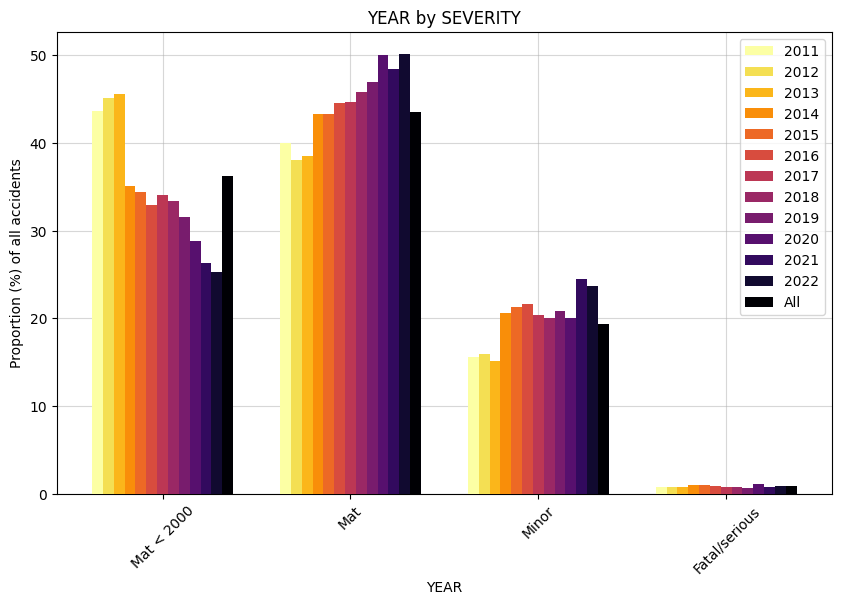

SEVERITY BY MONTH: Prob(SEVERITY | MONTH = column heading)


MONTH                      Apr              Aug              Dec  \
Mat < 2000      7461 (↓38.73%)   7953 (↓35.09%)    8286 (↓34.6%)   
Mat             8134 (↓42.22%)   9399 (↓41.47%)  11245 (↓46.95%)   
Minor           3519 (↓18.27%)   5075 (↓22.39%)   4250 (↓17.75%)   
Fatal/serious     152 (↓0.79%)     235 (↓1.04%)     169 (↓0.71%)   
All            19266 (↓100.0%)  22662 (↓100.0%)  23950 (↓100.0%)   

MONTH                      Feb              Jan              Jul  \
Mat < 2000      9468 (↓38.09%)  10017 (↓37.43%)   8057 (↓35.79%)   
Mat            11473 (↓46.15%)  12545 (↓46.87%)   9194 (↓40.84%)   
Minor           3772 (↓15.17%)   4052 (↓15.14%)   4992 (↓22.18%)   
Fatal/serious     147 (↓0.59%)     149 (↓0.56%)     267 (↓1.19%)   
All            24860 (↓100.0%)  26763 (↓100.0%)  22510 (↓100.0%)   

MONTH                      Jun              Mar              May  \
Mat < 2000       8629 (↓36.1%)   8728 (↓39.53%)   8457 (↓37.17%)   
Mat              9874 (↓41.3%)   9704 (↓43.95%)    9398 (↓41.3%)   
Minor           5165 (↓21.61%)   3512 (↓15.91%)   4667 (↓20.51%)   
Fatal/serious      238 (↓1.0%)     135 (↓0.61%)     231 (↓1.02%)   
All            23906 (↓100.0%)  22079 (↓100.0%)  22753 (↓100.0%)   

MONTH                      Nov              Oct              Sep  \
Mat < 2000      8088 (↓33.79%)   8414 (↓34.49%)   8281 (↓34.79%)   
Mat            10826 (↓45.23%)  10570 (↓43.33%)   9928 (↓41.71%)   
Minor           4792 (↓20.02%)   5194 (↓21.29%)   5341 (↓22.44%)   
Fatal/serious     232 (↓0.97%)     214 (↓0.88%)     250 (↓1.05%)   
All            23938 (↓100.0%)  24392 (↓100.0%)  23800 (↓100.0%)   

MONTH                       All  
Mat < 2000     101839 (↓36.26%)  
Mat            122290 (↓43.54%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

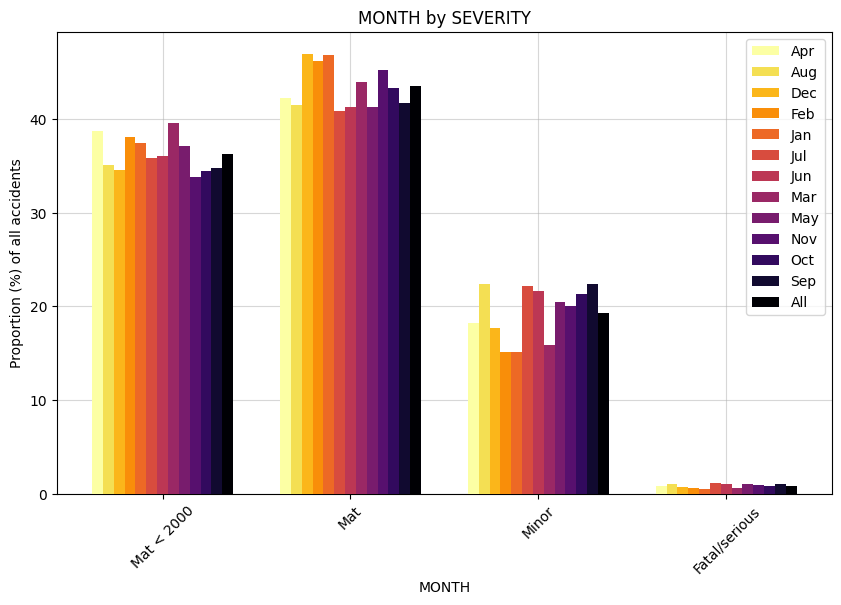

SEVERITY BY HOUR: Prob(SEVERITY | HOUR = column heading)


HOUR               00:00-04:00      04:00-08:00      08:00-12:00  \
Mat < 2000      4659 (↓26.62%)   6373 (↓26.81%)  20118 (↓36.61%)   
Mat              9609 (↓54.9%)  12190 (↓51.27%)  23817 (↓43.34%)   
Minor           2925 (↓16.71%)   4951 (↓20.82%)  10658 (↓19.39%)   
Fatal/serious     310 (↓1.77%)      261 (↓1.1%)     365 (↓0.66%)   
All            17503 (↓100.0%)  23775 (↓100.0%)  54958 (↓100.0%)   

HOUR               12:00-16:00      16:00-20:00      20:00-24:00  \
Mat < 2000     24548 (↓36.34%)  22640 (↓35.17%)  10394 (↓32.32%)   
Mat            28429 (↓42.09%)  26582 (↓41.29%)  14969 (↓46.55%)   
Minor          14083 (↓20.85%)  14623 (↓22.71%)   6370 (↓19.81%)   
Fatal/serious     484 (↓0.72%)     531 (↓0.82%)     422 (↓1.31%)   
All            67544 (↓100.0%)  64376 (↓100.0%)  32155 (↓100.0%)   

HOUR                        All  
Mat < 2000      88732 (↓34.09%)  
Mat            115596 (↓44.41%)  
Minor           53610 (↓20.59%)  
Fatal/serious     2373 (↓0.91%)  
All            260311 (↓100.0%)

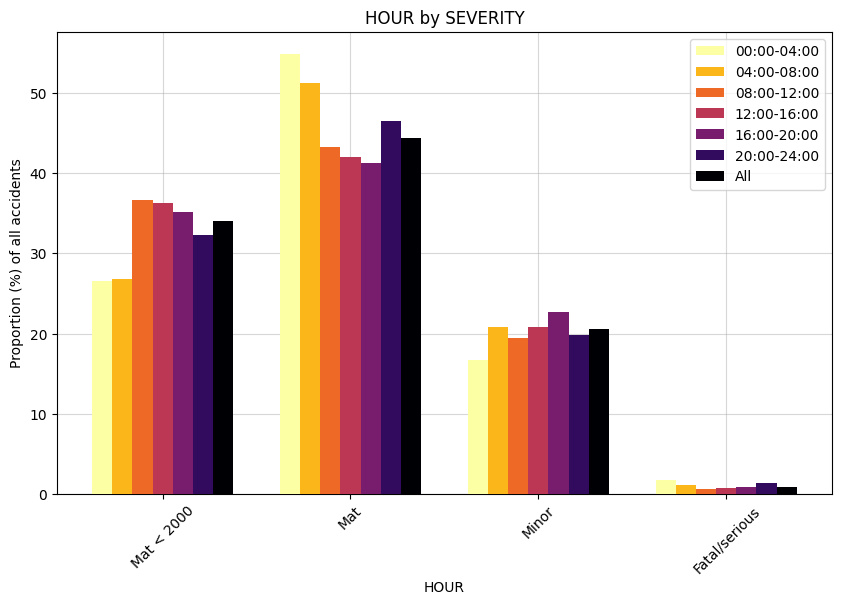

SEVERITY BY WKDY_WKND: Prob(SEVERITY | WKDY_WKND = column heading)


WKDY_WKND                  WKDY             WKND               All
Mat < 2000      79213 (↓36.88%)  22626 (↓34.22%)  101839 (↓36.26%)
Mat             92004 (↓42.84%)  30286 (↓45.81%)  122290 (↓43.54%)
Minor           41805 (↓19.47%)  12526 (↓18.95%)   54331 (↓19.34%)
Fatal/serious     1743 (↓0.81%)     676 (↓1.02%)     2419 (↓0.86%)
All            214765 (↓100.0%)  66114 (↓100.0%)  280879 (↓100.0%)

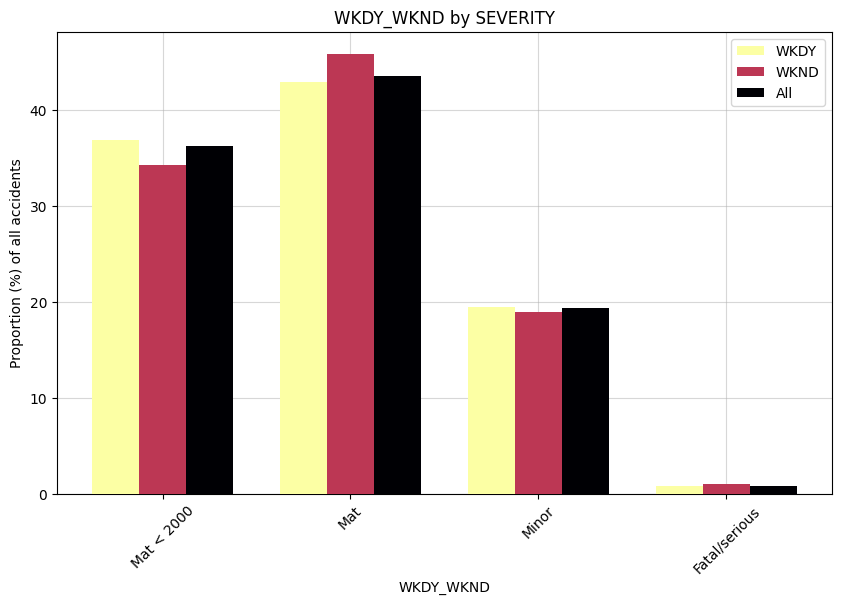

SEVERITY BY NUM_VICTIMS: Prob(SEVERITY | NUM_VICTIMS = column heading)


NUM_VICTIMS                   0                1               2  \
Mat < 2000     101839 (↓45.44%)        0 (↓0.0%)       0 (↓0.0%)   
Mat            122290 (↓54.56%)        0 (↓0.0%)       0 (↓0.0%)   
Minor                 0 (↓0.0%)  44528 (↓95.98%)  7419 (↓95.32%)   
Fatal/serious         0 (↓0.0%)    1865 (↓4.02%)    364 (↓4.68%)   
All            224129 (↓100.0%)  46393 (↓100.0%)  7783 (↓100.0%)   

NUM_VICTIMS                3+               All  
Mat < 2000          0 (↓0.0%)  101839 (↓36.26%)  
Mat                 0 (↓0.0%)  122290 (↓43.54%)  
Minor          2384 (↓92.62%)   54331 (↓19.34%)  
Fatal/serious    190 (↓7.38%)     2419 (↓0.86%)  
All            2574 (↓100.0%)  280879 (↓100.0%)

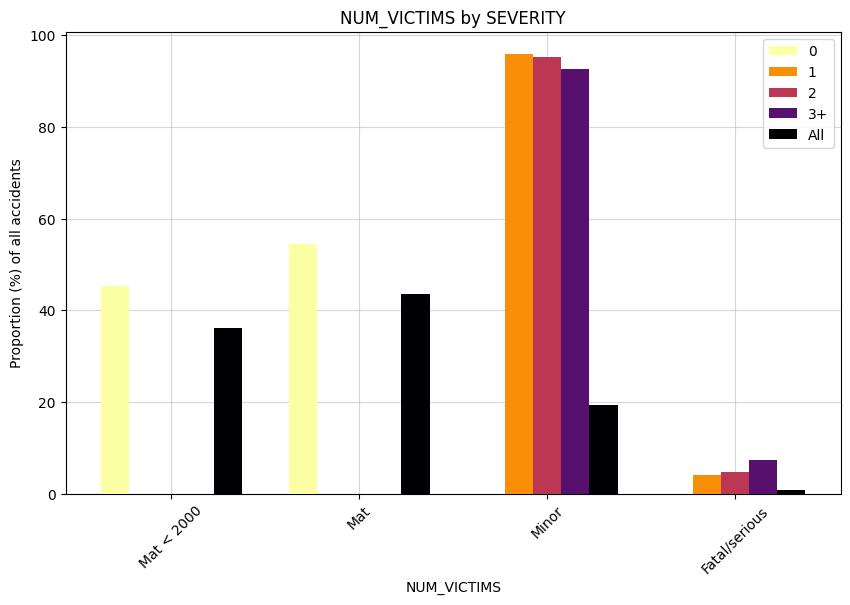

SEVERITY BY NUM_VEH: Prob(SEVERITY | NUM_VEH = column heading)


NUM_VEH                      1                 2               3+  \
Mat < 2000     11125 (↓24.27%)   89140 (↓42.72%)    1574 (↓5.97%)   
Mat            18110 (↓39.52%)    86799 (↓41.6%)  17381 (↓65.89%)   
Minor           15308 (↓33.4%)   31844 (↓15.26%)   7179 (↓27.21%)   
Fatal/serious    1287 (↓2.81%)      887 (↓0.43%)     245 (↓0.93%)   
All            45830 (↓100.0%)  208670 (↓100.0%)  26379 (↓100.0%)   

NUM_VEH                     All  
Mat < 2000     101839 (↓36.26%)  
Mat            122290 (↓43.54%)  
Minor           54331 (↓19.34%)  
Fatal/serious     2419 (↓0.86%)  
All            280879 (↓100.0%)

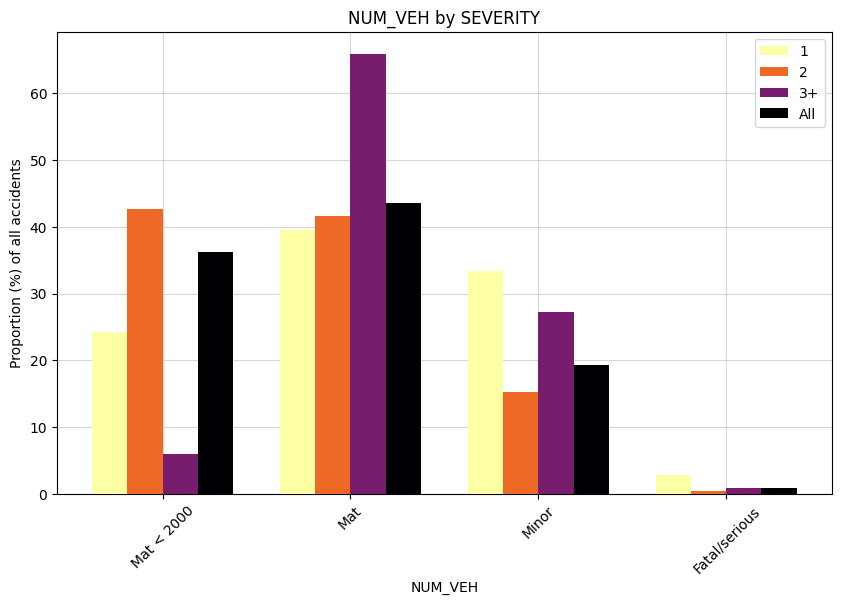

SEVERITY BY REGION: Prob(SEVERITY | REGION = column heading)


REGION                 Montréal               All
Mat < 2000     101839 (↓36.26%)  101839 (↓36.26%)
Mat            122290 (↓43.54%)  122290 (↓43.54%)
Minor           54331 (↓19.34%)   54331 (↓19.34%)
Fatal/serious     2419 (↓0.86%)     2419 (↓0.86%)
All            280879 (↓100.0%)  280879 (↓100.0%)

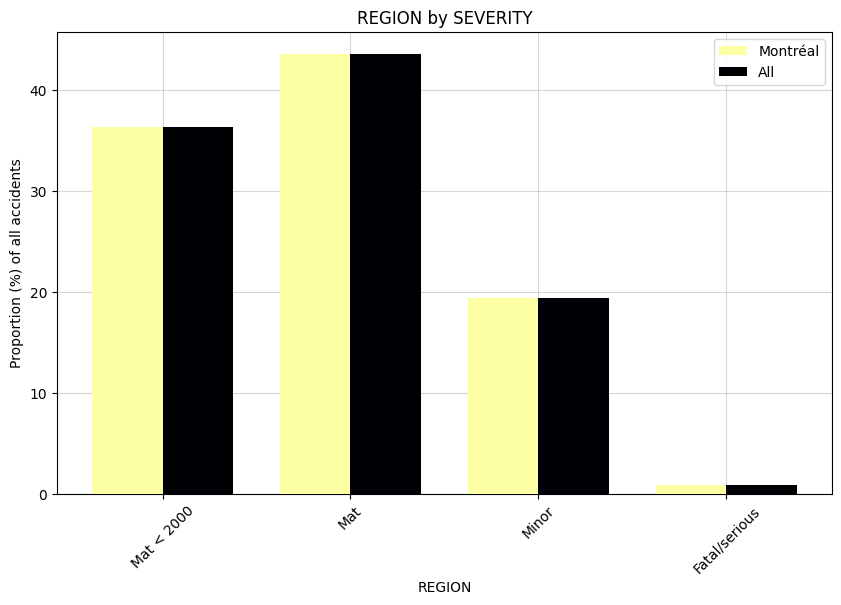

SEVERITY BY SPD_LIM: Prob(SEVERITY | SPD_LIM = column heading)


SPD_LIM                     50              60               70  \
Mat < 2000      29806 (↓30.5%)    354 (↓20.7%)   5386 (↓17.32%)   
Mat             40169 (↓41.1%)   838 (↓49.01%)  21377 (↓68.74%)   
Minor          26524 (↓27.14%)   496 (↓29.01%)   4183 (↓13.45%)   
Fatal/serious    1232 (↓1.26%)     22 (↓1.29%)      154 (↓0.5%)   
All            97731 (↓100.0%)  1710 (↓100.0%)  31100 (↓100.0%)   

SPD_LIM                   80             90              100              <50  \
Mat < 2000     176 (↓18.51%)   57 (↓22.01%)   2241 (↓16.72%)  19067 (↓38.07%)   
Mat            612 (↓64.35%)  161 (↓62.16%)   9018 (↓67.27%)   20086 (↓40.1%)   
Minor          160 (↓16.82%)   38 (↓14.67%)   2047 (↓15.27%)  10499 (↓20.96%)   
Fatal/serious     3 (↓0.32%)     3 (↓1.16%)     100 (↓0.75%)     437 (↓0.87%)   
All            951 (↓100.0%)  259 (↓100.0%)  13406 (↓100.0%)  50089 (↓100.0%)   

SPD_LIM                     All  
Mat < 2000      57087 (↓29.24%)  
Mat             92261 (↓47.25%)  
Minor           43947 (↓22.51%)  
Fatal/serious      1951 (↓1.0%)  
All            195246 (↓100.0%)

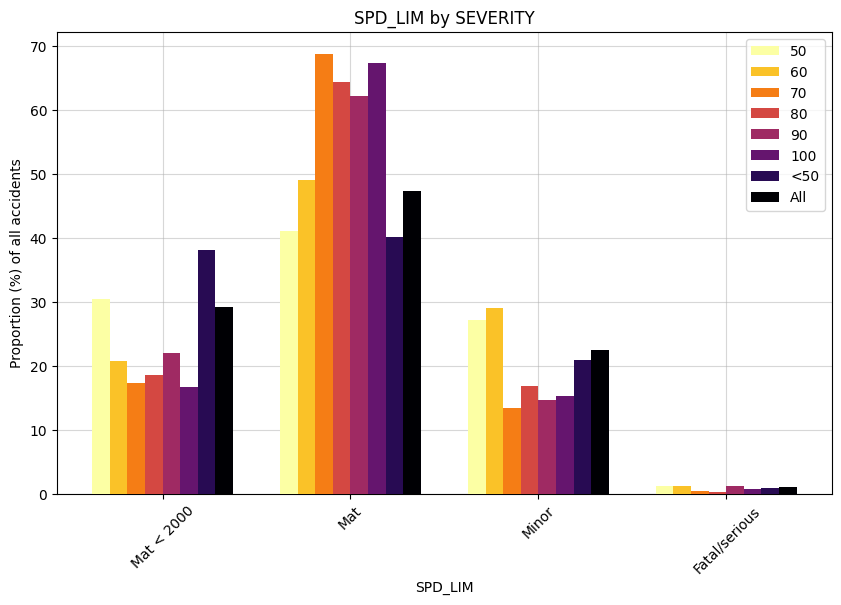

SEVERITY BY ACCDN_TYPE: Prob(SEVERITY | ACCDN_TYPE = column heading)


ACCDN_TYPE                cyc          fxd obj         no coll  \
Mat < 2000     1643 (↓20.64%)   6414 (↓25.06%)  1198 (↓21.09%)   
Mat              204 (↓2.56%)  14883 (↓58.16%)  2147 (↓37.79%)   
Minor          5835 (↓73.29%)   4015 (↓15.69%)  2225 (↓39.17%)   
Fatal/serious     279 (↓3.5%)     278 (↓1.09%)    111 (↓1.95%)   
All            7961 (↓100.0%)  25590 (↓100.0%)  5681 (↓100.0%)   

ACCDN_TYPE                oth              ped               veh  \
Mat < 2000     1933 (↓48.24%)   1705 (↓13.85%)    82294 (↓38.5%)   
Mat            1845 (↓46.04%)      48 (↓0.39%)   98606 (↓46.13%)   
Minor            214 (↓5.34%)   9572 (↓77.74%)   32124 (↓15.03%)   
Fatal/serious     15 (↓0.37%)     988 (↓8.02%)      736 (↓0.34%)   
All            4007 (↓100.0%)  12313 (↓100.0%)  213760 (↓100.0%)   

ACCDN_TYPE                  All  
Mat < 2000      95187 (↓35.34%)  
Mat            117733 (↓43.72%)  
Minor           53985 (↓20.05%)  
Fatal/serious     2407 (↓0.89%)  
All            269312 (↓100.0%)

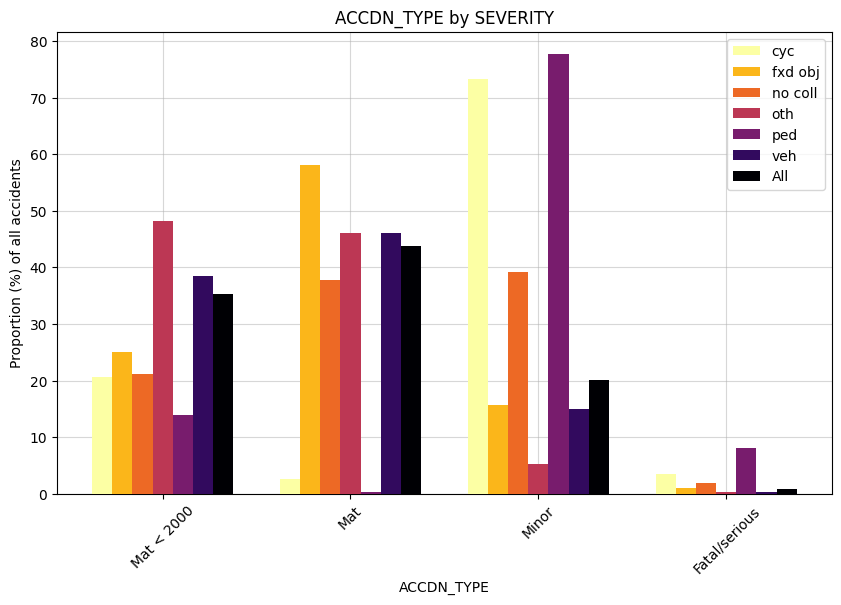

SEVERITY BY RD_COND: Prob(SEVERITY | RD_COND = column heading)


RD_COND                     Dry          Frozen       Hard snow         Muddy  \
Mat < 2000      61905 (↓34.85%)  2075 (↓27.44%)  1197 (↓42.67%)  35 (↓42.68%)   
Mat              76195 (↓42.9%)  4051 (↓53.56%)   1223 (↓43.6%)  34 (↓41.46%)   
Minor           37799 (↓21.28%)  1401 (↓18.52%)   374 (↓13.33%)  12 (↓14.63%)   
Fatal/serious     1723 (↓0.97%)     36 (↓0.48%)     11 (↓0.39%)    1 (↓1.22%)   
All            177622 (↓100.0%)  7563 (↓100.0%)  2805 (↓100.0%)  82 (↓100.0%)   

RD_COND                Oily          Other    Sand/gravel     Slush/sleet  \
Mat < 2000      5 (↓11.63%)  475 (↓55.17%)  123 (↓36.83%)  1313 (↓31.08%)   
Mat            16 (↓37.21%)  321 (↓37.28%)  118 (↓35.33%)  2134 (↓50.51%)   
Minor          21 (↓48.84%)    61 (↓7.08%)   88 (↓26.35%)   753 (↓17.82%)   
Fatal/serious    1 (↓2.33%)     4 (↓0.46%)      5 (↓1.5%)     25 (↓0.59%)   
All            43 (↓100.0%)  861 (↓100.0%)  334 (↓100.0%)  4225 (↓100.0%)   

RD_COND                  Snowy      Water acc              Wet  \
Mat < 2000     10509 (↓42.57%)  122 (↓17.68%)  14650 (↓31.14%)   
Mat            11387 (↓46.13%)  424 (↓61.45%)   21448 (↓45.6%)   
Minor           2717 (↓11.01%)   138 (↓20.0%)   10443 (↓22.2%)   
Fatal/serious       74 (↓0.3%)     6 (↓0.87%)     498 (↓1.06%)   
All            24687 (↓100.0%)  690 (↓100.0%)  47039 (↓100.0%)   

RD_COND                     All  
Mat < 2000      92409 (↓34.75%)  
Mat            117351 (↓44.13%)  
Minor           53807 (↓20.23%)  
Fatal/serious      2384 (↓0.9%)  
All            265951 (↓100.0%)

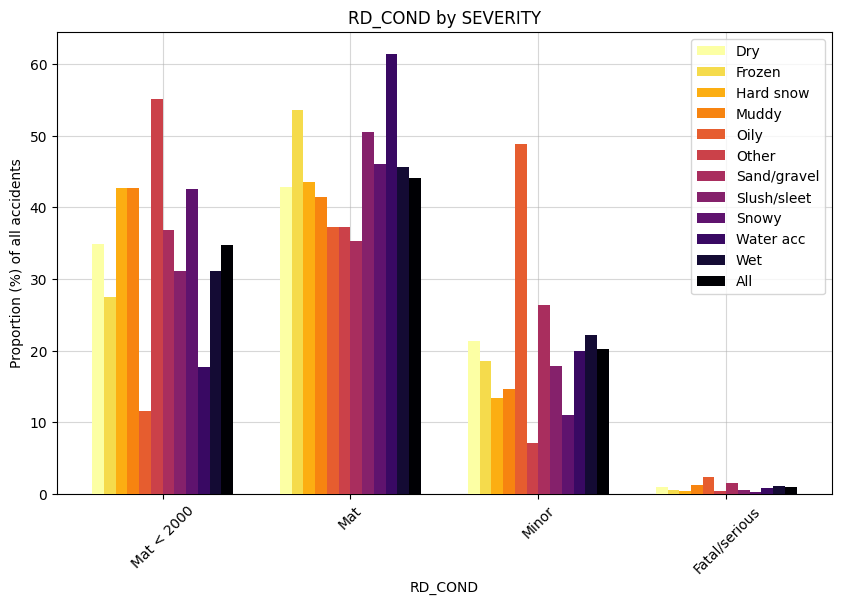

SEVERITY BY LIGHT: Prob(SEVERITY | LIGHT = column heading)


LIGHT                 Clear day        Dawn/dusk         Lit path  \
Mat < 2000       64996 (↓36.5%)   5086 (↓36.84%)  21521 (↓29.86%)   
Mat             74728 (↓41.97%)   5921 (↓42.89%)  35651 (↓49.46%)   
Minor            37041 (↓20.8%)   2667 (↓19.32%)  13965 (↓19.37%)   
Fatal/serious     1282 (↓0.72%)     132 (↓0.96%)     941 (↓1.31%)   
All            178047 (↓100.0%)  13806 (↓100.0%)  72078 (↓100.0%)   

LIGHT              Unlit path               All  
Mat < 2000      654 (↓42.25%)   92257 (↓34.75%)  
Mat             619 (↓39.99%)  116919 (↓44.04%)  
Minor           239 (↓15.44%)   53912 (↓20.31%)  
Fatal/serious     36 (↓2.33%)      2391 (↓0.9%)  
All            1548 (↓100.0%)  265479 (↓100.0%)

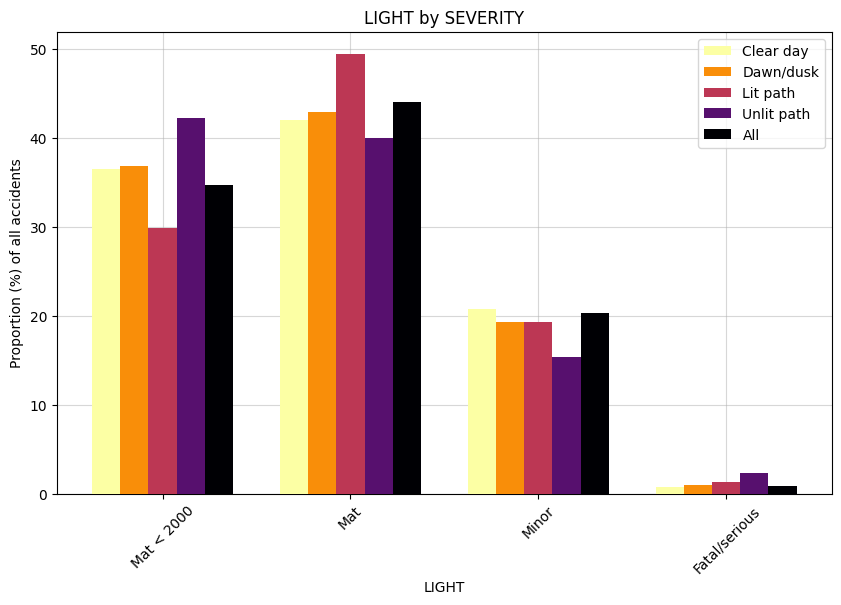

SEVERITY BY ZONE: Prob(SEVERITY | ZONE = column heading)


ZONE          Business/commercial        Forest       Industrial  \
Mat < 2000        49957 (↓35.06%)  19 (↓21.84%)   4263 (↓23.69%)   
Mat               63516 (↓44.58%)  48 (↓55.17%)   10130 (↓56.3%)   
Minor             27793 (↓19.51%)  17 (↓19.54%)   3425 (↓19.04%)   
Fatal/serious       1217 (↓0.85%)    3 (↓3.45%)     175 (↓0.97%)   
All              142483 (↓100.0%)  87 (↓100.0%)  17993 (↓100.0%)   

ZONE                    Other      Residential           Rural  \
Mat < 2000     1805 (↓43.92%)  37609 (↓38.94%)  1572 (↓25.13%)   
Mat            1482 (↓36.06%)  38510 (↓39.87%)  3654 (↓58.42%)   
Minor           758 (↓18.44%)  19634 (↓20.33%)   981 (↓15.68%)   
Fatal/serious     65 (↓1.58%)     834 (↓0.86%)     48 (↓0.77%)   
All            4110 (↓100.0%)  96587 (↓100.0%)  6255 (↓100.0%)   

ZONE                   School               All  
Mat < 2000     1932 (↓40.64%)   97157 (↓35.68%)  
Mat            1637 (↓34.43%)   118977 (↓43.7%)  
Minor           1141 (↓24.0%)   53749 (↓19.74%)  
Fatal/serious     44 (↓0.93%)     2386 (↓0.88%)  
All            4754 (↓100.0%)  272269 (↓100.0%)

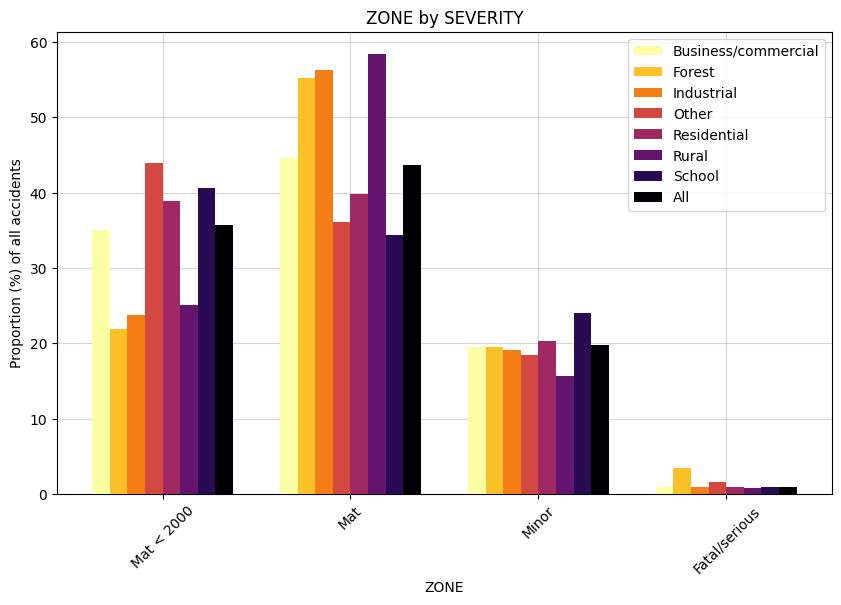

SEVERITY BY PUB_PRIV_RD: Prob(SEVERITY | PUB_PRIV_RD = column heading)


PUB_PRIV_RD            Private            Public               All
Mat < 2000     20851 (↓63.09%)   76587 (↓31.96%)   97438 (↓35.73%)
Mat            10196 (↓30.85%)  108898 (↓45.44%)  119094 (↓43.67%)
Minor            1882 (↓5.69%)   51897 (↓21.66%)   53779 (↓19.72%)
Fatal/serious     123 (↓0.37%)     2267 (↓0.95%)     2390 (↓0.88%)
All            33052 (↓100.0%)  239649 (↓100.0%)  272701 (↓100.0%)

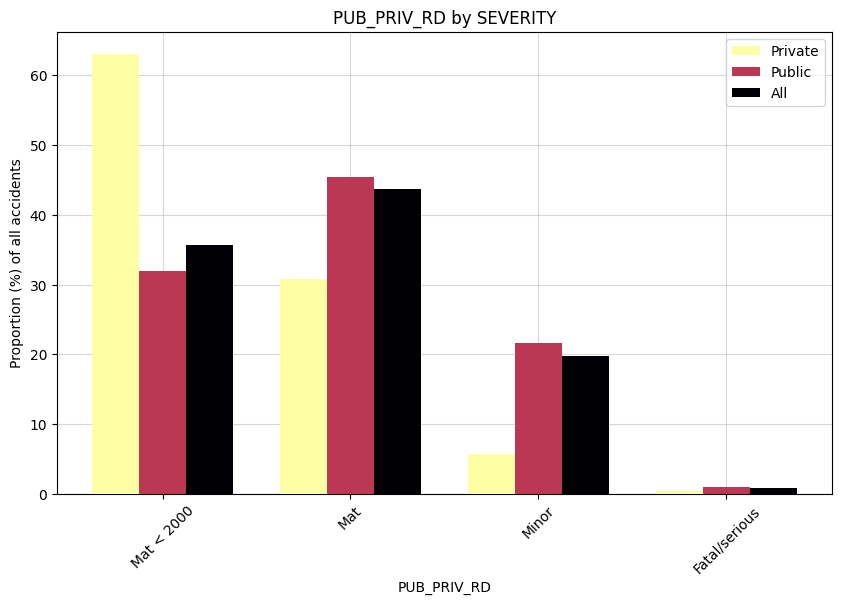

SEVERITY BY ASPECT: Prob(SEVERITY | ASPECT = column heading)


ASPECT                   Curve          Straight               All
Mat < 2000      2417 (↓20.89%)    91862 (↓35.7%)   94279 (↓35.06%)
Mat             6874 (↓59.41%)  111472 (↓43.32%)  118346 (↓44.01%)
Minor           2132 (↓18.43%)   51751 (↓20.11%)   53883 (↓20.04%)
Fatal/serious     147 (↓1.27%)     2242 (↓0.87%)     2389 (↓0.89%)
All            11570 (↓100.0%)  257327 (↓100.0%)  268897 (↓100.0%)

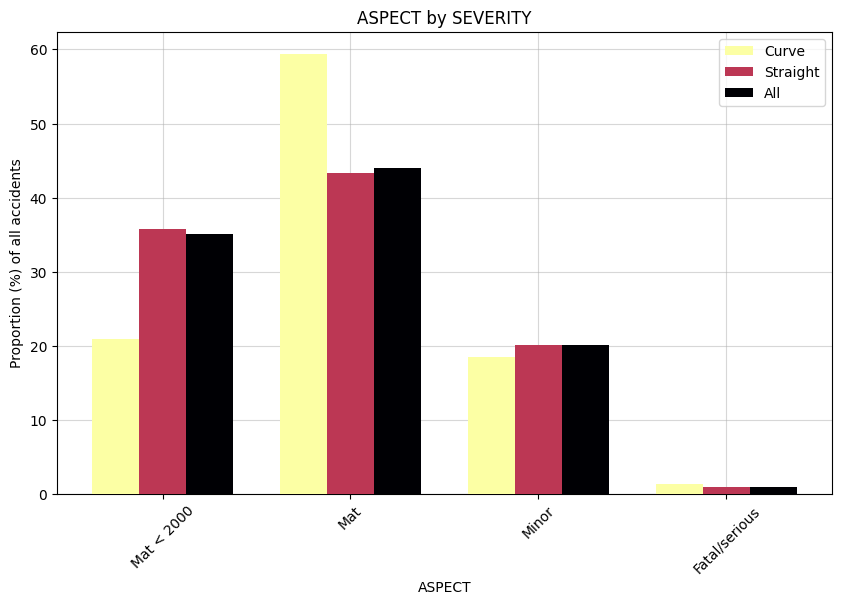

SEVERITY BY LONG_LOC: Prob(SEVERITY | LONG_LOC = column heading)


LONG_LOC          Bridge etc.      Btwn int'ns Int'n/roundabout  \
Mat < 2000      1557 (↓19.6%)  22310 (↓32.14%)  23491 (↓25.99%)   
Mat             4845 (↓61.0%)  37146 (↓53.51%)  35455 (↓39.22%)   
Minor          1478 (↓18.61%)   9528 (↓13.73%)  30163 (↓33.37%)   
Fatal/serious     62 (↓0.78%)     435 (↓0.63%)    1288 (↓1.42%)   
All            7942 (↓100.0%)  69419 (↓100.0%)  90397 (↓100.0%)   

LONG_LOC      Near int'n/roundabout            Other      Shop centre  \
Mat < 2000          21746 (↓42.65%)  11796 (↓43.87%)   8373 (↓63.88%)   
Mat                 20829 (↓40.85%)  12104 (↓45.01%)   3834 (↓29.25%)   
Minor                 8057 (↓15.8%)   2833 (↓10.54%)     856 (↓6.53%)   
Fatal/serious           355 (↓0.7%)     157 (↓0.58%)      45 (↓0.34%)   
All                 50987 (↓100.0%)  26890 (↓100.0%)  13108 (↓100.0%)   

LONG_LOC                    All  
Mat < 2000       89273 (↓34.5%)  
Mat            114213 (↓44.14%)  
Minor           52915 (↓20.45%)  
Fatal/serious     2342 (↓0.91%)  
All            258743 (↓100.0%)

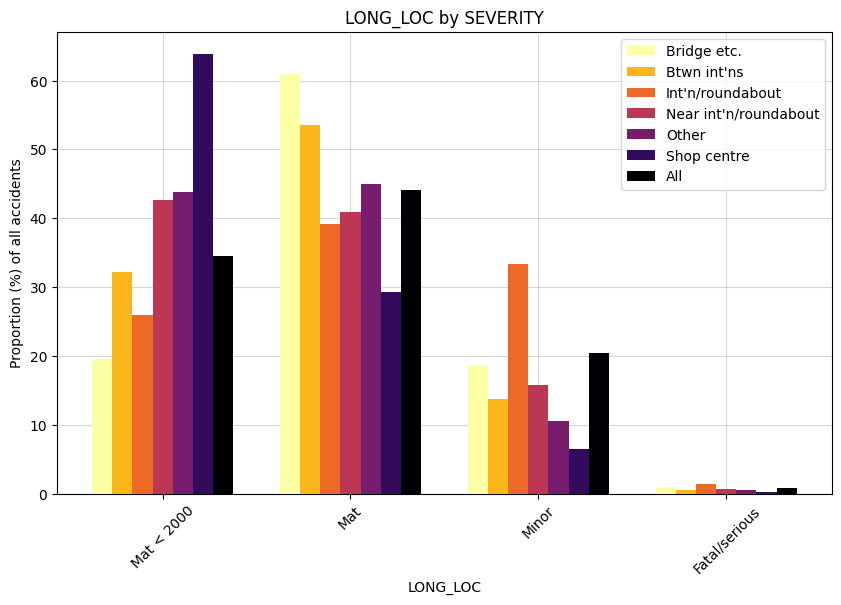

SEVERITY BY RD_CONFG: Prob(SEVERITY | RD_CONFG = column heading)


RD_CONFG               One-way            Other    Sep by layout  \
Mat < 2000     28165 (↓36.51%)   8045 (↓57.95%)   9168 (↓21.55%)   
Mat            36783 (↓47.68%)   4727 (↓34.05%)  24405 (↓57.36%)   
Minor          11714 (↓15.18%)    1038 (↓7.48%)   8587 (↓20.18%)   
Fatal/serious     484 (↓0.63%)      73 (↓0.53%)      385 (↓0.9%)   
All            77146 (↓100.0%)  13883 (↓100.0%)  42545 (↓100.0%)   

RD_CONFG                Two-way               All  
Mat < 2000      40246 (↓33.06%)   85624 (↓33.54%)  
Mat             48405 (↓39.76%)  114320 (↓44.78%)  
Minor           31675 (↓26.02%)   53014 (↓20.77%)  
Fatal/serious     1402 (↓1.15%)     2344 (↓0.92%)  
All            121728 (↓100.0%)  255302 (↓100.0%)

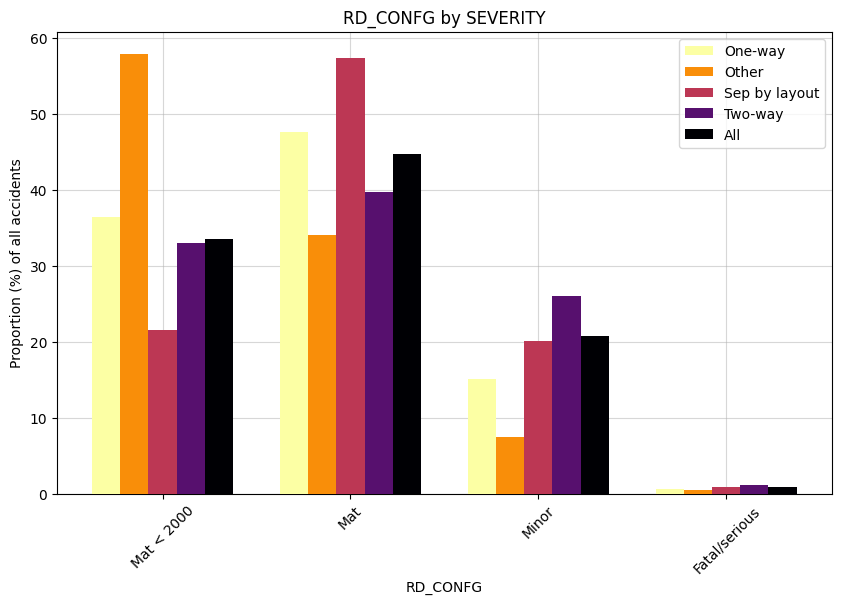

SEVERITY BY RDWX: Prob(SEVERITY | RDWX = column heading)


RDWX                        Y             All
Mat < 2000     2584 (↓26.23%)  2584 (↓26.23%)
Mat            5251 (↓53.29%)  5251 (↓53.29%)
Minor          1932 (↓19.61%)  1932 (↓19.61%)
Fatal/serious     86 (↓0.87%)     86 (↓0.87%)
All            9853 (↓100.0%)  9853 (↓100.0%)

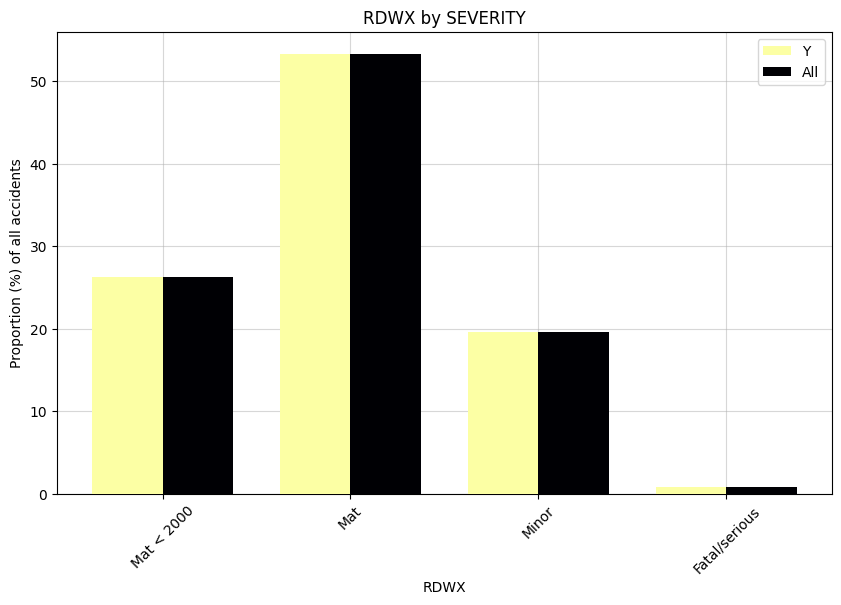

SEVERITY BY WEATHER: Prob(SEVERITY | WEATHER = column heading)


WEATHER            Black ice Blowing snow/snowstorm             Clear  \
Mat < 2000     272 (↓29.34%)          706 (↓29.71%)   64268 (↓35.89%)   
Mat            515 (↓55.56%)          1321 (↓55.6%)    75753 (↓42.3%)   
Minor          139 (↓14.99%)          334 (↓14.06%)   37378 (↓20.87%)   
Fatal/serious     1 (↓0.11%)            15 (↓0.63%)     1666 (↓0.93%)   
All            927 (↓100.0%)         2376 (↓100.0%)  179065 (↓100.0%)   

WEATHER              Downpour       Fog/haze           Other         Overcast  \
Mat < 2000      407 (↓23.46%)  136 (↓31.85%)   826 (↓60.65%)  14059 (↓32.27%)   
Mat             793 (↓45.71%)  207 (↓48.48%)    459 (↓33.7%)  20919 (↓48.01%)   
Minor           508 (↓29.28%)   84 (↓19.67%)     73 (↓5.36%)   8221 (↓18.87%)   
Fatal/serious     27 (↓1.56%)      0 (↓0.0%)      4 (↓0.29%)     374 (↓0.86%)   
All            1735 (↓100.0%)  427 (↓100.0%)  1362 (↓100.0%)  43573 (↓100.0%)   

WEATHER           Rain/drizzle        Snow/hail    Strong wind  \
Mat < 2000      5820 (↓29.22%)   5152 (↓34.26%)  200 (↓38.31%)   
Mat             9074 (↓45.55%)   7682 (↓51.08%)  221 (↓42.34%)   
Minor           4798 (↓24.09%)   2146 (↓14.27%)   92 (↓17.62%)   
Fatal/serious     228 (↓1.14%)       60 (↓0.4%)     9 (↓1.72%)   
All            19920 (↓100.0%)  15040 (↓100.0%)  522 (↓100.0%)   

WEATHER                     All  
Mat < 2000      91846 (↓34.67%)  
Mat            116944 (↓44.14%)  
Minor            53773 (↓20.3%)  
Fatal/serious      2384 (↓0.9%)  
All            264947 (↓100.0%)

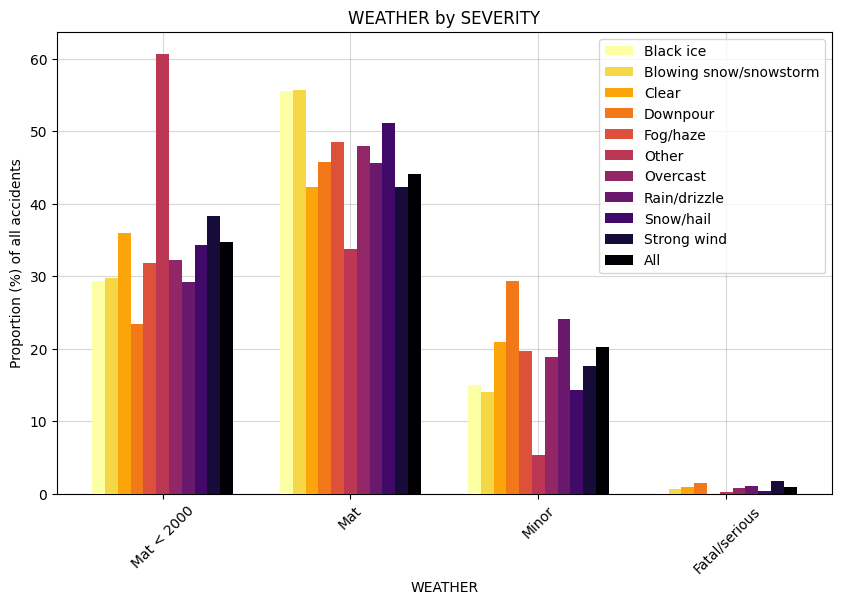

SEVERITY BY LT_TRK: Prob(SEVERITY | LT_TRK = column heading)


LT_TRK                       N                 Y               All
Mat < 2000       7851 (↓41.8%)   93988 (↓35.86%)  101839 (↓36.26%)
Mat             5878 (↓31.29%)  116412 (↓44.42%)  122290 (↓43.54%)
Minor            4639 (↓24.7%)   49692 (↓18.96%)   54331 (↓19.34%)
Fatal/serious     415 (↓2.21%)     2004 (↓0.76%)     2419 (↓0.86%)
All            18783 (↓100.0%)  262096 (↓100.0%)  280879 (↓100.0%)

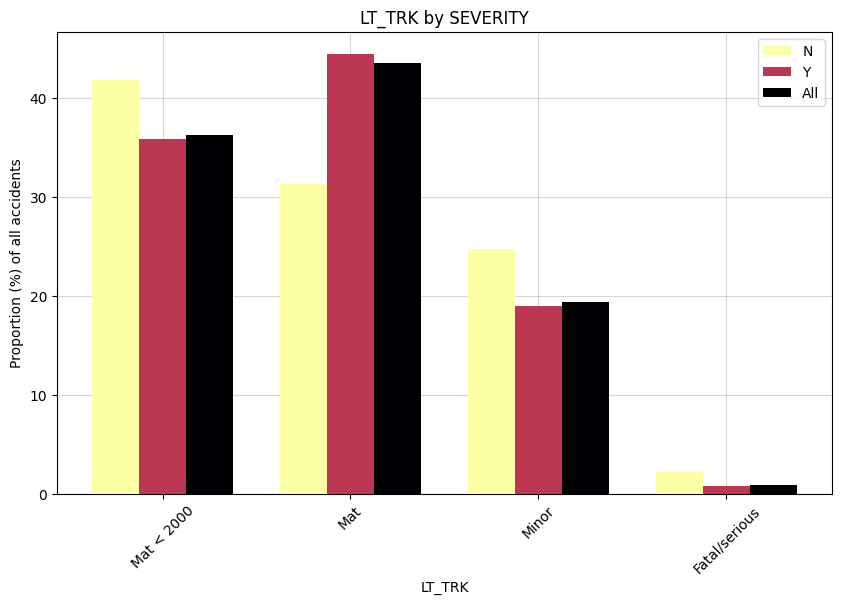

SEVERITY BY HVY_VEH: Prob(SEVERITY | HVY_VEH = column heading)


HVY_VEH                       N                Y               All
Mat < 2000       87573 (↓36.9%)  14266 (↓32.78%)  101839 (↓36.26%)
Mat             98992 (↓41.71%)  23298 (↓53.53%)  122290 (↓43.54%)
Minor           48752 (↓20.54%)   5579 (↓12.82%)   54331 (↓19.34%)
Fatal/serious     2039 (↓0.86%)     380 (↓0.87%)     2419 (↓0.86%)
All            237356 (↓100.0%)  43523 (↓100.0%)  280879 (↓100.0%)

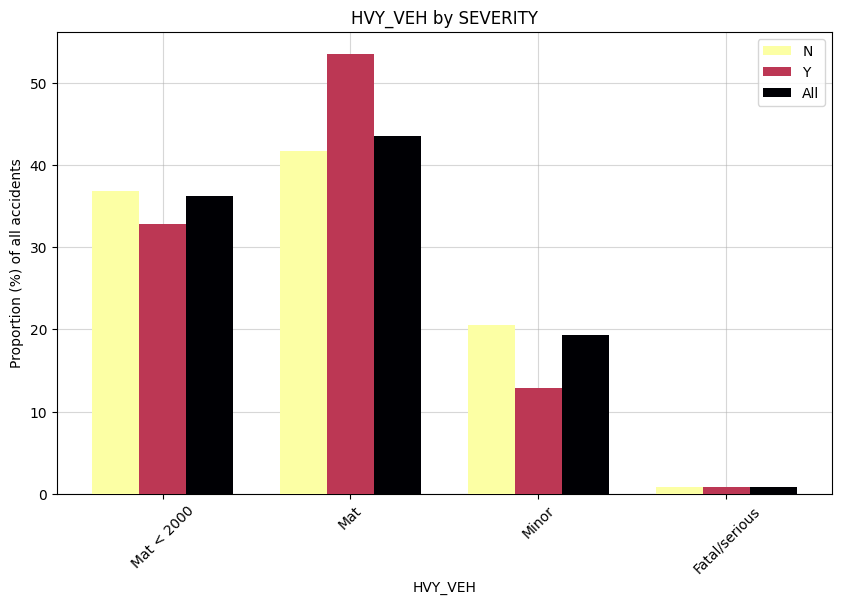

SEVERITY BY MTRCYC: Prob(SEVERITY | MTRCYC = column heading)


MTRCYC                        N               Y               All
Mat < 2000     100528 (↓36.44%)  1311 (↓26.25%)  101839 (↓36.26%)
Mat            121555 (↓44.06%)   735 (↓14.71%)  122290 (↓43.54%)
Minor           51626 (↓18.71%)  2705 (↓54.15%)   54331 (↓19.34%)
Fatal/serious     2175 (↓0.79%)    244 (↓4.88%)     2419 (↓0.86%)
All            275884 (↓100.0%)  4995 (↓100.0%)  280879 (↓100.0%)

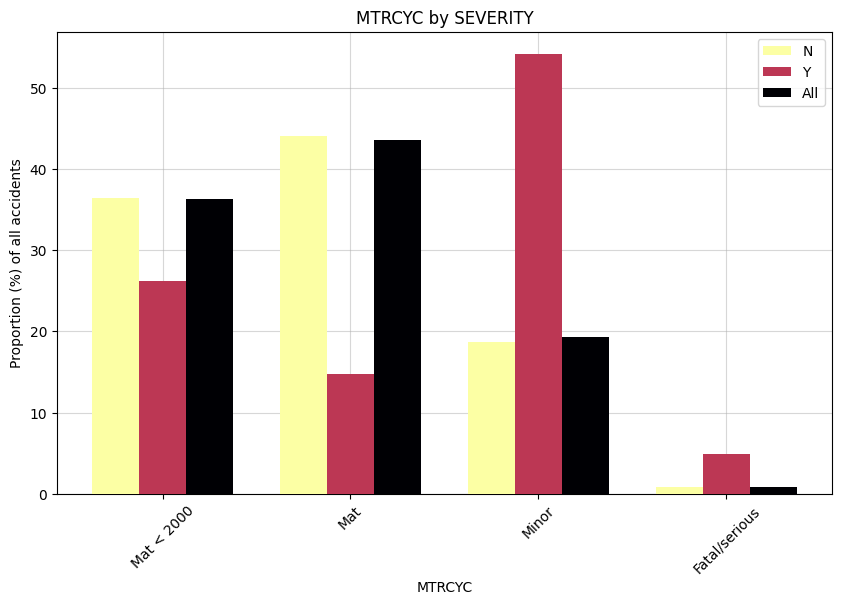

SEVERITY BY BICYC: Prob(SEVERITY | BICYC = column heading)


BICYC                         N               Y               All
Mat < 2000      99999 (↓36.75%)  1840 (↓21.06%)  101839 (↓36.26%)
Mat            122037 (↓44.84%)     253 (↓2.9%)  122290 (↓43.54%)
Minor           47995 (↓17.64%)  6336 (↓72.52%)   54331 (↓19.34%)
Fatal/serious     2111 (↓0.78%)    308 (↓3.53%)     2419 (↓0.86%)
All            272142 (↓100.0%)  8737 (↓100.0%)  280879 (↓100.0%)

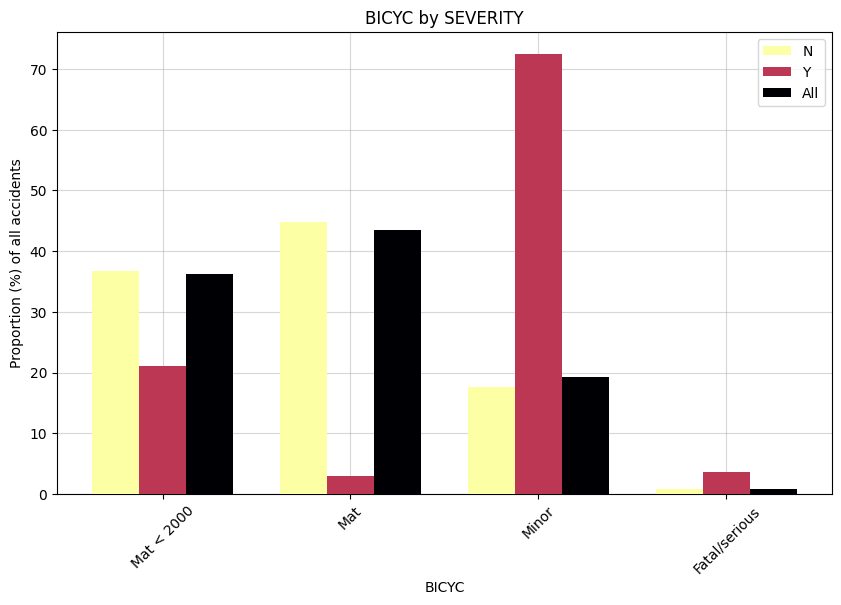

SEVERITY BY PED: Prob(SEVERITY | PED = column heading)


PED                           N                Y               All
Mat < 2000     101839 (↓37.75%)        0 (↓0.0%)  101839 (↓36.26%)
Mat            122290 (↓45.33%)        0 (↓0.0%)  122290 (↓43.54%)
Minor           44263 (↓16.41%)  10068 (↓90.55%)   54331 (↓19.34%)
Fatal/serious     1368 (↓0.51%)    1051 (↓9.45%)     2419 (↓0.86%)
All            269760 (↓100.0%)  11119 (↓100.0%)  280879 (↓100.0%)

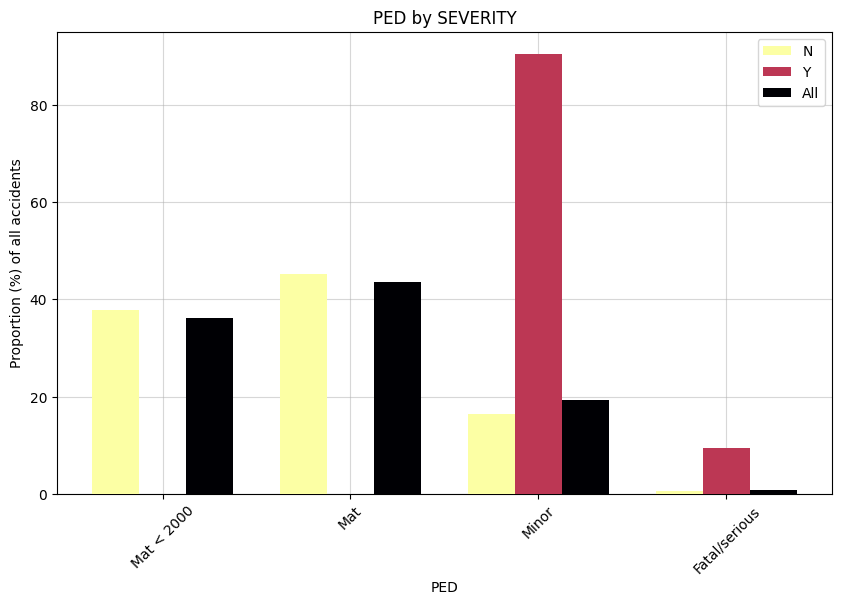

In [30]:
from saaq_data_dictionary import shorthand
from exploration import custom_crosstab, crosstab_plot

instance = mtl_sev
df = instance.df_train.copy()

for col in df.columns:
    try:
        df[col] = df[col].map(shorthand[col])
    except:
        pass

columns = [c for c in df.columns if c not in instance.targets]
columns.remove("ID")

for A in instance.targets:
    for B in columns:
        print(f"{A} by {B}:".upper(), f"Prob({A} | {B} = column heading)")
        _, AxB1, AxB2, _, _ = custom_crosstab(df[A], df[B])  
        try:
            order = list(shorthand[A].values())
            AxB1 = AxB1.loc[order]
            order = order + ['All']
            AxB2 = AxB2.loc[order]
        except:
            pass
        display(AxB2)
        filename = "_".join([get_variable_name(instance), "EDA", "bar", f"{A}", "by", f"{B}"]) + ".png"                
        filepath = path["expository"].joinpath(filename)
        crosstab_plot(AxB1,ylabel=f"Proportion (%) of all accidents",save_as=filepath)

In [31]:
plt.close('all')

ACCDN_TYPE                cyc          fxd obj         no coll  \
Mat < 2000     1643 (↓20.64%)   6414 (↓25.06%)  1198 (↓21.09%)   
Mat              204 (↓2.56%)  14883 (↓58.16%)  2147 (↓37.79%)   
Minor          5835 (↓73.29%)   4015 (↓15.69%)  2225 (↓39.17%)   
Fatal/serious     279 (↓3.5%)     278 (↓1.09%)    111 (↓1.95%)   
All            7961 (↓100.0%)  25590 (↓100.0%)  5681 (↓100.0%)   

ACCDN_TYPE                oth              ped               veh  \
Mat < 2000     1933 (↓48.24%)   1705 (↓13.85%)    82294 (↓38.5%)   
Mat            1845 (↓46.04%)      48 (↓0.39%)   98606 (↓46.13%)   
Minor            214 (↓5.34%)   9572 (↓77.74%)   32124 (↓15.03%)   
Fatal/serious     15 (↓0.37%)     988 (↓8.02%)      736 (↓0.34%)   
All            4007 (↓100.0%)  12313 (↓100.0%)  213760 (↓100.0%)   

ACCDN_TYPE                  All  
Mat < 2000      95187 (↓35.34%)  
Mat            117733 (↓43.72%)  
Minor           53985 (↓20.05%)  
Fatal/serious     2407 (↓0.89%)  
All            269312 (↓100.0%)

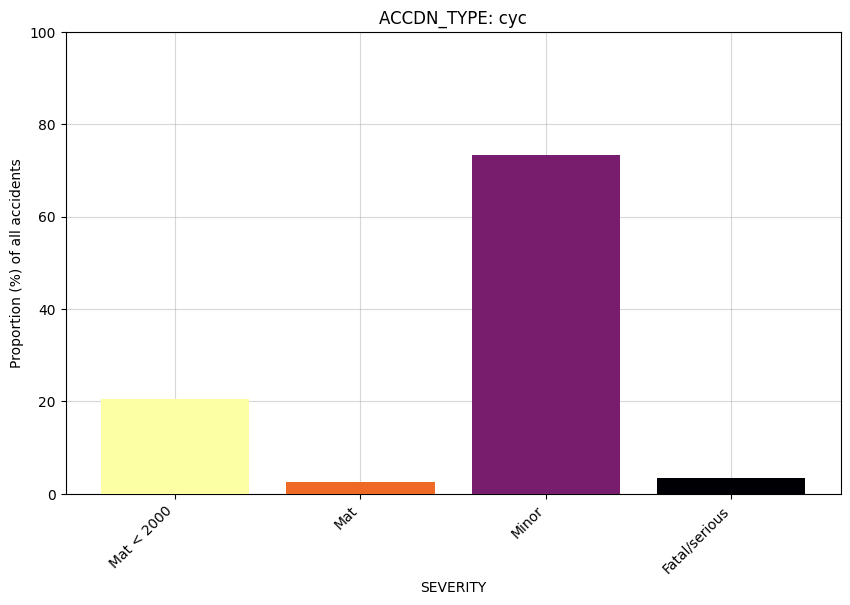

In [32]:
from saaq_data_dictionary import shorthand
from exploration import custom_crosstab, crosstab_animation
from IPython.display import HTML

instance = mtl_sev
df = instance.df_train.copy()

A = "SEVERITY"
BB = ["MONTH", "ACCDN_TYPE", "WEATHER", "RD_CONFG", "RD_COND", "LONG_LOC", "ASPECT", "SPD_LIM"]
B = BB[1]

try:
    df[A] = df[A].map(shorthand[A])
except:
    pass

try:
    df[B] = df[B].map(shorthand[B])
except:
    pass

filename = filename = "_".join([get_variable_name(instance), "EDA", "crosstab", f"{A}", "by", f"{B}"]) + ".txt"
filepath = path["expository"].joinpath(filename)
AxB = custom_crosstab(df[A], df[B], save_as=None)[1]
AxB2 = custom_crosstab(df[A], df[B])[2]

try:
    order = list(shorthand[A].values())
    AxB = AxB.loc[order]
    order2 = order + ['All']
    AxB2 = AxB2.loc[order2]
except:
    pass

display(AxB2)

filename = filename = "_".join([get_variable_name(instance), "EDA", "bar", "anim", f"{A}", "by", f"{B}"]) + ".gif"
filepath = path["expository"].joinpath(filename)
anim = crosstab_animation(AxB, "Proportion (%) of all accidents", save_as=filepath)
HTML(anim.to_jshtml())

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_ACCDN_TYPE.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_MONTH.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_RD_CONFG.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_RD_COND.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_LONG_LOC.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_ASPECT.gif)

![Alt Text](../expository/mtl_sev_EDA_bar_anim_SEVERITY_by_SPD_LIM.gif)